# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg
import glob

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [4]:
# Existing matplotlib version 3.9.2 so updating
#!pip install matplotlib==3.10.0

#### Creating Function to Export the Report Document (.pdf ) that presents your visualizations, analysis, results, insights, and outcomes

In [5]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create a global PdfPages object
pdf_filename = "EDA_NYC_Taxi_Trip_Analysis_Plots.pdf"
pdf_pages = PdfPages(pdf_filename)

def save_plot_to_pdf():
    global pdf_pages
    pdf_pages.savefig()  # Save the current figure to the PDF
    print("Plot saved to PDF!")
    
# Call pdf_pages.close() when all plots are added to save the file properly
def finalize_pdf():
    global pdf_pages
    pdf_pages.close()
    print(f" PDF file '{pdf_filename}' has been created successfully!")


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [7]:
# Number of rows and columns
df.shape

(3041714, 19)

### rows 3041714 , columns 19

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [8]:
# File paths for all 12 months
import glob
file_paths = sorted(glob.glob("2023-*.parquet")) 
file_paths

['2023-1.parquet',
 '2023-10.parquet',
 '2023-11.parquet',
 '2023-12.parquet',
 '2023-2.parquet',
 '2023-3.parquet',
 '2023-4.parquet',
 '2023-5.parquet',
 '2023-6.parquet',
 '2023-7.parquet',
 '2023-8.parquet',
 '2023-9.parquet']

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [9]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
'''
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        '''

'\nimport os\n\n# Select the folder having data files\nos.chdir(\'/content/Assignments/EDA/data_NYC_Taxi/trip_records\')\n\n# Create a list of all the twelve files to read\nfile_list = os.listdir()\n\n# initialise an empty dataframe\ndf = pd.DataFrame()\n\n\n# iterate through the list of files and sample one by one:\nfor file_name in file_list:\n    try:\n        # file path for the current file\n        file_path = os.path.join(os.getcwd(), file_name)\n\n        # Reading the current file\n\n\n\n        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this\n        # After completing iteration through each date, we will append this data to the final dataframe.\n        sampled_data = pd.DataFrame()\n\n        # Loop through dates and then loop through every hour of each date\n\n            # Iterate through each hour of the selected date\n\n                # Sample 5% of the hourly data randomly\n\n                # add d

#### taking files from local

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [12]:
import pandas as pd
import glob

def process_and_sample_data(sample_fraction):

    def sample_data_from_Local(file_path, sample_fraction):
        df = pd.read_parquet(file_path)

        # Convert datetime column to datetime type
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        
        # Extract date and hour and feature engineering 
        #df['date'] = df['tpep_pickup_datetime'].dt.date                           # this will create object type 
        df["date"] = df["tpep_pickup_datetime"].dt.normalize()                     # Keeps datetime format
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # Sampling process: user-defined percentage of trips per hour per day
        sampled_df = df.groupby(['date', 'hour']).apply(
            lambda x: x.sample(frac=sample_fraction, random_state=42)
        ).reset_index(drop=True)

        return sampled_df

    # File paths for all 12 months
    file_paths = sorted(glob.glob("2023-*.parquet"))  

    # Process all files and store results
    sampled_data_list = []
    for file in file_paths:
        print(f"Processing file: {file}")  # Print file name
        sampled_df = sample_data_from_Local(file, sample_fraction)
        sampled_data_list.append(sampled_df)

    # Combine all sampled data
    final_sampled_df = pd.concat(sampled_data_list, ignore_index=True)

    # Save the sampled data with the fraction in the filename
    output_filename = f"sampled_data_{int(sample_fraction * 100)}.parquet"
    final_sampled_df.to_parquet(output_filename, index=False)

    print(f"Sampled data saved as {output_filename}")

# Example usage
process_and_sample_data(0.05)  # Call with the desired sample fraction


Processing file: 2023-1.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet
Sampled data saved as sampled_data_5.parquet


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file
df_s = pd.read_parquet("sampled_data_5.parquet")

In [14]:
df_s.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.00           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.58           0.0   
3             2  ...      0.5        0.00           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   

        date  hour Airport_fee  
0 2022-12-31    23         NaN  
1 2023-01-01     0         NaN  
2 2023-01-01     0         NaN  
3 2023-01-01     0         NaN  
4 2023-01-01     0         NaN  

[5 rows x 22 columns]

In [15]:
# check column types
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [16]:
# check sample file shape
df_s.shape

(1896400, 22)

In [17]:
df_s["payment_type"].value_counts()

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [18]:
# Check missing/Nan values
df_s.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64874
trip_distance                  0
RatecodeID                 64874
store_and_fwd_flag         64874
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       64874
airport_fee              1747917
date                           0
hour                           0
Airport_fee               213357
dtype: int64

In [19]:
# number of columns having missing values (Cross checking)
df_s.isnull().any().sum()

6

#### Checking missing value percentage for those columns where value are missing in df_s

In [20]:
def missing_values_summary(df):
    missing_count = df.isnull().sum()                  # Number of missing values
    missing_percent = (missing_count / len(df)) * 100  # Percentage of missing values

    # Combine into a DataFrame
    missing_summary = pd.DataFrame({
        'Missing Rows': missing_count,
        'Missing Percentage': missing_percent
    })

    # Filter only columns with missing values
    missing_summary = missing_summary[missing_summary['Missing Rows'] > 0]
    
    if missing_summary.empty:
        print(" No missing values in the DataFrame.")
    else:
        print(" Missing Values Summary:")
        print(missing_summary.sort_values(by="Missing Percentage", ascending=False))  # Sort in descending order
    
    return missing_summary


missing_summary = missing_values_summary(df_s)


 Missing Values Summary:
                      Missing Rows  Missing Percentage
airport_fee                1747917           92.170270
Airport_fee                 213357           11.250633
passenger_count              64874            3.420903
RatecodeID                   64874            3.420903
store_and_fwd_flag           64874            3.420903
congestion_surcharge         64874            3.420903


**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [21]:
# Fix the index and drop any columns that are not needed
# Reset index
df_s.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [22]:
# Combine the two airport fee columns
'''
# Checking whether two coluns having same value or not
same_value_count = (df_s['airport_fee'] == df_s['Airport_fee']).sum()
print(f"Number of rows where values are the same: {same_value_count}")

count1 = df_s[df_s['Airport_fee'].isnull() & df_s['airport_fee'].notnull()].shape[0]
print(f"Rows where 'Airport_fee' is missing but 'airport_fee' has a value: {count1}")

count2 = df_s[df_s['airport_fee'].notnull() & df_s['Airport_fee'].notnull()].shape[0]
print(f"Rows where both 'airport_fee' and 'Airport_fee' have values: {count2}")
'''

'\n# Checking whether two coluns having same value or not\nsame_value_count = (df_s[\'airport_fee\'] == df_s[\'Airport_fee\']).sum()\nprint(f"Number of rows where values are the same: {same_value_count}")\n\ncount1 = df_s[df_s[\'Airport_fee\'].isnull() & df_s[\'airport_fee\'].notnull()].shape[0]\nprint(f"Rows where \'Airport_fee\' is missing but \'airport_fee\' has a value: {count1}")\n\ncount2 = df_s[df_s[\'airport_fee\'].notnull() & df_s[\'Airport_fee\'].notnull()].shape[0]\nprint(f"Rows where both \'airport_fee\' and \'Airport_fee\' have values: {count2}")\n'

#### So as there are 1747917 rows missing in airport_fee and 213357 rows in Airport_fee, so we can combine

In [23]:
# filling the missing value from airport_fee
df_s['Airport_fee'].fillna(df_s['airport_fee'], inplace=True)

In [24]:
# check again missing summary
missing_summary = missing_values_summary(df_s)

 Missing Values Summary:
                      Missing Rows  Missing Percentage
airport_fee                1747917           92.170270
passenger_count              64874            3.420903
RatecodeID                   64874            3.420903
store_and_fwd_flag           64874            3.420903
congestion_surcharge         64874            3.420903
Airport_fee                  64874            3.420903


#### For Airport_fee missing value percentage reduced from 11.25% to 3.42%

In [25]:
# dropping column 'airport_fee'
df_s.drop(columns=['airport_fee'], inplace=True)

In [26]:
# Check missing/Nan values
df_s.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64874
trip_distance                0
RatecodeID               64874
store_and_fwd_flag       64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
date                         0
hour                         0
Airport_fee              64874
dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [27]:
#df_s["payment_type"].value_counts()

In [28]:
### # check where values of fare amount are negative

In [29]:
# check where values of fare amount are negative

# Filter trips with negative monetary value columns

negative_fare_df = df_s[(df_s['fare_amount'] < 0) | (df_s['tolls_amount'] < 0) | (df_s['improvement_surcharge'] < 0) | (df_s['total_amount'] < 0) | (df_s['congestion_surcharge'] < 0) | (df_s['mta_tax'] < 0) | (df_s['mta_tax'] < 0)]
#negative_fare_df = df_s[(df_s['fare_amount'] < 0)]

ratecode_distribution = negative_fare_df['RatecodeID'].value_counts()
print("RateCodeID distribution for negative fare or total amounts:\n", ratecode_distribution)

RateCodeID distribution for negative fare or total amounts:
 RatecodeID
1.0    49
2.0    24
5.0     3
3.0     1
4.0     1
Name: count, dtype: int64


#### Detailed RateCodeID distribution for negative fare amounts 

In [30]:
import pandas as pd

def analyze_negative_fare_counts(df, negative_columns):

    # Filter rows where ANY of the defined columns contain negative values
    negative_fare_df = df[(df[negative_columns] < 0).any(axis=1)]

    # Initialize an empty dictionary to store negative value counts per RatecodeID
    ratecode_summary = {}

    # Loop through each unique RatecodeID
    for ratecode in negative_fare_df['RatecodeID'].unique():
        ratecode_data = negative_fare_df[negative_fare_df['RatecodeID'] == ratecode]
        
        # Count how many negative values exist for each column
        ratecode_summary[ratecode] = [len(ratecode_data)]
        for col in negative_columns:
            ratecode_summary[ratecode].append((ratecode_data[col] < 0).sum())
    
    # Convert dictionary to DataFrame
    columns = ["Count"] + [f" {col} <0 " for col in negative_columns]
    summary_df = pd.DataFrame.from_dict(ratecode_summary, orient='index', columns=columns)
    
    # Sort by highest count of negative fare records
    summary_df.index.name = "RatecodeID"
    summary_df = summary_df.sort_values(by="Count", ascending=False)

    return summary_df

# Define columns to check for negative values
negative_columns = ['fare_amount', 'tolls_amount', 'improvement_surcharge', 
                    'total_amount', 'congestion_surcharge', 'mta_tax']

# Call the function and store results
negative_fare_summary = analyze_negative_fare_counts(df_s, negative_columns)

# Display the results
print("\n Negative Fare Summary Per RatecodeID:")
negative_fare_summary




 Negative Fare Summary Per RatecodeID:


Count   fare_amount <0    tolls_amount <0   \
RatecodeID                                               
1.0            49                 0                  0   
2.0            24                 0                  0   
5.0             3                 0                  0   
3.0             1                 0                  0   
4.0             1                 0                  0   

             improvement_surcharge <0    total_amount <0   \
RatecodeID                                                  
1.0                                 49                 49   
2.0                                 24                 24   
5.0                                  3                  3   
3.0                                  1                  1   
4.0                                  1                  1   

             congestion_surcharge <0    mta_tax <0   
RatecodeID                                           
1.0                                34            49  
2.0                                19            24  
5.0                                 3             0  
3.0                                 0             0  
4.0                                 0             0

Did you notice something different in the `RatecodeID` column for above records?

#### Conclusion from above : Wherever the negative amount arises the maximum RatecodeID is 1 = Standard rate  or 2 = JFK

#### # Find which columns have negative values

In [31]:
# Find which columns have negative values

# Mandatory columns
mandatory_columns = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
    'improvement_surcharge', 'tip_amount', 'tolls_amount', 'total_amount', 
    'congestion_surcharge', 'Airport_fee','RatecodeID' 
]

# Find rows where any mandatory column has a negative value
negative_values_df = df_s[(df_s[mandatory_columns] < 0).any(axis=1)]

# Count of negative values in each column
negative_counts = (df_s[mandatory_columns] < 0).sum()
print("Negative value counts per column:\n", negative_counts)


# Display some rows  with negative values
negative_values_df


Negative value counts per column:
 passenger_count           0
trip_distance             0
fare_amount               0
extra                     3
mta_tax                  73
improvement_surcharge    78
tip_amount                0
tolls_amount              0
total_amount             78
congestion_surcharge     56
Airport_fee              15
RatecodeID                0
dtype: int64


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3966            2  2023-01-02 05:12:19   2023-01-02 05:41:45              1.0   
9093            2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
77200           2  2023-01-17 12:37:35   2023-01-17 13:24:00              1.0   
77920           2  2023-01-17 15:03:44   2023-01-17 15:36:28              1.0   
86509           2  2023-01-19 09:50:26   2023-01-19 09:58:13              1.0   
...           ...                  ...                   ...              ...   
1734702         2  2023-07-27 17:56:27   2023-07-27 18:00:12              1.0   
1742776         2  2023-07-29 03:47:56   2023-07-29 03:48:34              4.0   
1762681         2  2023-09-02 18:29:48   2023-09-02 18:30:13              3.0   
1774112         2  2023-09-05 15:32:01   2023-09-05 15:43:35              1.0   
1893750         2  2023-09-30 16:35:07   2023-09-30 16:35:13              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3966             17.07         3.0                  N           142   
9093              0.00         2.0                  N           132   
77200            17.68         2.0                  N           230   
77920             4.12         1.0                  N           239   
86509             0.50         1.0                  N           161   
...                ...         ...                ...           ...   
1734702           0.66         1.0                  N           113   
1742776           0.00         5.0                  N            79   
1762681           0.00         2.0                  N            74   
1774112           0.01         1.0                  N           161   
1893750           0.00         5.0                  N           141   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
3966                1             2  ...    0.0      0.0         0.0   
9093              132             2  ...    0.0     -0.5         0.0   
77200             132             2  ...    0.0     -0.5         0.0   
77920             168             2  ...    0.0     -0.5         0.0   
86509              43             2  ...    0.0     -0.5         0.0   
...               ...           ...  ...    ...      ...         ...   
1734702           234             2  ...    0.0     -0.5         0.0   
1742776            79             4  ...    0.0      0.0         0.0   
1762681            74             2  ...    0.0     -0.5         0.0   
1774112           170             2  ...    0.0     -0.5         0.0   
1893750           141             2  ...    0.0      0.0         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
3966              0.0                   -1.0         -1.00   
9093              0.0                   -1.0         -5.25   
77200             0.0                   -1.0         -4.00   
77920             0.0                   -1.0         -4.00   
86509             0.0                   -1.0         -4.00   
...               ...                    ...           ...   
1734702           0.0                   -1.0         -4.00   
1742776           0.0                   -1.0         -3.50   
1762681           0.0                   -1.0         -1.50   
1774112           0.0                   -1.0         -4.00   
1893750           0.0                   -1.0         -3.50   

         congestion_surcharge       date hour  Airport_fee  
3966                      0.0 2023-01-02    5         0.00  
9093                     -2.5 2023-01-03   14        -1.25  
77200                    -2.5 2023-01-17   12         0.00  
77920                    -2.5 2023-01-17   15         0.00  
86509                    -2.5 2023-01-19    9         0.00  
...                       ...        ...  ...          ...  
1734702                  -2.5 2023-07-27   17         0.00  
1742776                  -2.5 2023-07-29    3         0.00  
1762681                 

In [32]:
#print(negative_values_df["payment_type"].value_counts())

In [33]:
# Find which columns have negative values
mta_tax_negative_distribution = df_s['mta_tax'].value_counts()
improvement_surcharge_negative_distribution = df_s['improvement_surcharge'].value_counts()
total_amount_negative_distribution = df_s['total_amount'].value_counts()
congestion_surcharge_negative_distribution = df_s['congestion_surcharge'].value_counts()
Airport_fee_negative_distribution = df_s['Airport_fee'].value_counts()

print("mta_tax_negative_distribution :\n", mta_tax_negative_distribution)
print("improvement_surcharge_negative_distributionn :\n", improvement_surcharge_negative_distribution)
print("total_amount_negative_distribution :\n", total_amount_negative_distribution)
print("congestion_surcharge_negative_distribution :\n", congestion_surcharge_negative_distribution)
print("Airport_fee_negative_distribution :\n", Airport_fee_negative_distribution)


mta_tax_negative_distribution :
 mta_tax
 0.50    1878456
 0.00      17797
-0.50         73
 0.80         52
 0.05         17
 4.00          2
 0.30          1
 3.50          1
 2.50          1
Name: count, dtype: int64
improvement_surcharge_negative_distributionn :
 improvement_surcharge
 1.0    1894141
 0.3       1283
 0.0        898
-1.0         78
Name: count, dtype: int64
total_amount_negative_distribution :
 total_amount
16.80     27066
12.60     24598
21.00     22577
18.00     14370
15.12     14318
          ...  
7.93          1
255.50        1
108.98        1
135.98        1
142.69        1
Name: count, Length: 14785, dtype: int64
congestion_surcharge_negative_distribution :
 congestion_surcharge
 2.5    1690572
 0.0     140897
-2.5         56
 0.5          1
Name: count, dtype: int64
Airport_fee_negative_distribution :
 Airport_fee
 0.00    1670564
 1.75     121123
 1.25      39823
-1.75         11
-1.25          4
 1.00          1
Name: count, dtype: int64


#### Above result shows the negative values.

#### fix these negative values Creating new DF df_non_negative

In [34]:
# fix these negative values

# Create a new DataFrame with negative values replaced by 0
df_non_negative = df_s.copy()  # Making a copy to keep the original intact

# Convert column names to lowercase for consistency
df_non_negative.columns = df_non_negative.columns.str.lower()

# List of negative amount columns to fix
columns_to_fix = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

df_non_negative[columns_to_fix] = df_non_negative[columns_to_fix].clip(lower=0)  # Replace negatives with 0


# Verify that there are no more negative values
print((df_non_negative[columns_to_fix] < 0).sum())  # Should print all zeros


extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


In [35]:
#print(df_non_negative["payment_type"].value_counts())

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




#### Find the proportion of missing values in each column

In [36]:
import pandas as pd

def analyze_missing_values(df):
    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Column", "Missing Count"]
    missing_df["Missing Percentage"] = (missing_df["Missing Count"] / len(df)) * 100

    # Filter only columns with missing values
    missing_df = missing_df[missing_df["Missing Count"] > 0].sort_values(by="Missing Percentage", ascending=False)

    return missing_df

missing_summary = analyze_missing_values(df_non_negative)

print("\n Missing Values Summary:")
print(missing_summary)


 Missing Values Summary:
                  Column  Missing Count  Missing Percentage
3        passenger_count          64874            3.420903
5             ratecodeid          64874            3.420903
6     store_and_fwd_flag          64874            3.420903
17  congestion_surcharge          64874            3.420903
20           airport_fee          64874            3.420903


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

#### Display the rows with null values
    # Impute NaN values in 'passenger_count'

In [37]:
# Display the rows with null values
missing_passenger_count_df = df_non_negative[df_non_negative["passenger_count"].isnull()]

# Check the count of rows with missing value of passenger_count
#missing_passenger_count_df.shape # 64874 rows missing values for passenger_count
print(missing_passenger_count_df.head())


######################################################
# Impute  for NaN  in 'passenger_count'

#df_non_negative['passenger_count'].value_counts()
passenger_count_distribution = df_non_negative['passenger_count'].value_counts(normalize=True) * 100  # check the percentage against each count 75% is 1
print(passenger_count_distribution)

# Impute 1 for NaN values
#print(df_non_negative['passenger_count'].fillna(1, inplace=True))
print( df_non_negative['passenger_count'].fillna(df_non_negative['passenger_count'].mode()[0], inplace=True) )

print( df_non_negative['passenger_count'].value_counts() )


# Analyse missing value count and percentage
missing_summary = analyze_missing_values(df_non_negative)

print("\n Missing Values Summary:")
print(missing_summary)

    vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
16         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
43         2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
44         2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
47         2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   

    trip_distance  ratecodeid store_and_fwd_flag  pulocationid  dolocationid  \
5           19.24         NaN               None            66           107   
16          10.77         NaN               None           151           106   
43           4.52         NaN               None           114           262   
44           9.19         NaN               None           239           256   
47           2.74         NaN               None            90            48   

    payment_type  ...  extra  mta_tax  tip_amount  tolls_amoun

Did you find zeroes in passenger_count? Handle these.

In [38]:
zero_passenger_df = df_non_negative[df_non_negative['passenger_count'] == 0]
zero_passenger_count = zero_passenger_df.shape[0]
print(f"Number of rows with passenger_count = 0: {zero_passenger_count}")


# vendorid wise analysis for 0 passenger_count
zero_passenger_analysis = df_non_negative[df_non_negative['passenger_count'] == 0].groupby('vendorid')['passenger_count'].count().reset_index()
# Rename columns for clarity
zero_passenger_analysis.columns = ['vendorid', 'zero_passenger_count']
# Calculate the percentage of zero passenger trips per vendor
zero_passenger_analysis['percentage'] = (zero_passenger_analysis['zero_passenger_count'] / len(df_non_negative)) * 100
# Display the result
print(zero_passenger_analysis)

#Impute 0 value of passenger_count with 1
# Impute 1 for MnN values
def impute_passenger_count_for_zero(df):
    df['passenger_count'] = df['passenger_count'].replace(0, 1)  #  Replaces all 0 values in the passenger_count column with 1
    return df  # Return modified DataFrame

# Apply function
df_non_negative = impute_passenger_count_for_zero(df_non_negative)


# Analyse missing value count and percentage
missing_summary = analyze_missing_values(df_non_negative)

print("\n Missing Values Summary:")
print(missing_summary)

Number of rows with passenger_count = 0: 29681
   vendorid  zero_passenger_count  percentage
0         1                 29586    1.560114
1         2                    95    0.005009

 Missing Values Summary:
                  Column  Missing Count  Missing Percentage
5             ratecodeid          64874            3.420903
6     store_and_fwd_flag          64874            3.420903
17  congestion_surcharge          64874            3.420903
20           airport_fee          64874            3.420903


In [39]:
df_non_negative['passenger_count'].value_counts()

passenger_count
1.0    1471779
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15860
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

In [40]:
# here mode is the best fit as passenger count can't be franction and both mean and mode are close to 1
# using .loc[row_condition, column_name] = replace with value
#df_non_negative.loc[df_non_negative["passenger_count"] == 0, "passenger_count"] = df_non_negative["passenger_count"].mode()[0]


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

#### Fix missing values in 'RatecodeID' (Categorical Column)

In [41]:
# Fix missing values in 'RatecodeID'

#check values for ratecodeid
df_non_negative['ratecodeid'].value_counts()

######################################################
# Impute NaN values in 'ratecodeid'
df_non_negative['ratecodeid'].fillna(df_non_negative['ratecodeid'].mode()[0], inplace=True) 

# Re-check missing values
missing_summary = analyze_missing_values(df_non_negative)
print("\n Missing Values Summary:")
print(missing_summary)


 Missing Values Summary:
                  Column  Missing Count  Missing Percentage
6     store_and_fwd_flag          64874            3.420903
17  congestion_surcharge          64874            3.420903
20           airport_fee          64874            3.420903


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

#### Fix missing values in 'congestion_surcharg' ( It has 3 types of data so : Categorical Column)

In [42]:
df_non_negative['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    1690572
0.0     140953
0.5          1
Name: count, dtype: int64

#### handle null values in congestion_surcharge

In [43]:
# Imputing the NaN values by mode
df_non_negative["congestion_surcharge"].fillna(df_non_negative["congestion_surcharge"].mode()[0], inplace=True)

# Re-check missing values
missing_summary = analyze_missing_values(df_non_negative)
print("\n Missing Values Summary:")
print(missing_summary)


 Missing Values Summary:
                Column  Missing Count  Missing Percentage
6   store_and_fwd_flag          64874            3.420903
20         airport_fee          64874            3.420903


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

#### Handle any remaining missing values

In [44]:
df_non_negative.isnull().sum() # missing values in store_and_fwd_flag, congestion_surcharge, airport_fee

vendorid                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
ratecodeid                   0
store_and_fwd_flag       64874
pulocationid                 0
dolocationid                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
date                         0
hour                         0
airport_fee              64874
dtype: int64

Store_and_fwd_flag	This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip

Airport_fee	1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports

#### Handle any remaining missing values : store_and_fwd_flag (Categorical Column)

In [45]:
df_non_negative['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1820287
Y      11239
Name: count, dtype: int64

In [46]:
# Imputing the NaN values by mode
df_non_negative["store_and_fwd_flag"].fillna(df_non_negative["store_and_fwd_flag"].mode()[0], inplace=True)

# Re-check missing values
missing_summary = analyze_missing_values(df_non_negative)
print("\n Missing Values Summary:")
print(missing_summary)


 Missing Values Summary:
         Column  Missing Count  Missing Percentage
20  airport_fee          64874            3.420903


#### Handle any remaining missing values : airport_fee (It has 4 tupes of values so Categorical Column)

In [47]:
df_non_negative["airport_fee"].value_counts()

airport_fee
0.00    1670579
1.75     121123
1.25      39823
1.00          1
Name: count, dtype: int64

In [48]:
# Imputing the NaN values by mode
df_non_negative["airport_fee"].fillna(df_non_negative["airport_fee"].mode()[0], inplace=True)

# Re-check missing values
missing_summary = analyze_missing_values(df_non_negative)
print("\n Missing Values Summary:")
print(missing_summary)


 Missing Values Summary:
Empty DataFrame
Columns: [Column, Missing Count, Missing Percentage]
Index: []


In [49]:
# Handle any remaining missing values
# checking any NaN value remaining
df_non_negative.isnull().sum() # missing values in store_and_fwd_flag, congestion_surcharge, airport_fee

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [50]:
#print(df_non_negative["payment_type"].value_counts())

In [51]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df_non_negative.describe()


vendorid        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    ratecodeid  pulocationid  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.372236e+00   3.858293e+00  1.612981e+00  1.652814e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.644038e-01   1.294085e+02  7.267261e+00  6.400038e+01   

       dolocationid  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588020e+00  4.952989e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829197e+00  4.855675e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990118e-01  2.898201e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.907216e-02  1.064162e+02   

       congestion_surcharge                        date          hour  \
count          1.896400e+06                     1896400  1.896400e+06   
mean           2.314182e+00  2023-07-02 05:13:54.963087  1.426504e+01   
min            0.000000e+00         2022-12-31 00:00:00  0.000000e+00   
25%            2.500000e+00         2023-04-02 00:00:00  1.100000e+01   
50%            2.500000e+00         2023-06-27 00:00:00  1.500000e+01   
75%            2.500000e+00         2023-10-06 00:00:00  1.900000e+01   
max            2.500000e+00         2023-12-31 00:00:00  2.300000e+01   
std            6.557557e-01                         NaN  5.807381e+00   

        airport_fee  
count  1.896400e+06  
mean   1.380220e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.750000e+00  
std    4.575627e-01

###################################
####  WORKING WITH OUTLIERS
###################################

#### Find the number of outliers of all columns at one go

In [52]:
def show_all_outliers(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])
    
    # Compute Q1, Q3, and IQR
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)
    
    # Count of outliers per column
    outlier_counts = outliers.sum()
    
    # Calculate percentage of outliers per column
    outlier_percentage = (outlier_counts / len(df)) * 100

    # Compute skewness for each column
    skewness_values = numeric_cols.skew()
    
    # Combine count and percentage into a DataFrame
    outlier_summary = pd.DataFrame({
        "Outlier Count": outlier_counts,
        "Outlier Percentage": outlier_percentage,
        "Skewness": skewness_values
    }).sort_values(by="Outlier Percentage", ascending=False)
    
    print("Outlier summary per column:\n", outlier_summary)
    
    # View rows containing outliers
    df_outliers = df[outliers.any(axis=1)]
    return df_outliers.head() #, outlier_summary


In [53]:
'''
df = pd.DataFrame({
    "A": [1, 2, 100, 3, 4],  
    "B": [10, 200, 30, 40, 50]  
})
show_all_outliers(df)
'''
show_all_outliers(df_non_negative)

Outlier summary per column:
                        Outlier Count  Outlier Percentage     Skewness
passenger_count               424621           22.390899     3.026981
payment_type                  404026           21.304893     1.785316
trip_distance                 249302           13.146066   613.698733
total_amount                  218083           11.499842  1283.298478
fare_amount                   197413           10.409882  1315.762079
airport_fee                   160947            8.486975     3.068974
tolls_amount                  153802            8.110209     5.237320
tip_amount                    145673            7.681555     4.002613
congestion_surcharge          140954            7.432715    -3.245667
ratecodeid                    102267            5.392691    13.289050
extra                          34047            1.795349     1.405528
mta_tax                        17944            0.946214    -9.441775
improvement_surcharge           2259            0.119120   -3

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  ratecodeid store_and_fwd_flag  pulocationid  dolocationid  \
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   
5          19.24         1.0                  N            66           107   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
1             2  ...    6.0      0.5        0.00           0.0   
2             1  ...    1.0      0.5        2.58           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             2  ...    1.0      0.5        0.00           0.0   
5             0  ...    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge       date hour  \
1                    1.0         41.15                   0.0 2023-01-01    0   
2                    1.0         15.48                   2.5 2023-01-01    0   
3                    1.0         16.40                   2.5 2023-01-01    0   
4                    1.0         11.50                   2.5 2023-01-01    0   
5                    1.0         35.57                   2.5 2023-01-01    0   

   airport_fee  
1         1.25  
2         0.00  
3         0.00  
4         0.00  
5         0.00  

[5 rows x 21 columns]

#### Find the number of outliers of individual column with Box Plot

#### show outliers value for a particular column passed as parameter and plot Boxplot

In [54]:
def show_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    
    # Visualize outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column} showing outliers')
    
    save_plot_to_pdf()
    plt.show()

#### Plot outliers for all the selected columns (numerical columns NOT Categorical) and Box plot for those

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_columns(df):
    """Plots Histogram, Boxplot, and KDE Plot for all numeric columns in a given DataFrame."""
    #num_cols = df.select_dtypes(include=["number"]).columns
    num_cols = [col for col in df.select_dtypes(include=["number"]).columns if col not in exclude_cols]

    for col in num_cols:
        plt.figure(figsize=(18, 5))

        # Histogram: Data Distribution
        plt.subplot(1, 3, 1)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}')

        # Boxplot: Quartile range and Outliers
        plt.subplot(1, 3, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        # KDE Plot: Probability Distribution
        plt.subplot(1, 3, 3)
        sns.kdeplot(df[col], fill=True)
        plt.title(f'Density Plot of {col}')

        plt.tight_layout()

        save_plot_to_pdf()
        plt.show()


        '''         
        # Separate Displot (outside of subplot)
        sns.displot(df[col], bins=30, kde=True, height=5, aspect=1.5)
        plt.title(f'Distribution Plot of {col}')

        save_plot_to_pdf()
        plt.show()
       
        # Save the plots if the function exists
        try:
            save_plot_to_pdf()
        except NameError:
            pass  # Ignore if the function isn't defined
        '''       

# Catrgorical Columns to exclude from outlier removal
exclude_cols = ["vendorid", "ratecodeid", "pulocationid", "dolocationid", 
                "payment_type", "hour"]  

Plot saved to PDF!


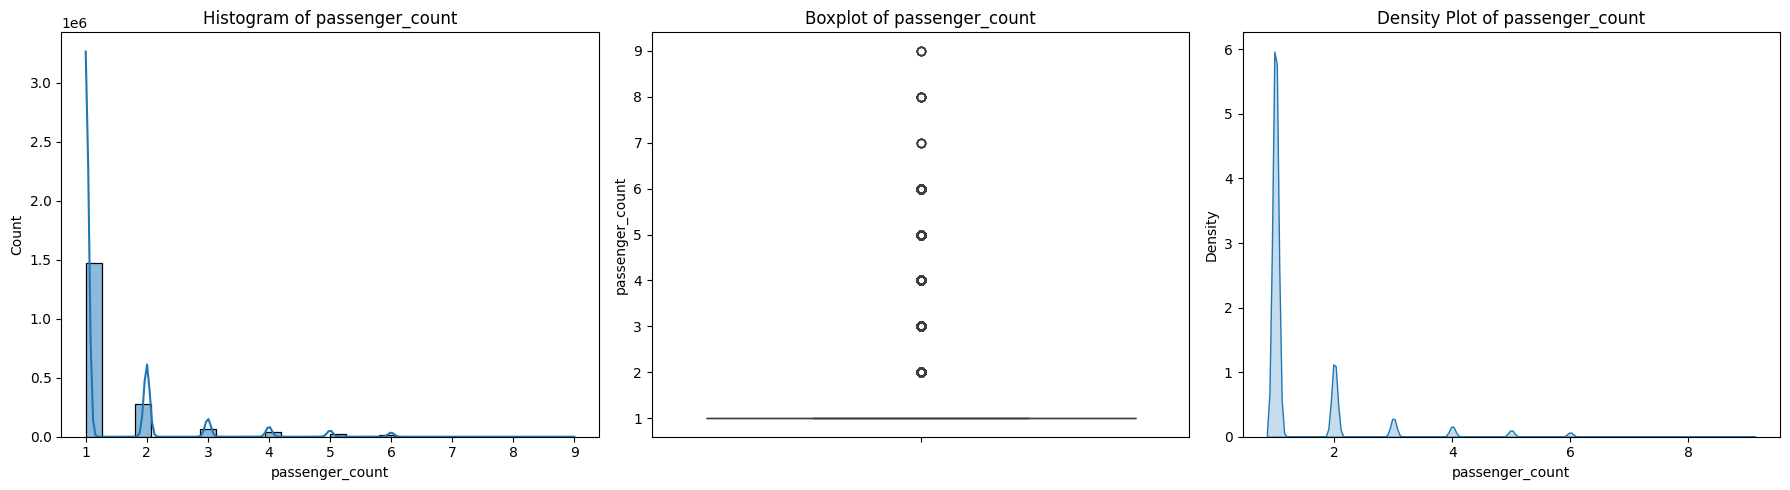

Plot saved to PDF!


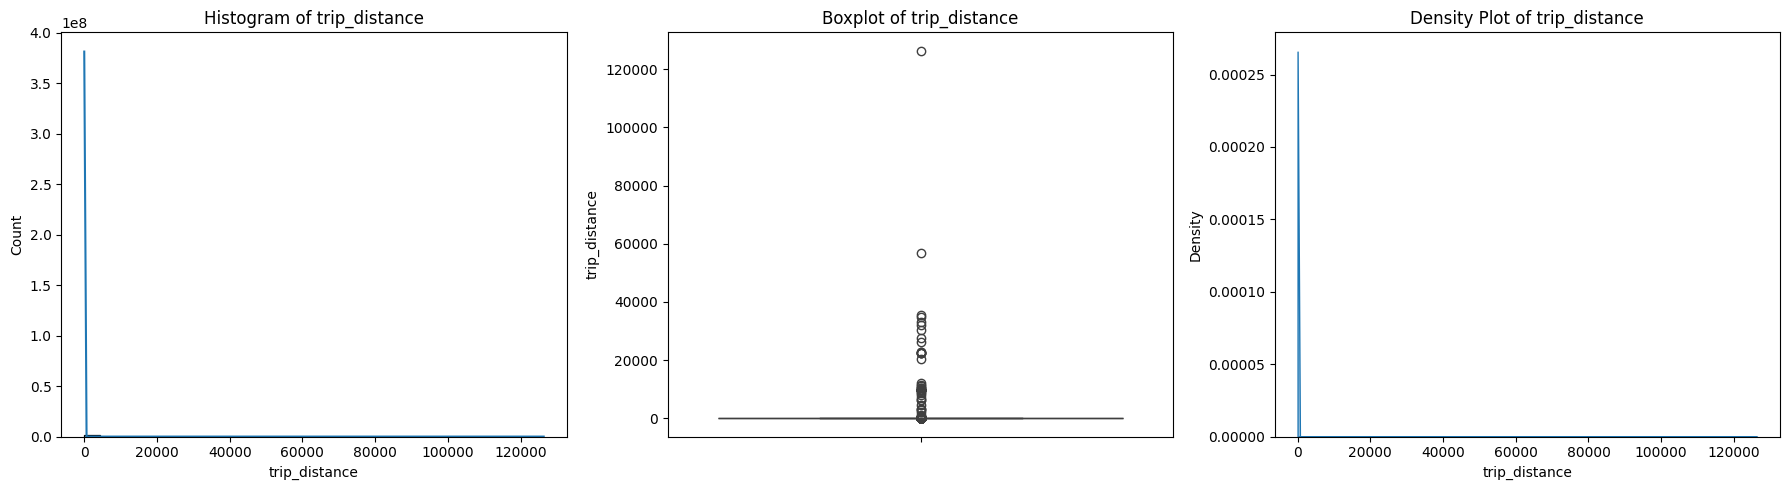

Plot saved to PDF!


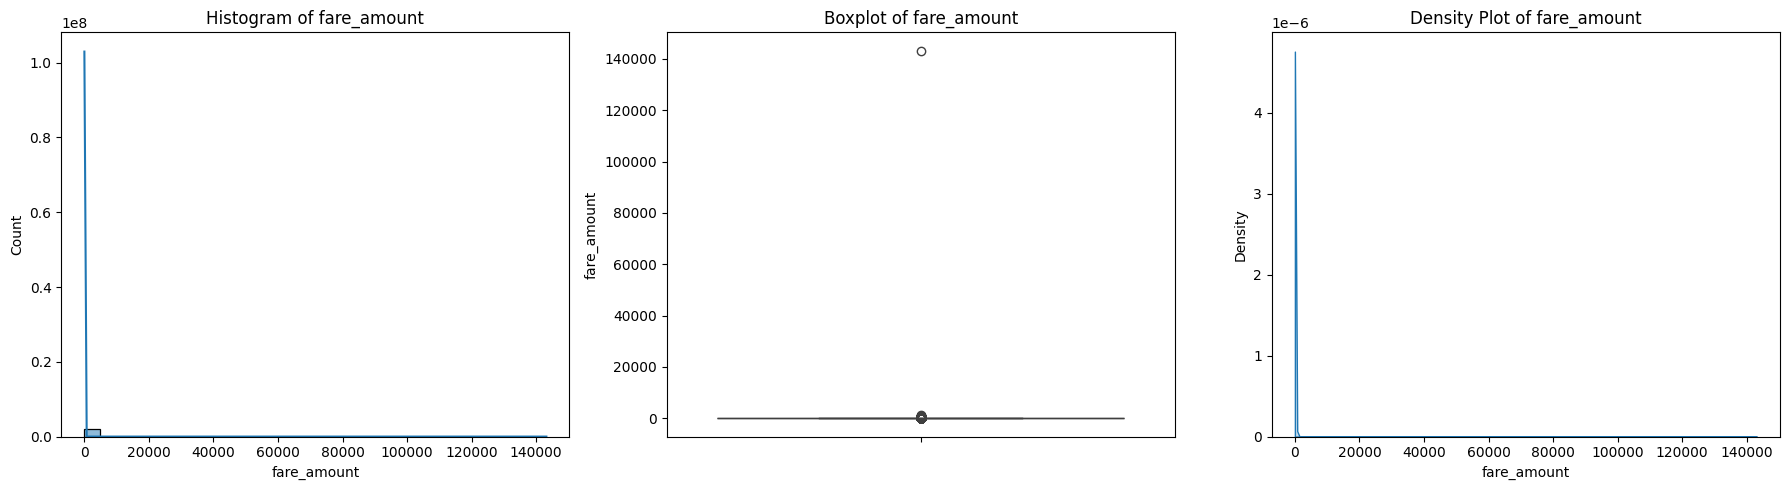

Plot saved to PDF!


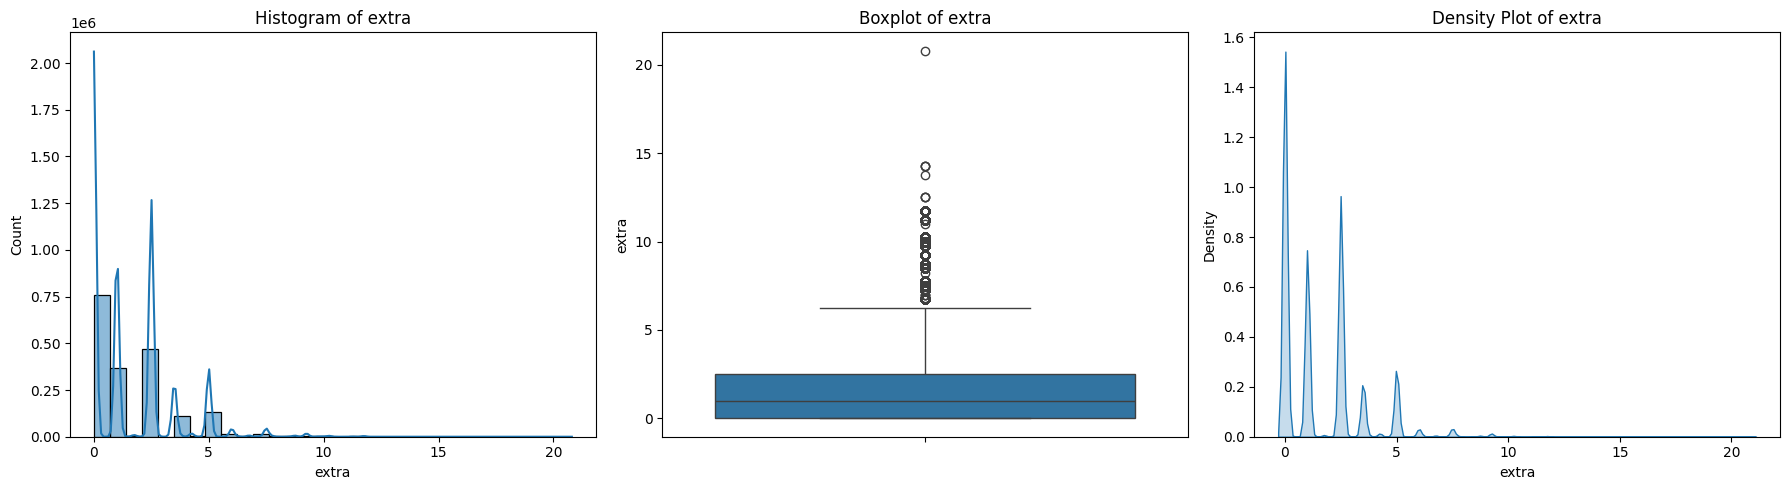

Plot saved to PDF!


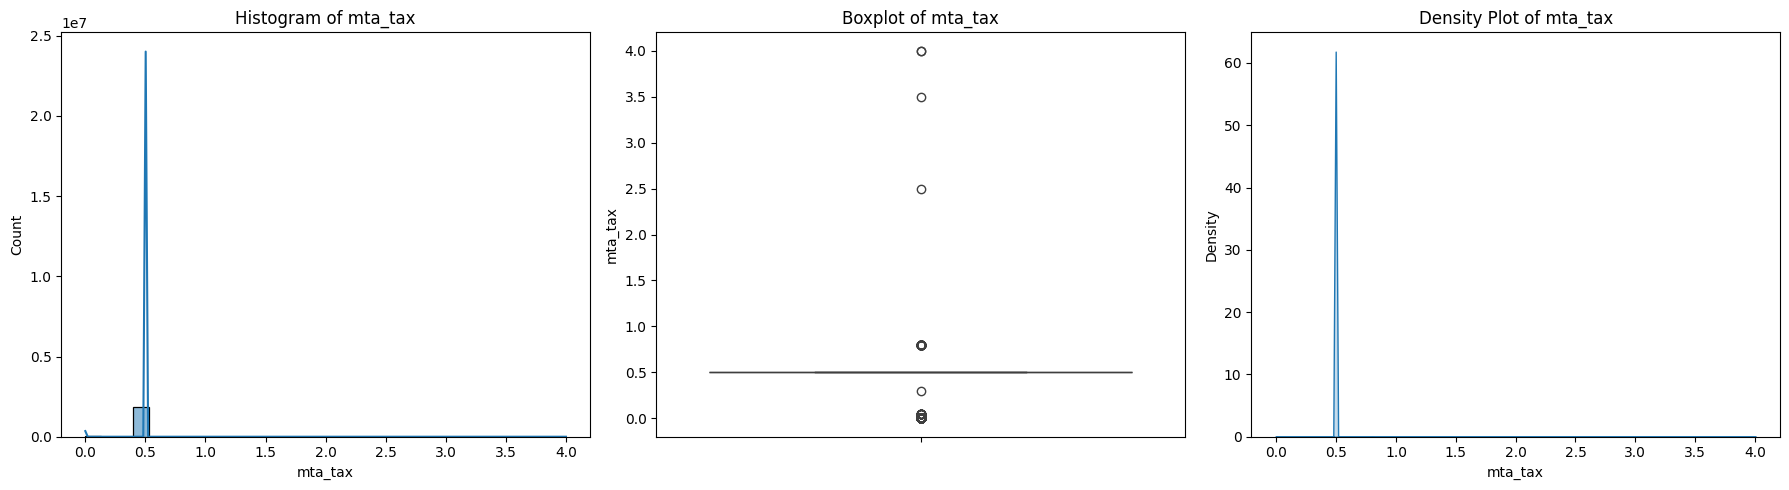

Plot saved to PDF!


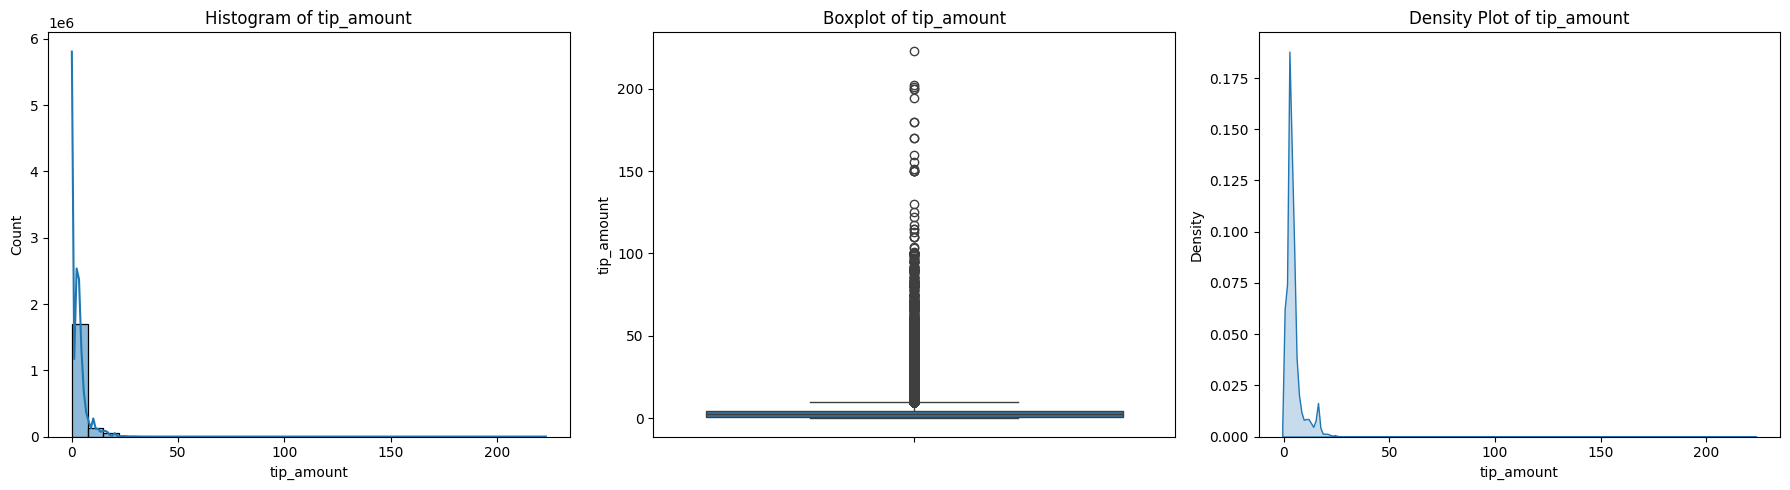

Plot saved to PDF!


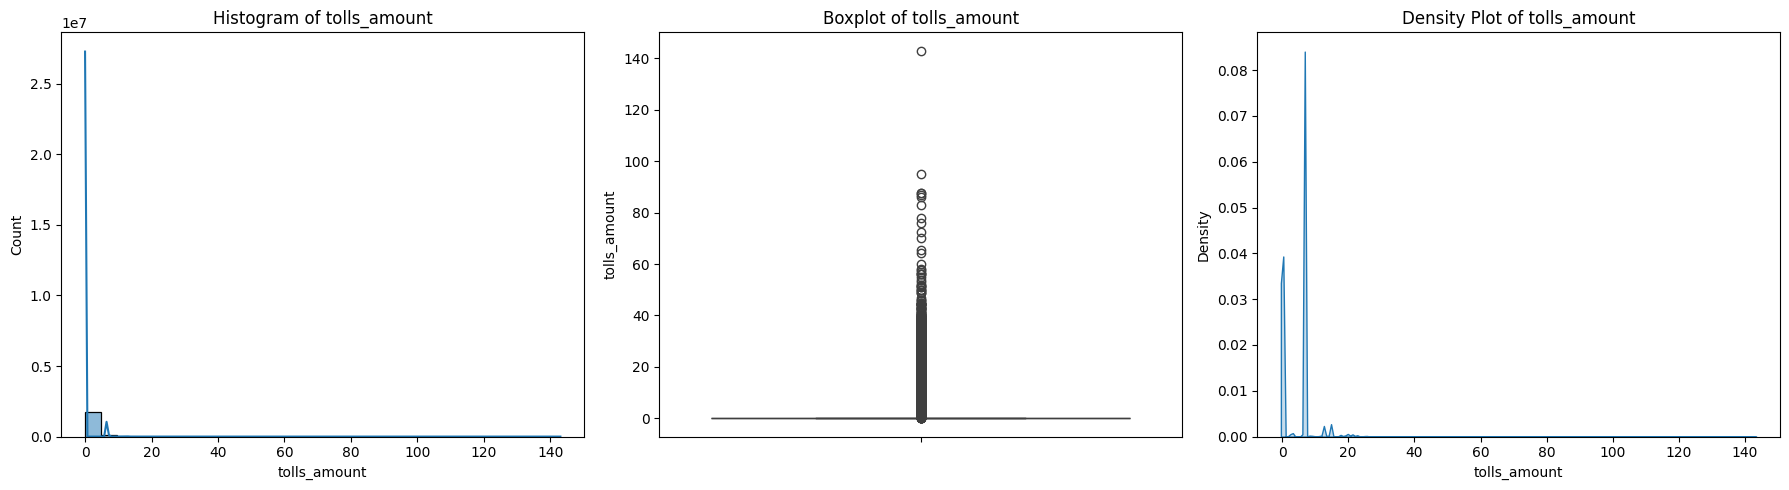

Plot saved to PDF!


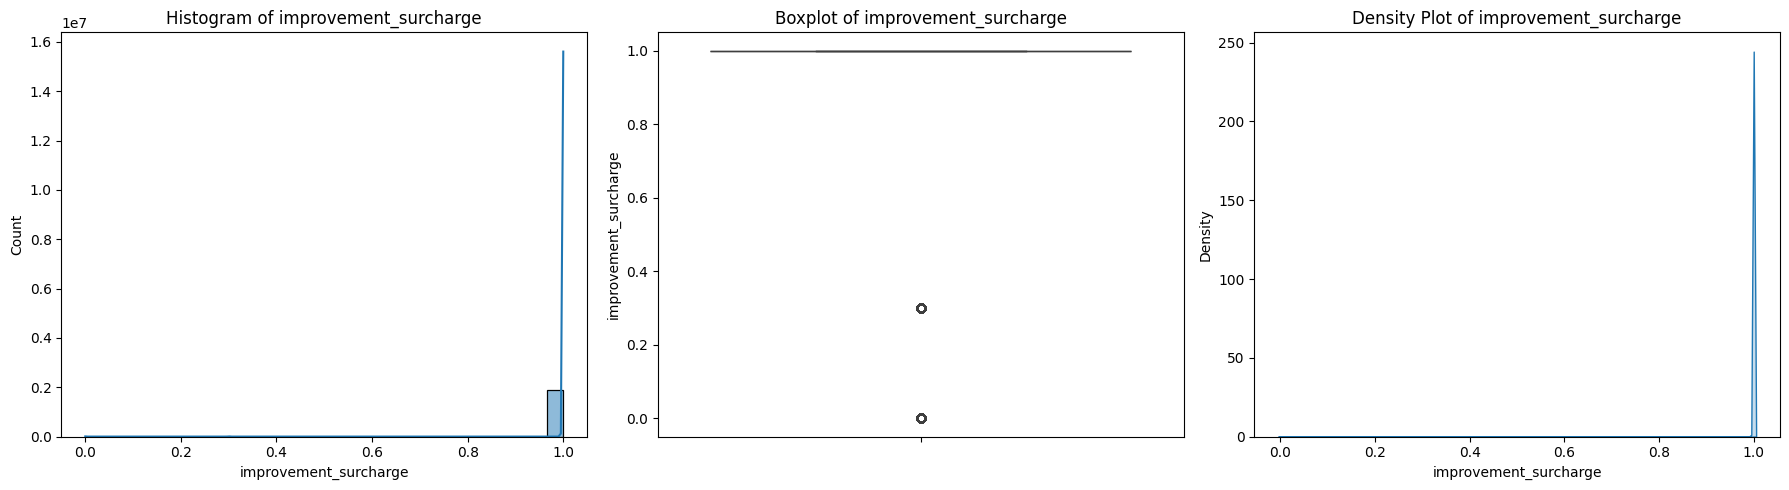

Plot saved to PDF!


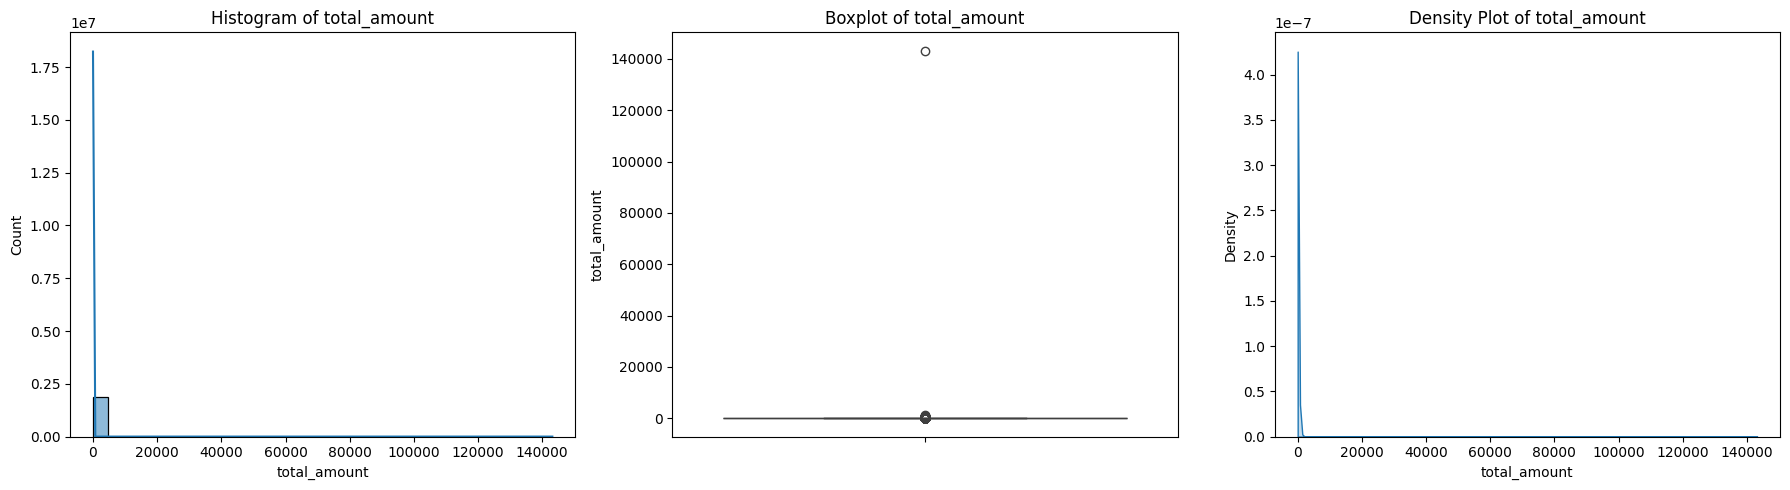

Plot saved to PDF!


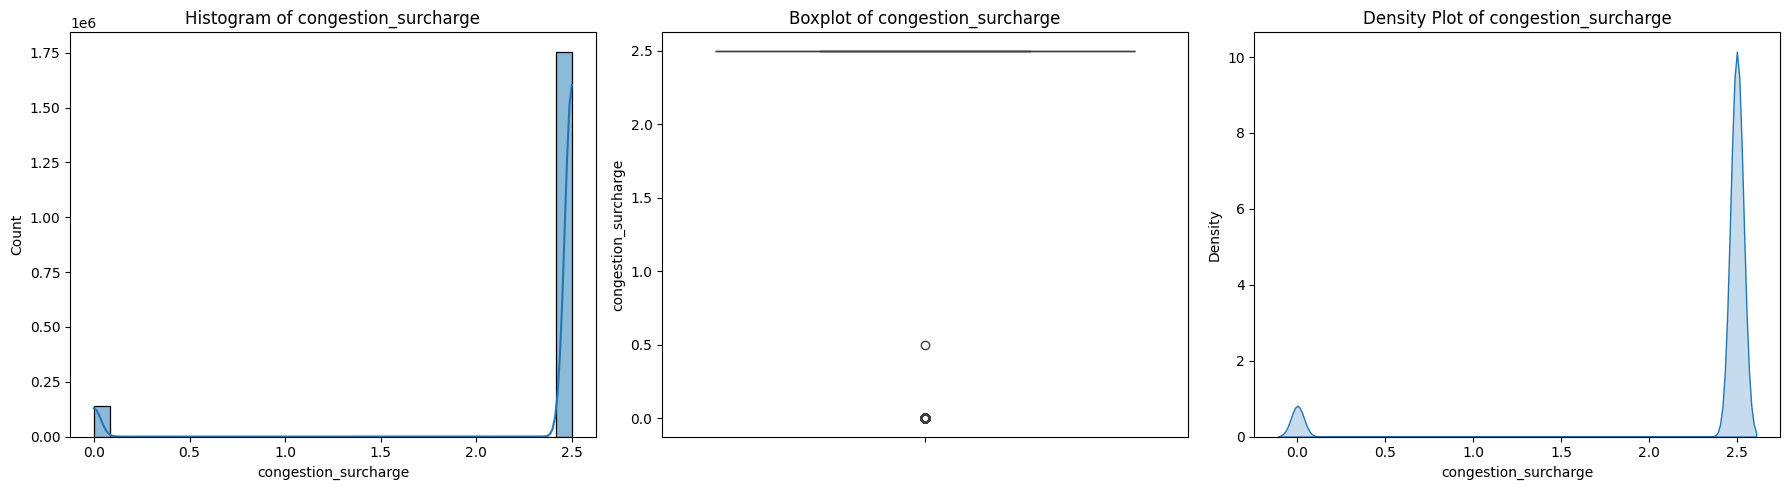

Plot saved to PDF!


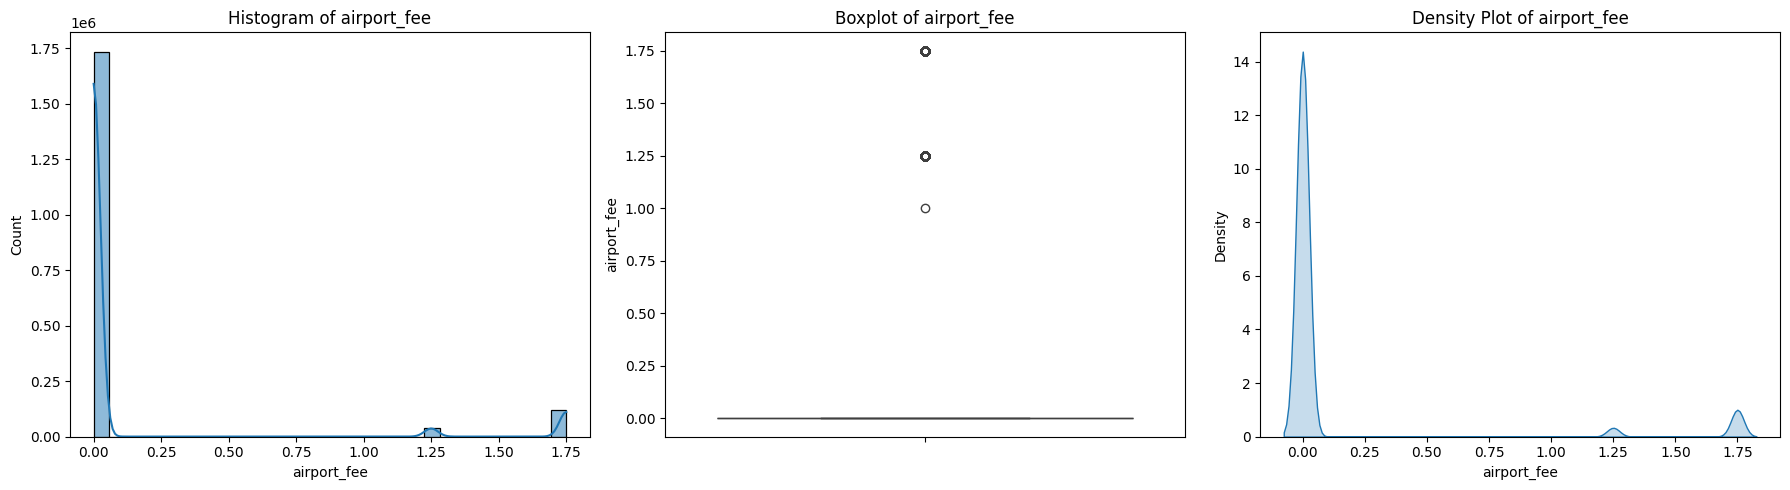

In [56]:
# Plot for df_non_negative (Before Handling Outlier)
plot_numeric_columns(df_non_negative)

#### removing rows less than 5% outlier (IQR)

In [57]:
import pandas as pd

def drop_low_outlier_rows(df, threshold=5, exclude_cols=[]):  #on all numeric columns
    
    # Select numeric columns, excluding specified ones
    numeric_cols = df.select_dtypes(include=["number"]).columns
    #numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols]
    df_numeric = df[numeric_cols]

    # Compute IQR
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers (Boolean mask)
    outliers = (df_numeric < lower_bound) | (df_numeric > upper_bound)

    # Compute outlier count & percentage before removal
    outlier_counts_before = outliers.sum()
    outlier_percent_before = (outlier_counts_before / len(df)) * 100  

    # Get columns where outlier percentage is < threshold
    cols_to_drop_outliers = outlier_percent_before[outlier_percent_before < threshold].index.tolist()

    if not cols_to_drop_outliers:
        print("\nNo columns have outliers below the threshold. Returning original DataFrame.")
        return df.copy()

    # Drop rows where any of these columns have outliers
    df_filtered = df[~outliers[cols_to_drop_outliers].any(axis=1)].copy()

    # Compute outlier percentage after removal
    df_numeric_filtered = df_filtered[numeric_cols]
    outliers_after = (df_numeric_filtered < lower_bound) | (df_numeric_filtered > upper_bound)
    outlier_counts_after = outliers_after.sum()
    outlier_percent_after = (outlier_counts_after / len(df_filtered)) * 100  
    skewness_after = df_numeric_filtered.skew()

    # Create summary table
    summary_df = pd.DataFrame({
        "Outlier Percentage Before": outlier_percent_before,
        "Number of Rows Before": len(df),
        "Outlier Percentage After": outlier_percent_after,
        "Number of Rows After": len(df_filtered),
        "Skewness After": skewness_after
    })

    # Print formatted summary table
    print("\nOutlier Summary Before and After Row Removal:\n")
    print(summary_df.to_string())

    return df_filtered

# Ordinal Columns to exclude from outlier removal
exclude_cols = ["vendorid", "ratecodeid", "pulocationid", "dolocationid", 
                "payment_type", "hour"]

# Apply function and create new DF df_non_negative_drop_outlier
df_non_negative_drop_outlier = drop_low_outlier_rows(df_non_negative, threshold=5, exclude_cols=exclude_cols)



Outlier Summary Before and After Row Removal:

                       Outlier Percentage Before  Number of Rows Before  Outlier Percentage After  Number of Rows After  Skewness After
vendorid                                0.023413                1896400                  0.000000               1843287       -1.088165
passenger_count                        22.390899                1896400                 22.273580               1843287        3.043693
trip_distance                          13.146066                1896400                 11.349779               1843287      608.202213
ratecodeid                              5.392691                1896400                  4.527727               1843287       13.167488
pulocationid                            0.000000                1896400                  0.000000               1843287       -0.265932
dolocationid                            0.000000                1896400                  0.000000               1843287       -0.354964


#### After removing 5% outlier new df is df_non_negative_drop_outlier

#### Check the distribution of trip_distance,fare_amount and total_amount which has abnormal skew

In [58]:
df_non_negative_drop_outlier["trip_distance"].describe()

count    1.843287e+06
mean     3.668783e+00
std      1.310157e+02
min      0.000000e+00
25%      1.040000e+00
50%      1.750000e+00
75%      3.210000e+00
max      1.263605e+05
Name: trip_distance, dtype: float64

In [59]:
df_non_negative_drop_outlier["fare_amount"].describe()

count    1.843287e+06
mean     1.889248e+01
std      1.066856e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.120000e+01
max      1.431635e+05
Name: fare_amount, dtype: float64

In [60]:
df_non_negative_drop_outlier["total_amount"].describe()

count    1.843287e+06
mean     2.756215e+01
std      1.073605e+02
min      1.500000e+00
25%      1.595000e+01
50%      2.090000e+01
75%      2.976000e+01
max      1.431675e+05
Name: total_amount, dtype: float64

#### clipping the outlier values (less than lower_bound values make lower_bound and greqter thanupper_bound make upper_bound and create new DF df_non_negative_clipped

In [61]:
def clip_outliers_to_iqr(df, exclude_cols=[]):
    # Select numeric columns excluding specified ones
    #numeric_cols = df.select_dtypes(include=["number"]).columns
    numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols]
    df_numeric = df[numeric_cols]

    # Compute IQR
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values to IQR range
    df_clipped = df.copy()
    '''
    import pandas as pd
    s = pd.Series([10, 20, 30, 40, 50])
    s_clipped = s.clip(lower=15, upper=35)
    print(s_clipped)
    '''
    df_clipped[numeric_cols] = df_numeric.clip(lower=lower_bound, upper=upper_bound, axis=1)

    return df_clipped

# Exclude ordinal columns (categorical-like values)
exclude_cols = ["vendorid", "ratecodeid", "pulocationid", "dolocationid", 
                "payment_type", "hour"]

# Apply function to clip outliers
df_non_negative_clipped = clip_outliers_to_iqr(df_non_negative_drop_outlier, exclude_cols=exclude_cols)

# Check the updated dataset
df_non_negative_clipped.head()


vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              1.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              1.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  ratecodeid store_and_fwd_flag  pulocationid  dolocationid  \
0          0.860         1.0                  N           141           140   
1          6.465         1.0                  N           138           256   
2          1.240         1.0                  N           161           237   
3          1.440         1.0                  N           237           141   
4          0.540         1.0                  N           143           142   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        2.00           0.0   
1             2  ...    6.0      0.5        0.00           0.0   
2             1  ...    1.0      0.5        2.58           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             2  ...    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge       date hour  \
0                    1.0         13.50                   2.5 2022-12-31   23   
1                    1.0         41.15                   2.5 2023-01-01    0   
2                    1.0         15.48                   2.5 2023-01-01    0   
3                    1.0         16.40                   2.5 2023-01-01    0   
4                    1.0         11.50                   2.5 2023-01-01    0   

   airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 21 columns]

#### Check the skew value after clipping the numerical values (NOT categorical values)

In [62]:
df_non_negative_clipped.shape

(1843287, 21)

In [63]:
show_all_outliers(df_non_negative_clipped)

Outlier summary per column:
                        Outlier Count  Outlier Percentage   Skewness
payment_type                  393860           21.367264   1.763828
ratecodeid                     83459            4.527727  13.167488
vendorid                           0            0.000000  -1.088165
tip_amount                         0            0.000000   0.816012
hour                               0            0.000000  -0.609648
congestion_surcharge               0            0.000000   0.000000
total_amount                       0            0.000000   1.026888
improvement_surcharge              0            0.000000   0.000000
tolls_amount                       0            0.000000   0.000000
extra                              0            0.000000   0.872329
mta_tax                            0            0.000000   0.000000
passenger_count                    0            0.000000   0.000000
fare_amount                        0            0.000000   1.058132
dolocationid       

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1          2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
3          2  2023-01-01 00:14:03   2023-01-01 00:24:36              1.0   
4          2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5          2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
11         2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   

    trip_distance  ratecodeid store_and_fwd_flag  pulocationid  dolocationid  \
1           6.465         1.0                  N           138           256   
3           1.440         1.0                  N           237           141   
4           0.540         1.0                  N           143           142   
5           6.465         1.0                  N            66           107   
11          0.780         1.0                  N           237           229   

    payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
1              2  ...    6.0      0.5        0.00           0.0   
3              2  ...    1.0      0.5        0.00           0.0   
4              2  ...    1.0      0.5        0.00           0.0   
5              0  ...    0.0      0.5        5.93           0.0   
11             2  ...    1.0      0.5        0.00           0.0   

    improvement_surcharge  total_amount  congestion_surcharge       date hour  \
1                     1.0         41.15                   2.5 2023-01-01    0   
3                     1.0         16.40                   2.5 2023-01-01    0   
4                     1.0         11.50                   2.5 2023-01-01    0   
5                     1.0         35.57                   2.5 2023-01-01    0   
11                    1.0         12.20                   2.5 2023-01-01    0   

    airport_fee  
1           0.0  
3           0.0  
4           0.0  
5           0.0  
11          0.0  

[5 rows x 21 columns]

Plot saved to PDF!


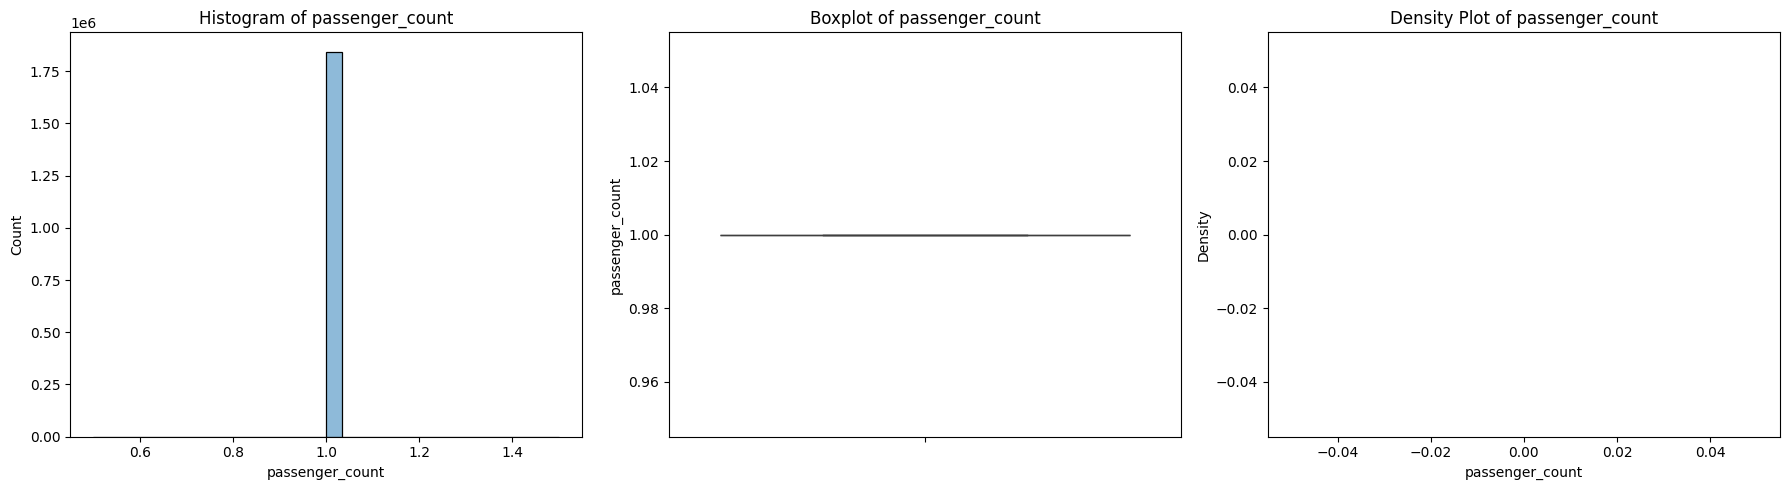

Plot saved to PDF!


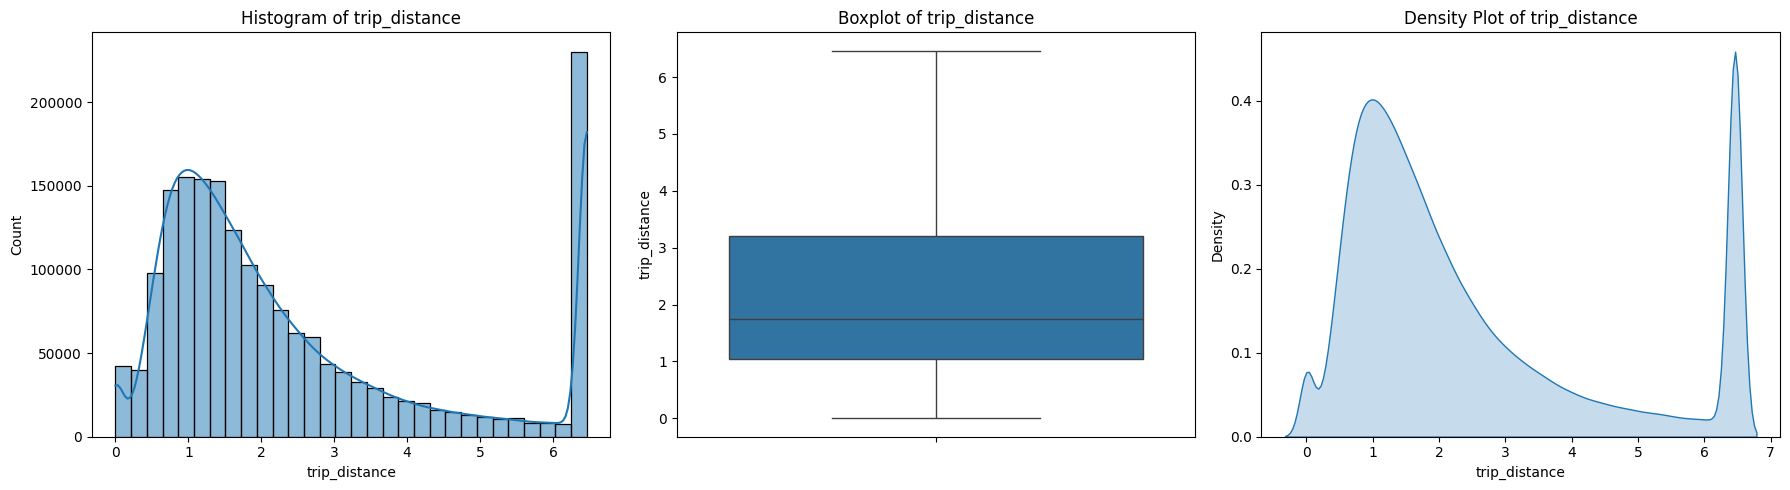

Plot saved to PDF!


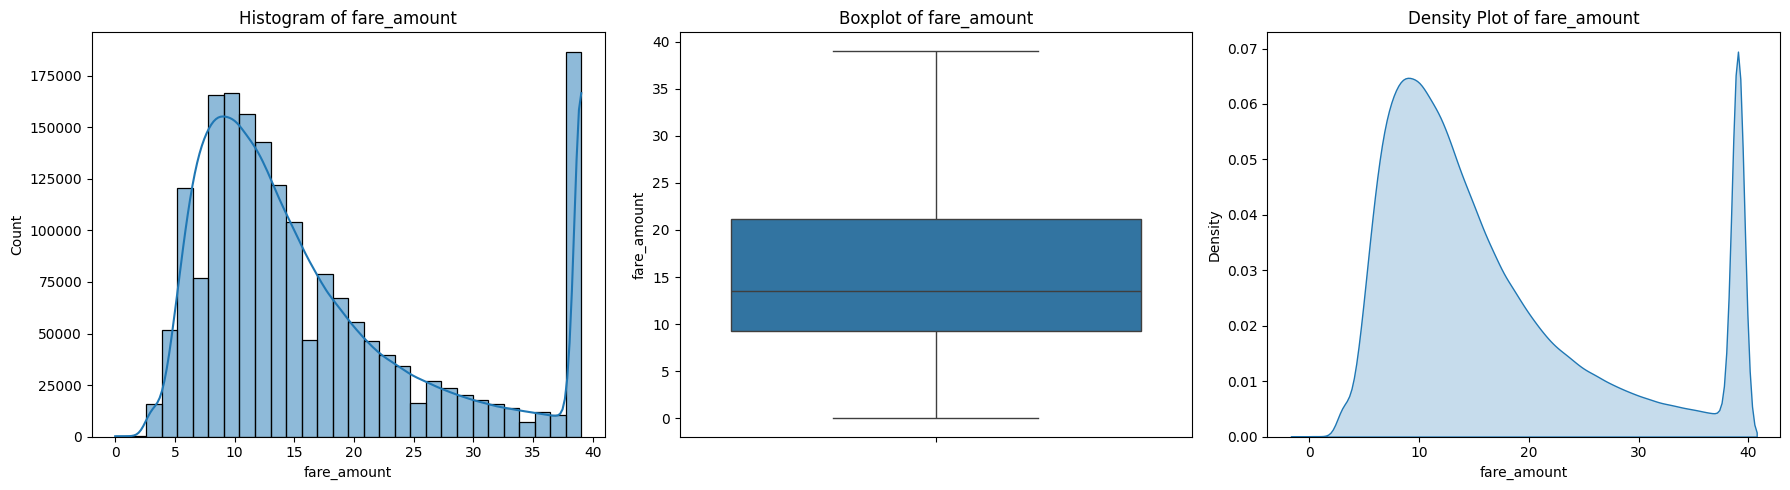

Plot saved to PDF!


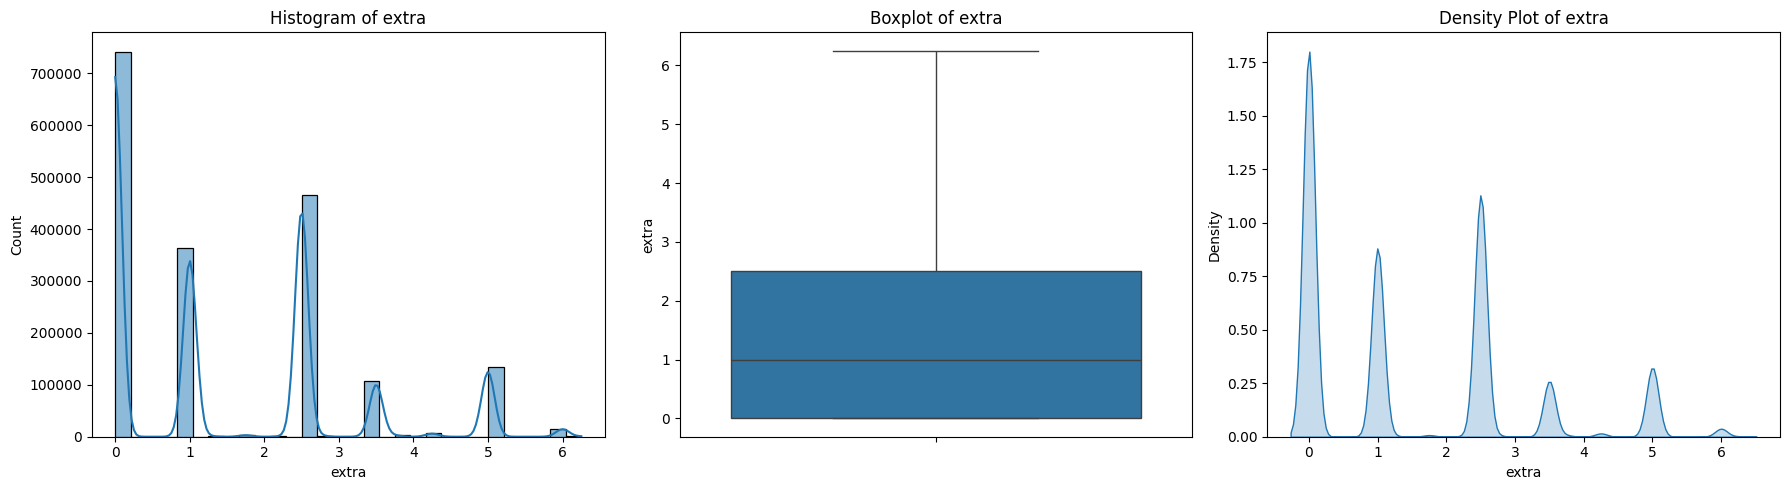

Plot saved to PDF!


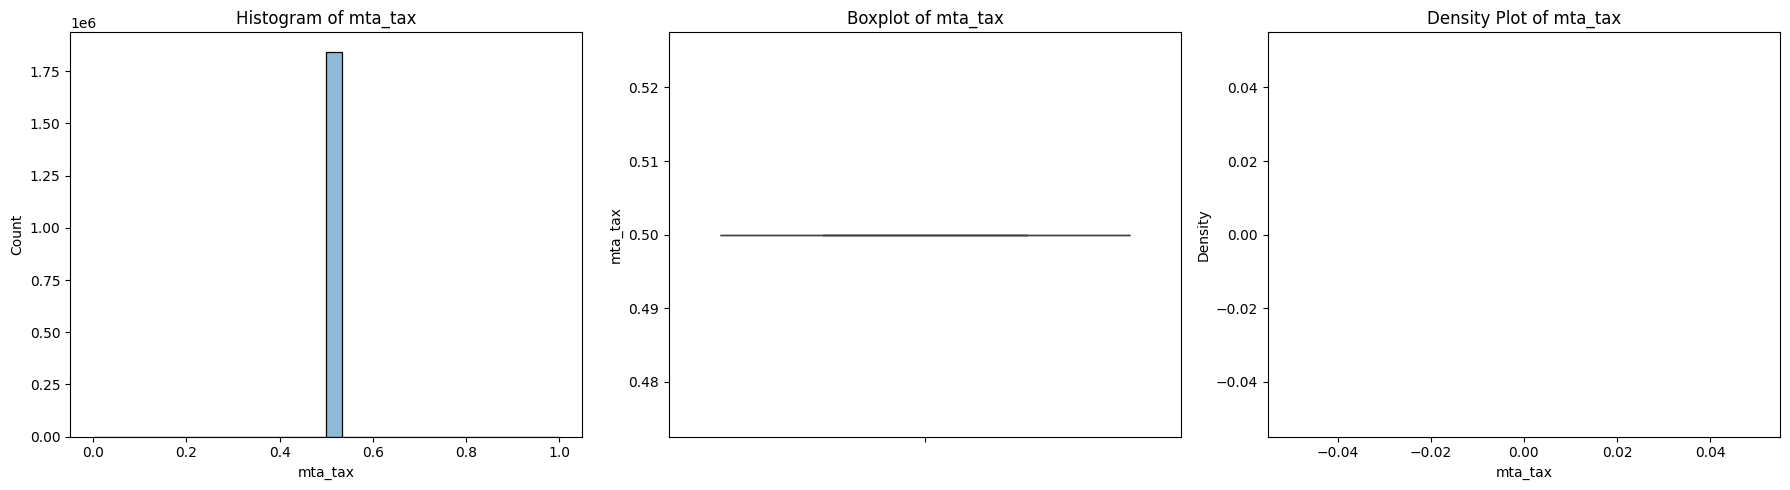

Plot saved to PDF!


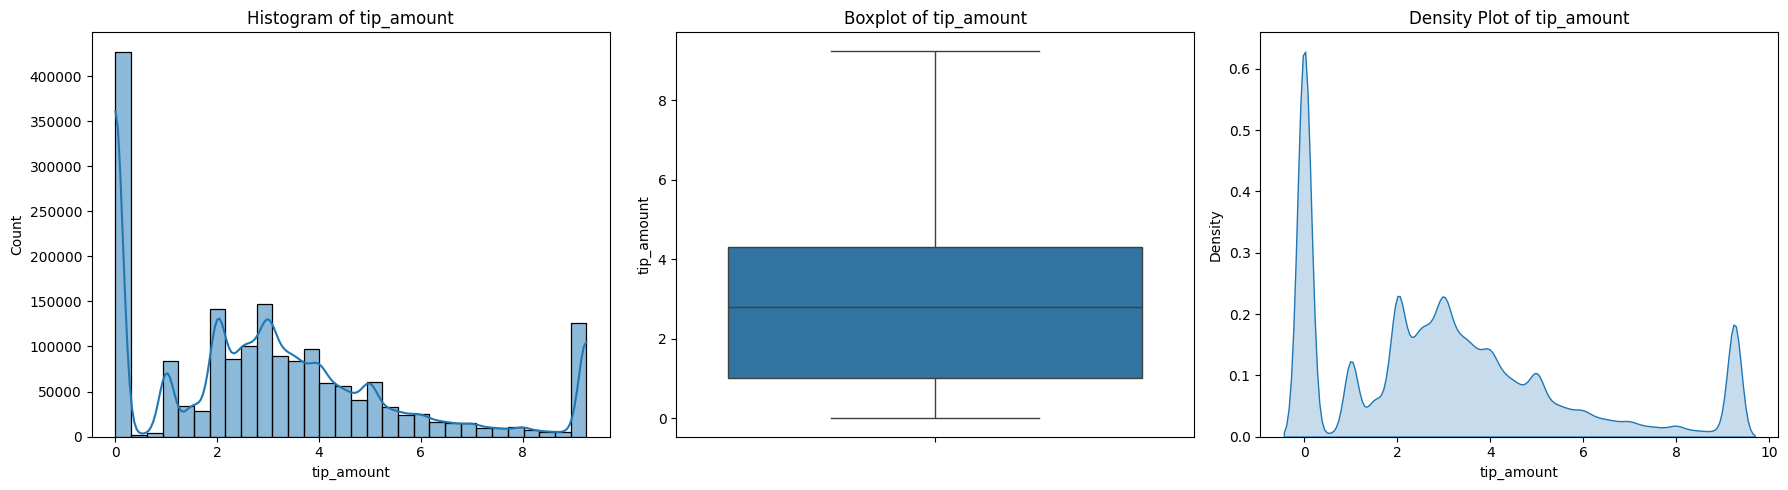

Plot saved to PDF!


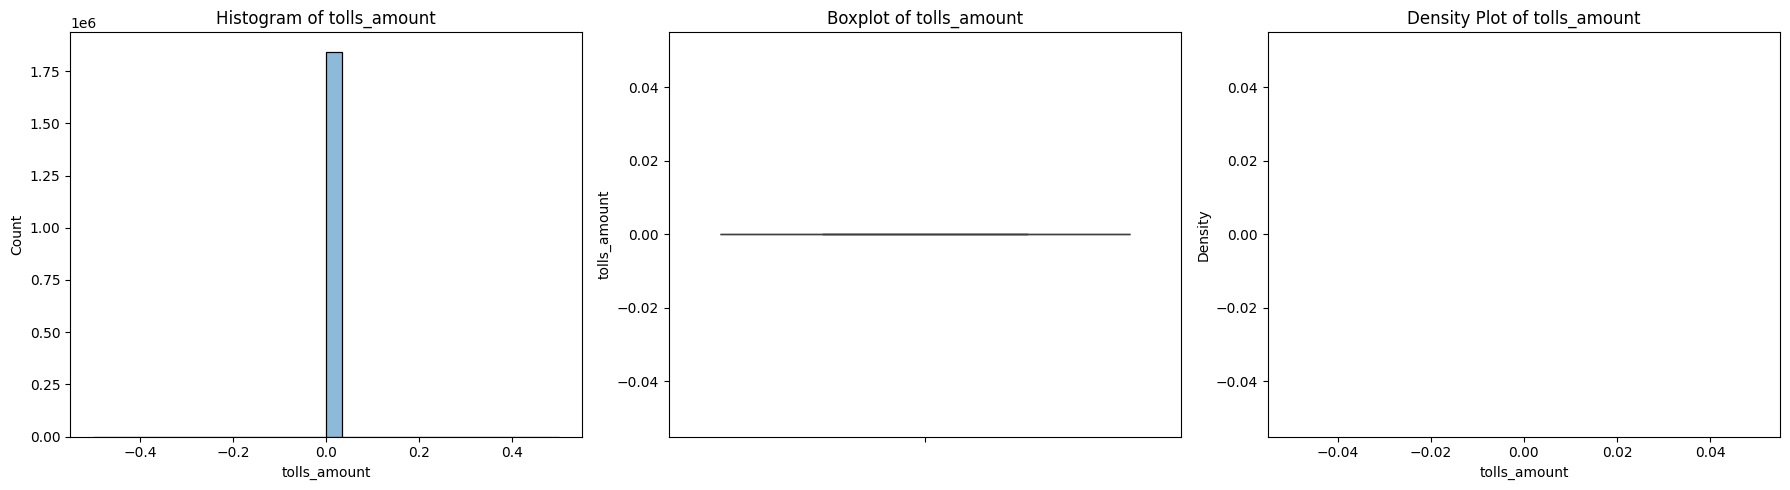

Plot saved to PDF!


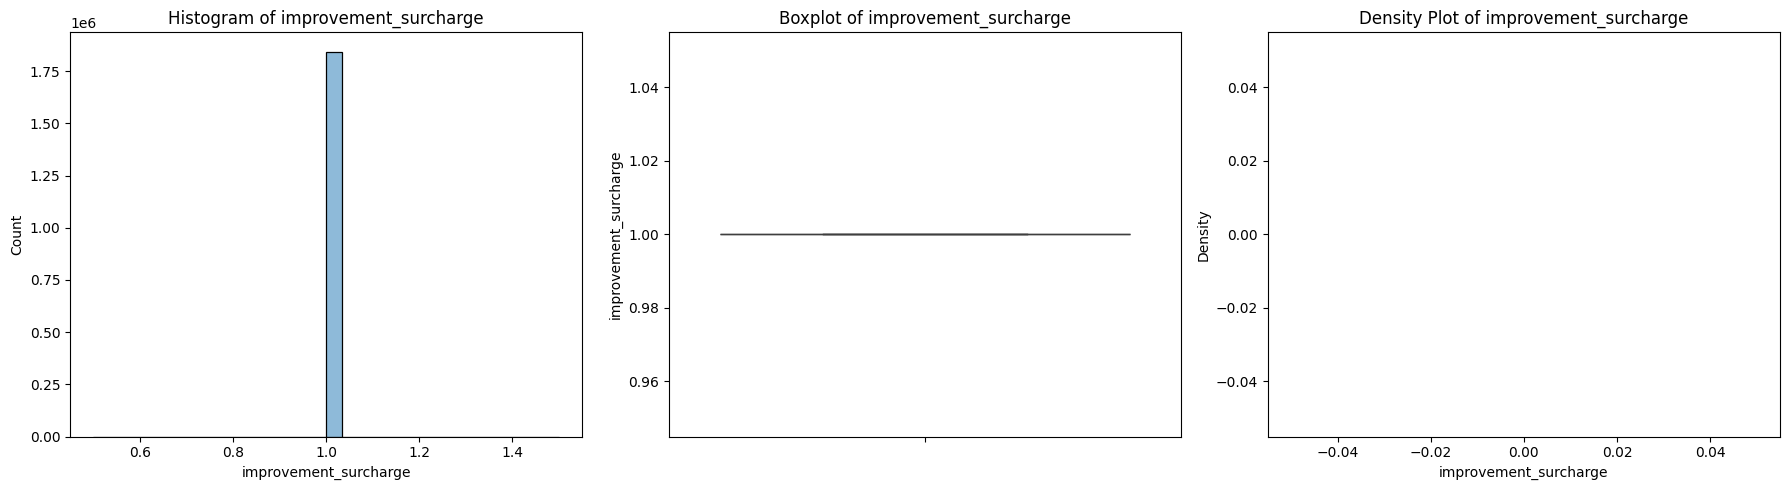

Plot saved to PDF!


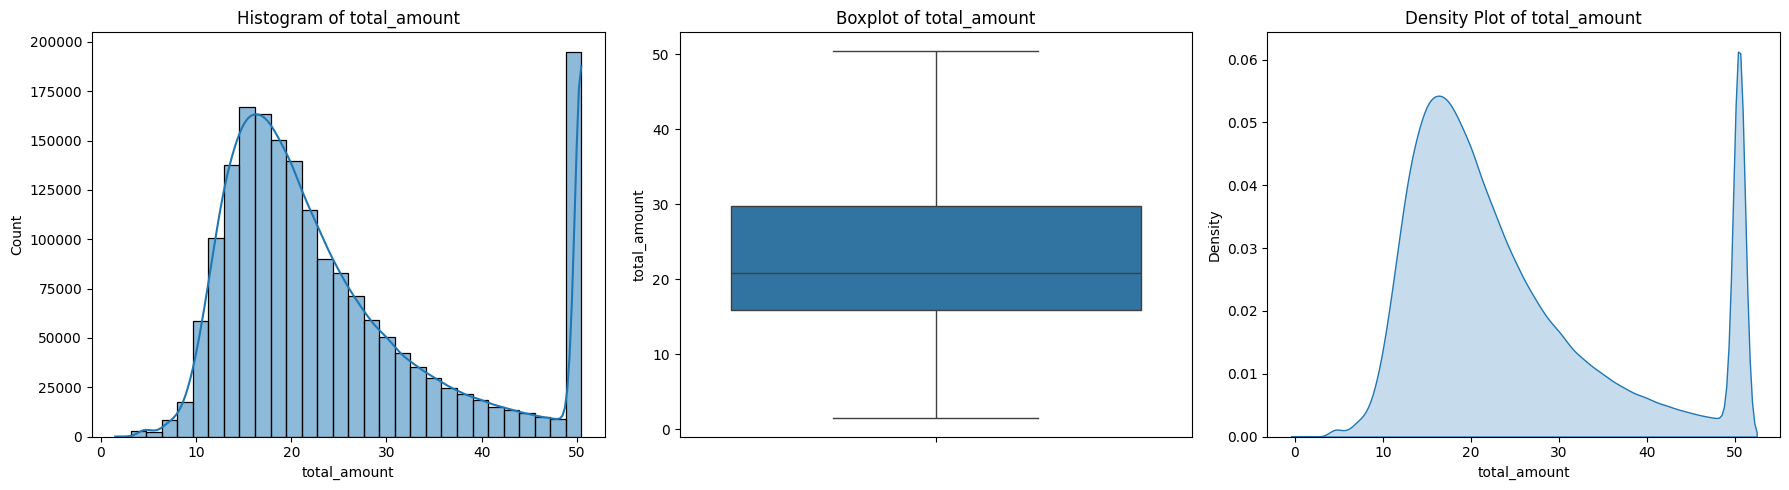

Plot saved to PDF!


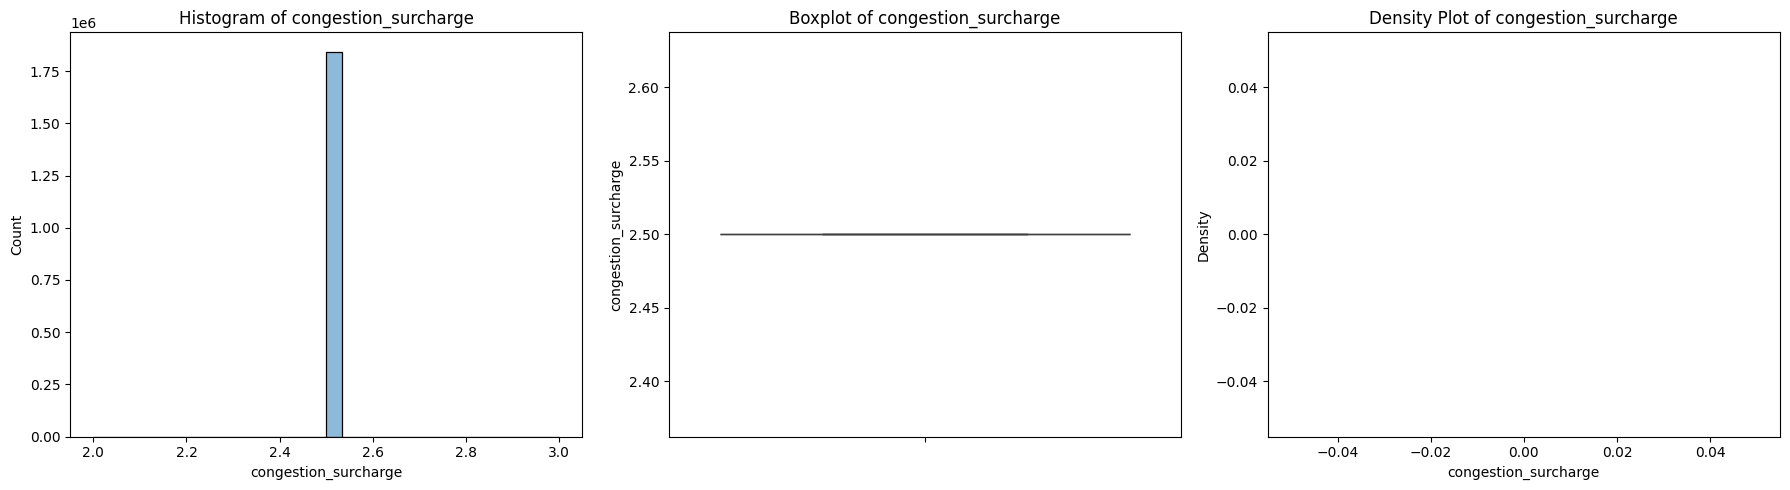

Plot saved to PDF!


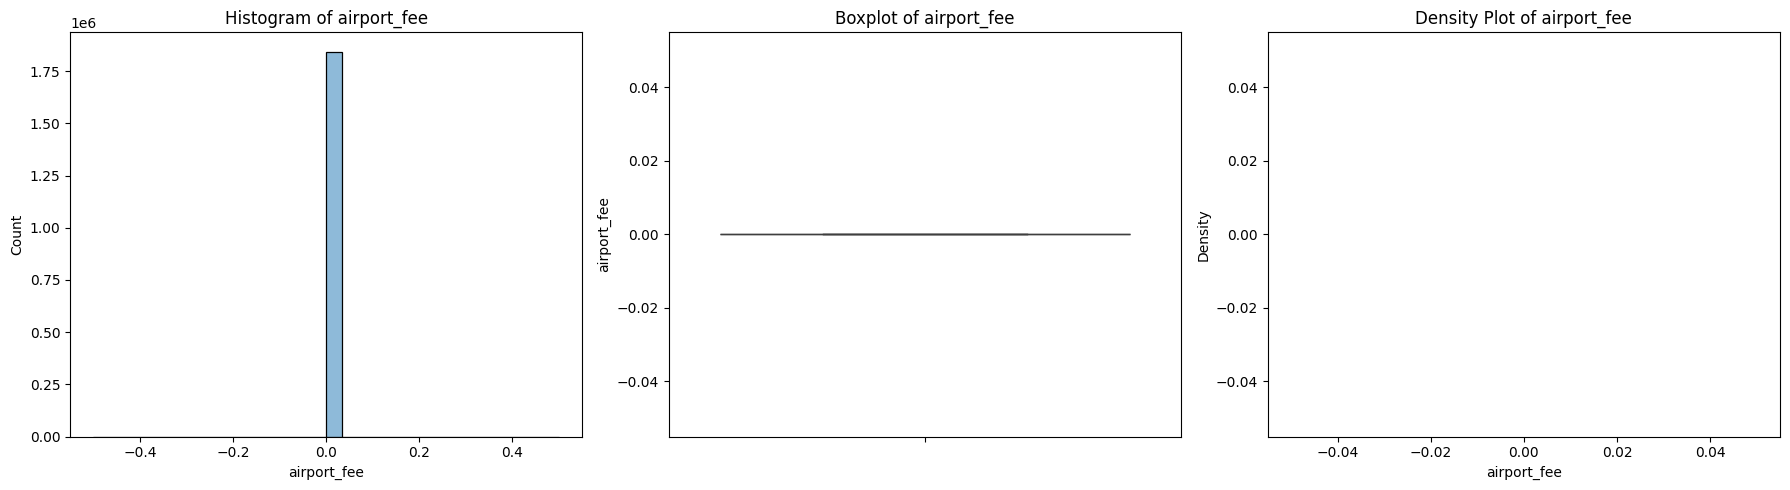

In [64]:
# Plot for df_non_negative_drop_outlier (After dropping 5% Outlier)
plot_numeric_columns(df_non_negative_clipped) 

In [65]:
#show_all_outliers(df_non_negative_drop_outlier)

In [66]:
df_non_negative_drop_outlier.shape

(1843287, 21)

#### Visualize Categorical Data

In [67]:
print(df_non_negative_drop_outlier["payment_type"].value_counts())
print(df_non_negative_drop_outlier["ratecodeid"].value_counts())
df_non_negative_drop_outlier.columns

payment_type
1    1449427
2     309038
0      63433
4      13036
3       8353
Name: count, dtype: int64
ratecodeid
1.0     1759828
2.0       68761
99.0      10416
4.0        2960
5.0        1319
6.0           3
Name: count, dtype: int64


Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'date', 'hour', 'airport_fee'],
      dtype='object')

Plots created...

Column: vendorid
vendorid
2    1362118
1     481169
Name: count, dtype: int64
Plot saved to PDF!


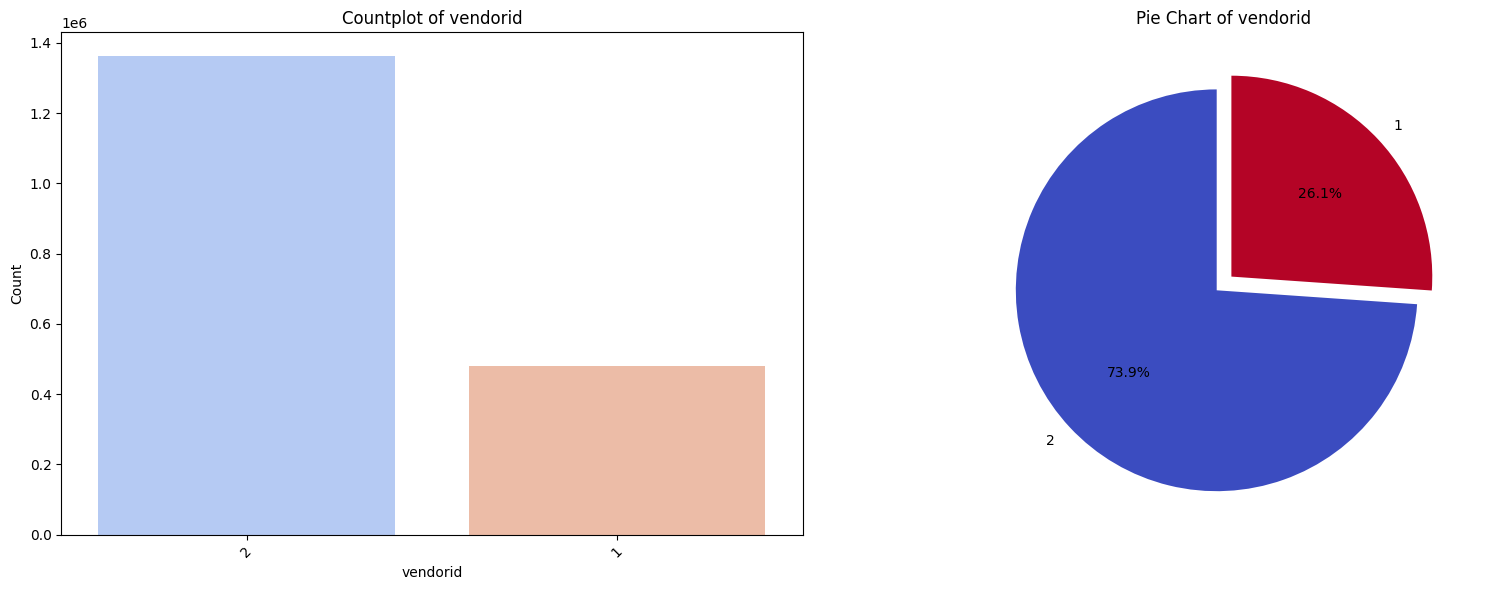


Column: ratecodeid
ratecodeid
1.0     1759828
2.0       68761
99.0      10416
4.0        2960
5.0        1319
6.0           3
Name: count, dtype: int64
Plot saved to PDF!


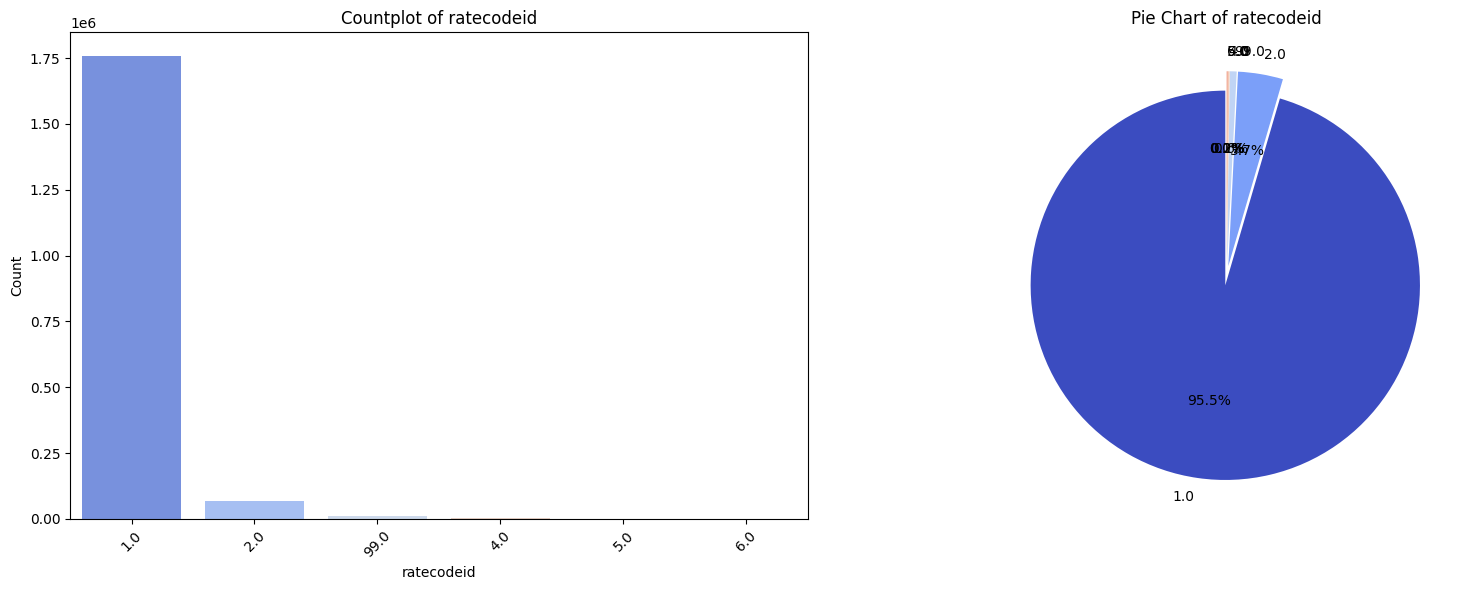


Column: payment_type
payment_type
1    1449427
2     309038
0      63433
4      13036
3       8353
Name: count, dtype: int64
Plot saved to PDF!


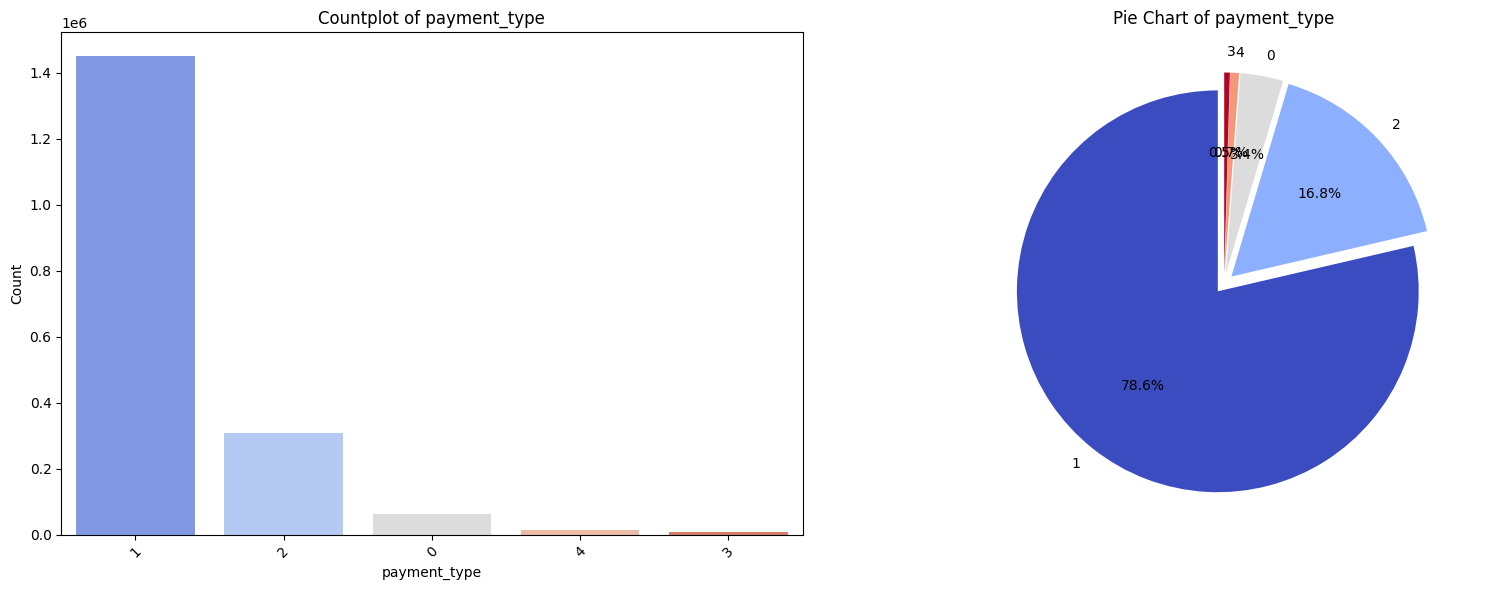


Column: pulocationid
pulocationid
132    92381
237    88115
161    86123
236    79319
162    65704
       ...  
27         1
251        1
115        1
84         1
172        1
Name: count, Length: 258, dtype: int64
Plot saved to PDF!


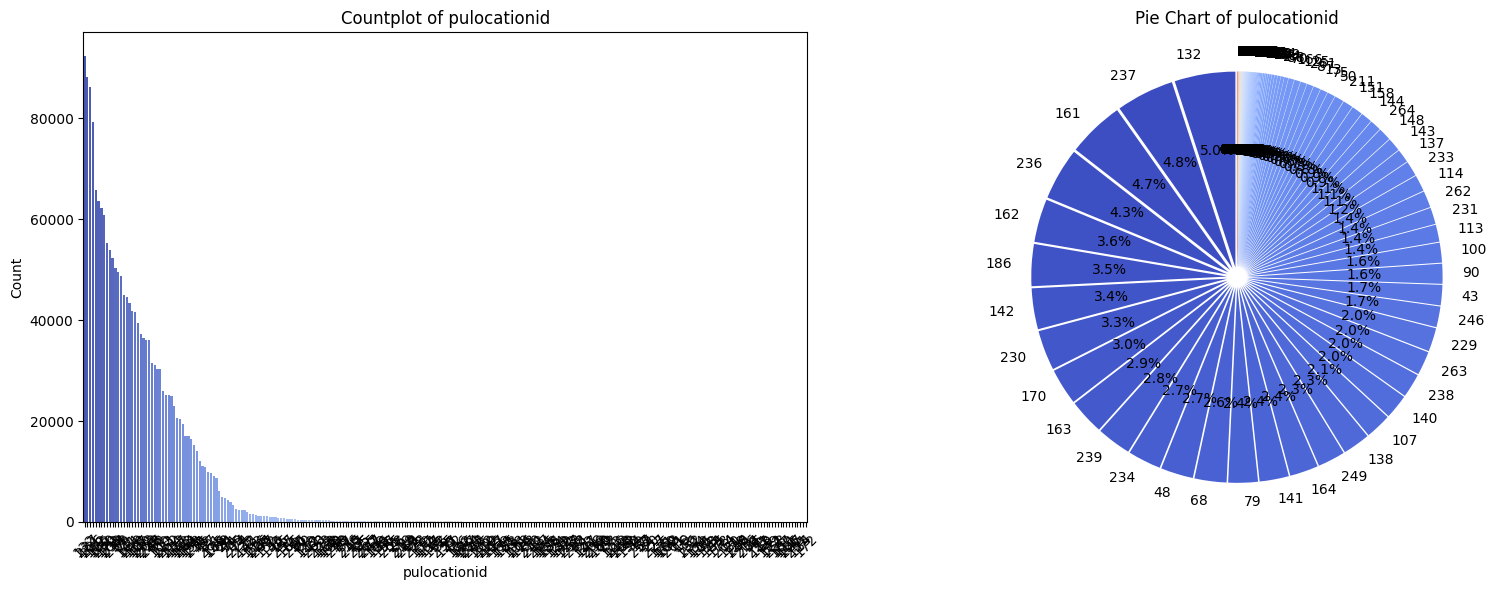


Column: dolocationid
dolocationid
236    82705
237    78830
161    72446
230    55971
170    54924
       ...  
84         8
204        6
187        5
2          4
99         3
Name: count, Length: 260, dtype: int64
Plot saved to PDF!


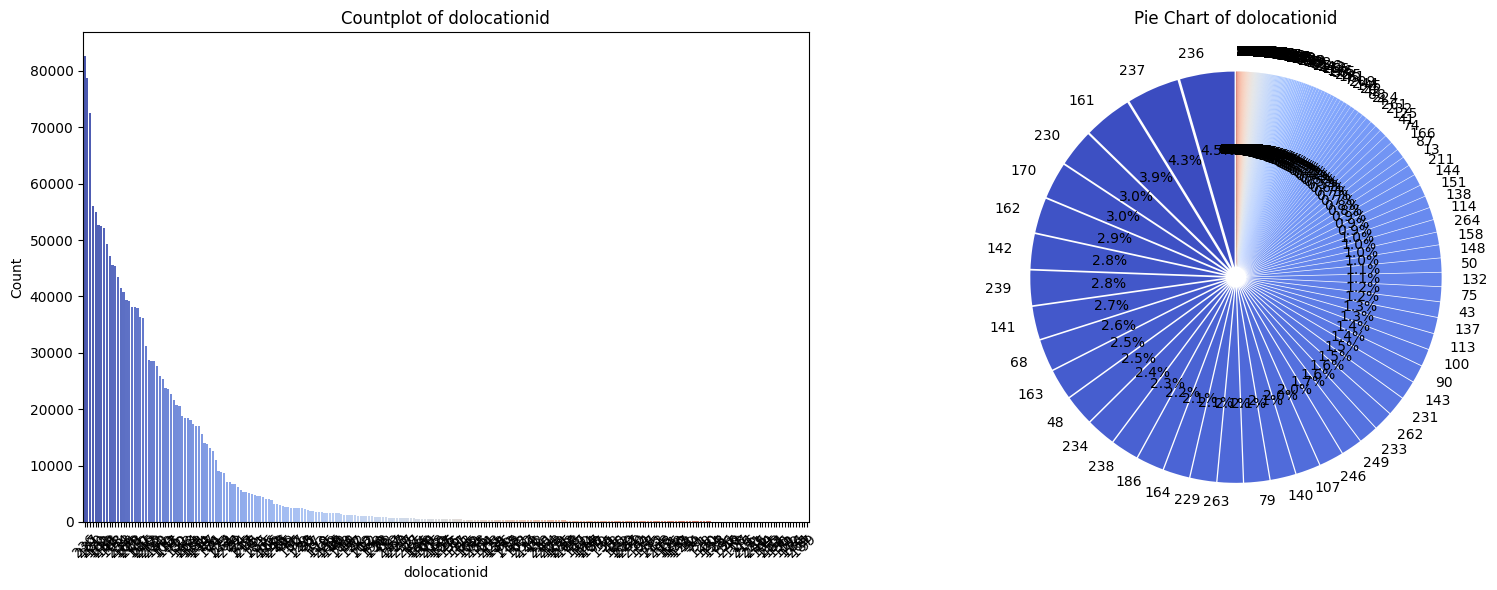


Column: hour
hour
18    128458
17    121677
19    114843
15    114626
14    111519
16    110694
21    104886
20    104757
13    104253
12    101348
22     97230
11     93323
10     85864
9      79203
23     76565
8      70407
0      52722
7      50742
1      35484
6      25492
2      23365
3      15246
5      10486
4      10097
Name: count, dtype: int64
Plot saved to PDF!


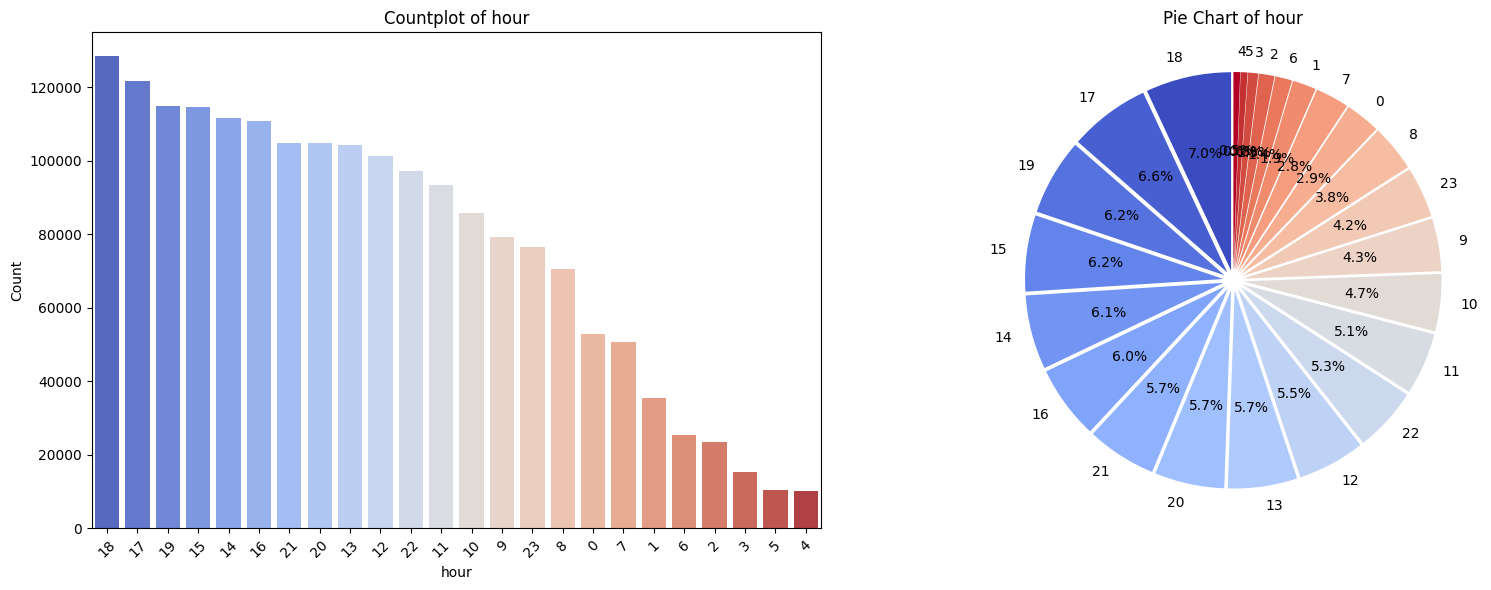

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distribution(df, selected_columns, draw_plot):
    
    for col in selected_columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())  # Print category counts
        
        if draw_plot == 'Y':
            fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1.2, 1.8]})
            
            # Countplot (smaller)
            sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm", ax=axes[0])
            axes[0].set_title(f'Countplot of {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel("Count")
            axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
            
            # Pie Chart (bigger)
            df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                            cmap="coolwarm", explode=[0.05]*df[col].nunique(), ax=axes[1])
            axes[1].set_title(f'Pie Chart of {col}')
            axes[1].set_ylabel("")  # Hide y-label for pie chart
            
            plt.tight_layout()
            
            save_plot_to_pdf() # Save the plot to PDF
            plt.show()

# Define categorical columns for visualization
categorical_columns = ["vendorid", "ratecodeid", "payment_type", "pulocationid", "dolocationid", "hour"]


print("Plots created...")
# Run function with plotting
plot_categorical_distribution(df_non_negative_drop_outlier, categorical_columns, draw_plot='Y')



#### Handling Outliers For Numerical Columns (Catrgorical)

In [69]:
print(df_non_negative_drop_outlier["payment_type"].value_counts())

payment_type
1    1449427
2     309038
0      63433
4      13036
3       8353
Name: count, dtype: int64


#### Again check the outlier counts

In [70]:
print(df_non_negative_drop_outlier["payment_type"].value_counts())

payment_type
1    1449427
2     309038
0      63433
4      13036
3       8353
Name: count, dtype: int64


Plot saved to PDF!


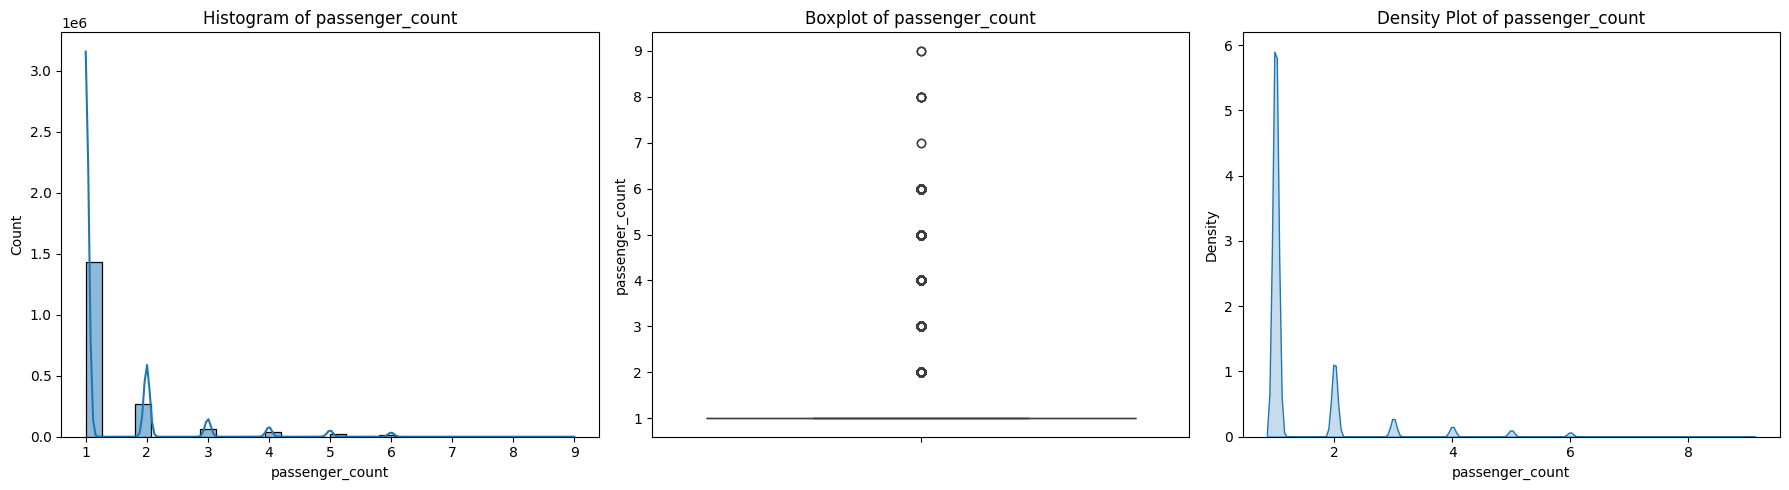

Plot saved to PDF!


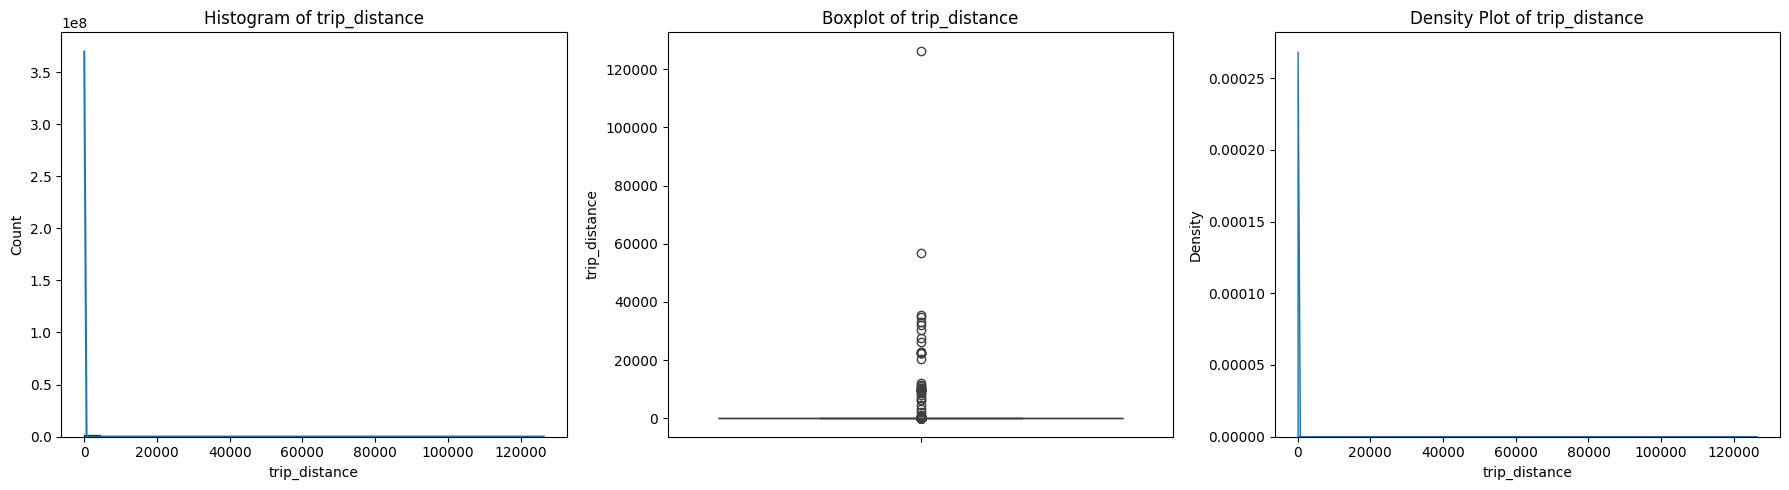

Plot saved to PDF!


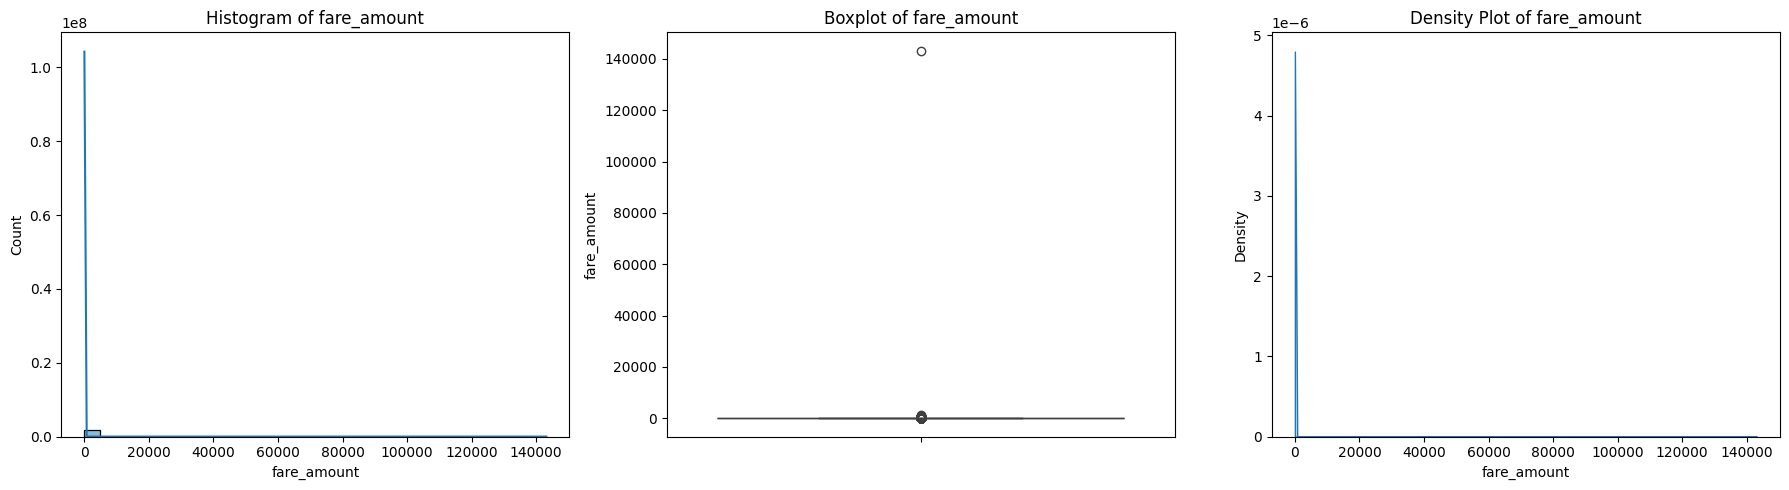

Plot saved to PDF!


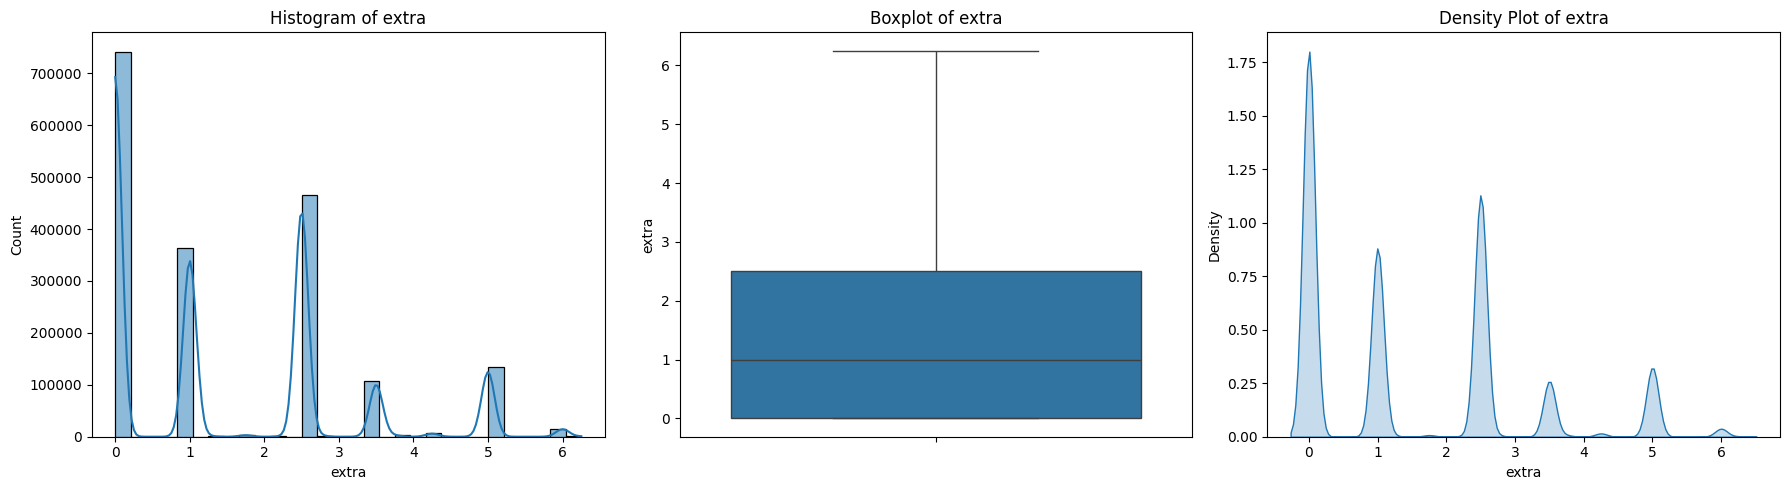

Plot saved to PDF!


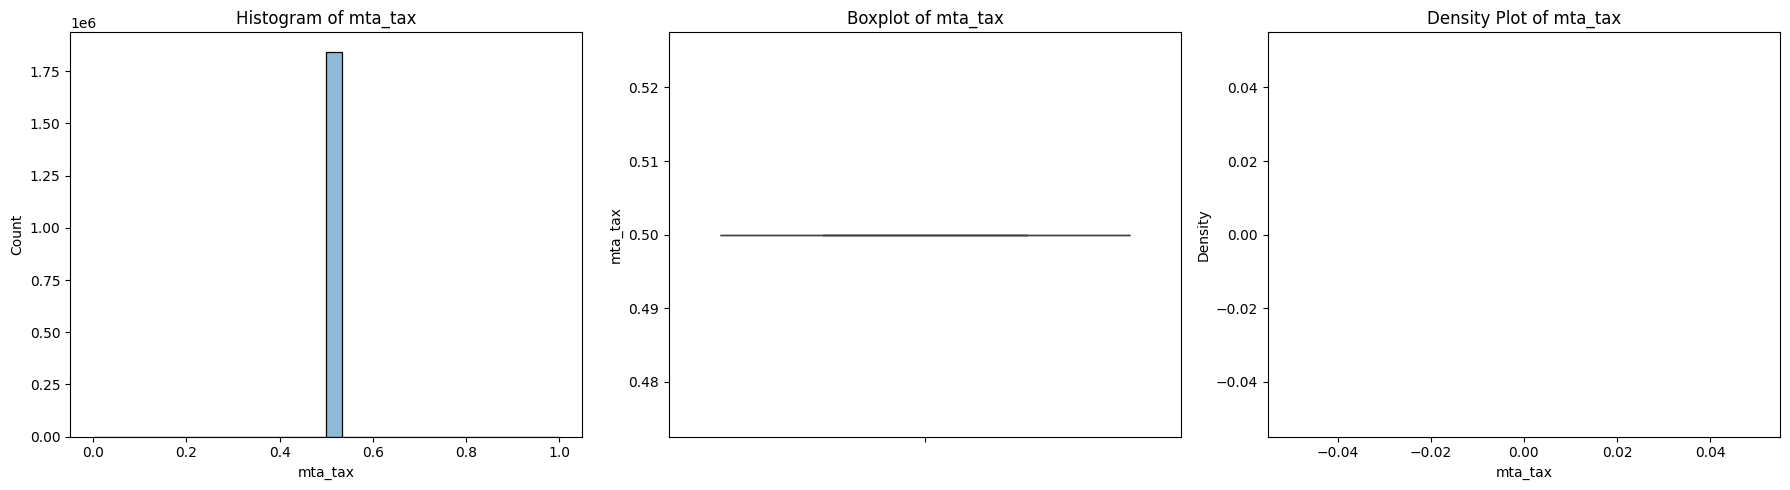

Plot saved to PDF!


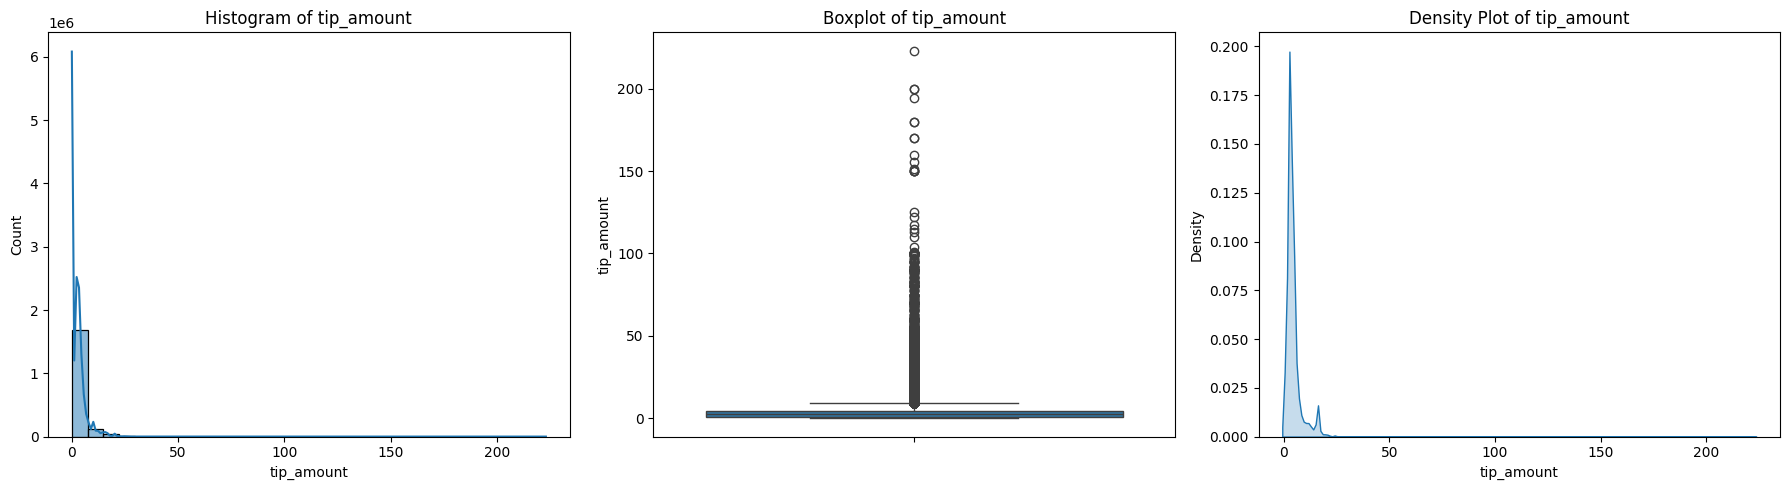

Plot saved to PDF!


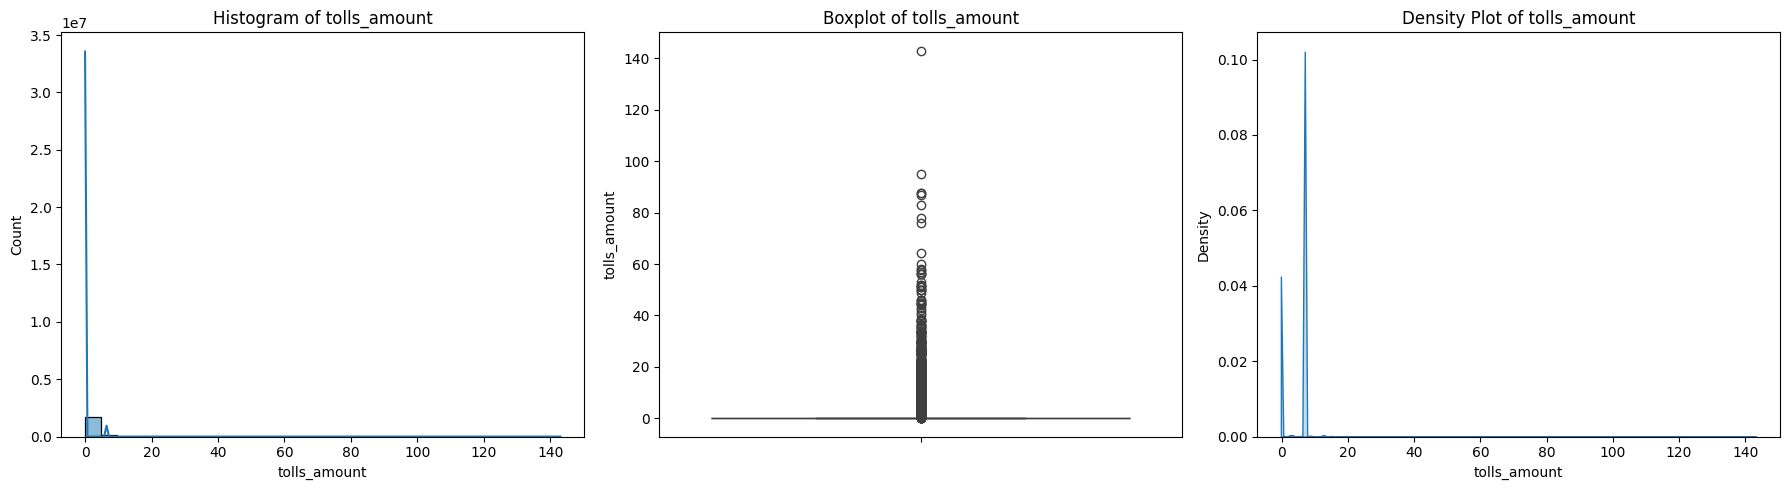

Plot saved to PDF!


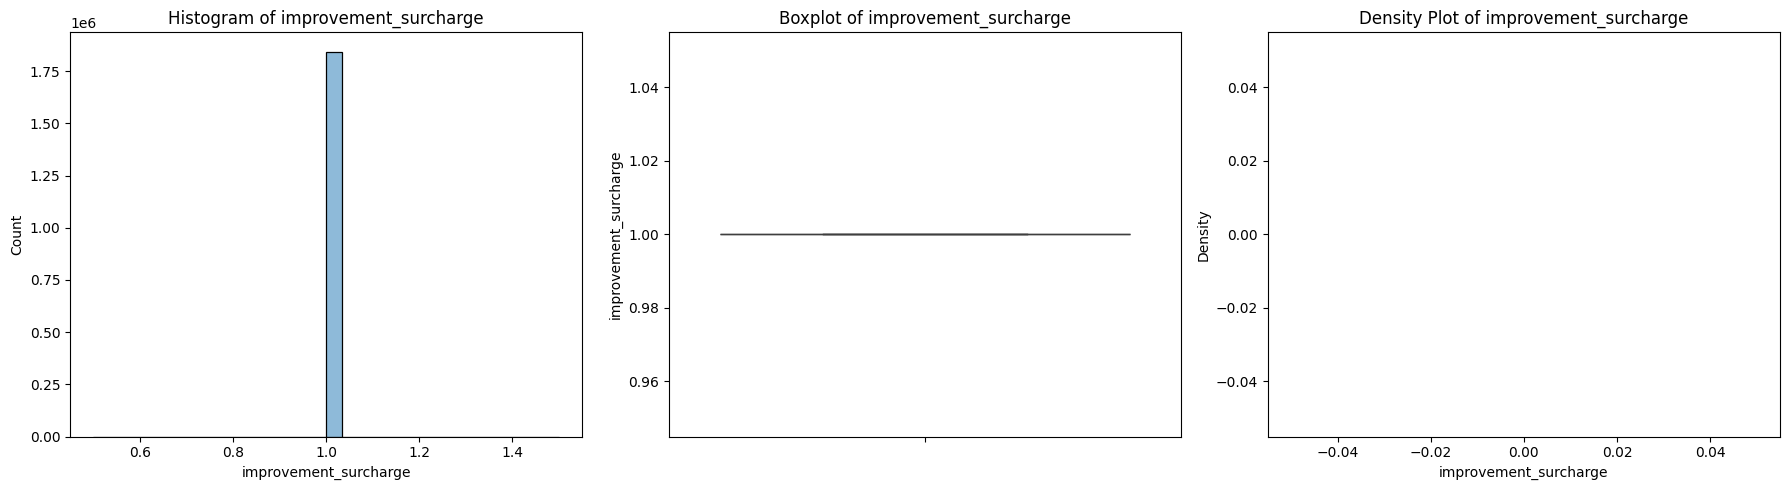

Plot saved to PDF!


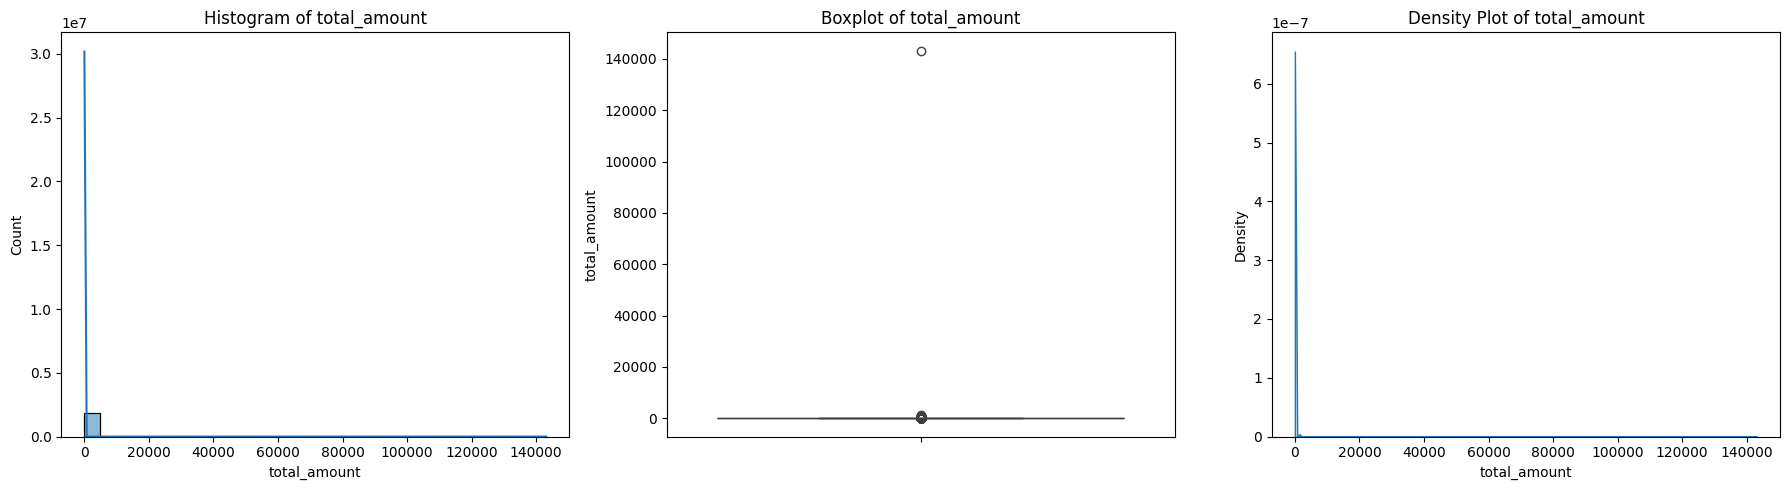

Plot saved to PDF!


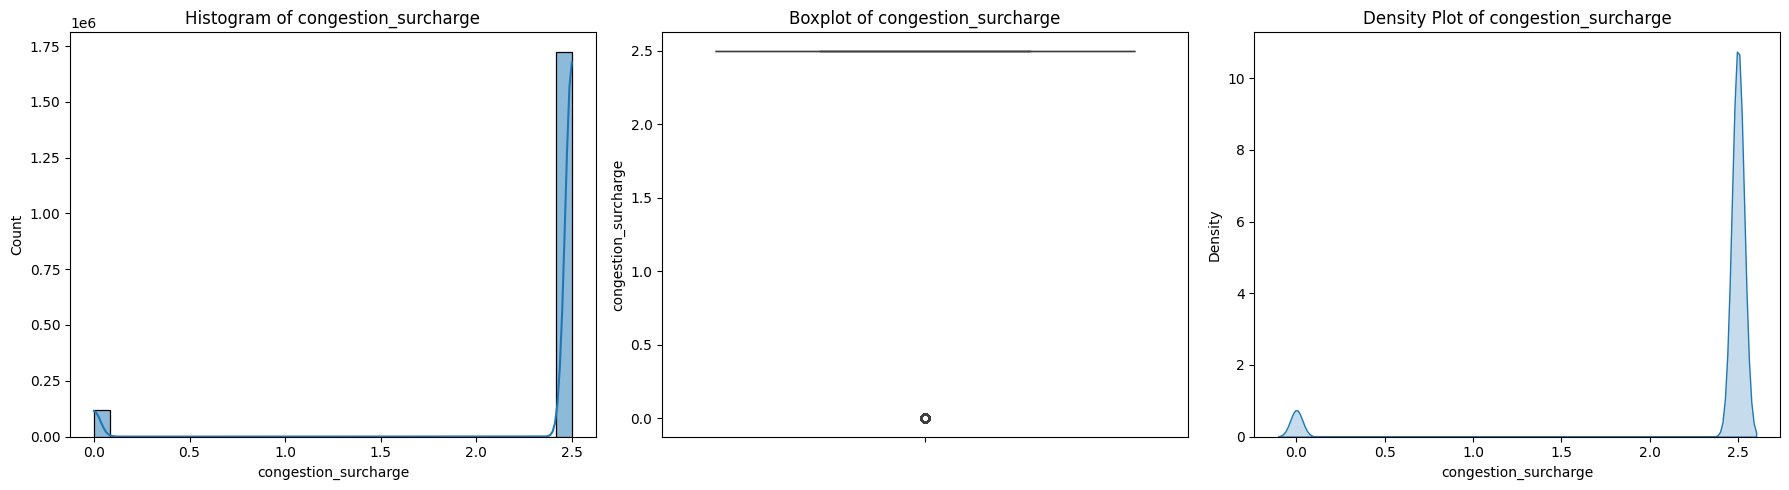

Plot saved to PDF!


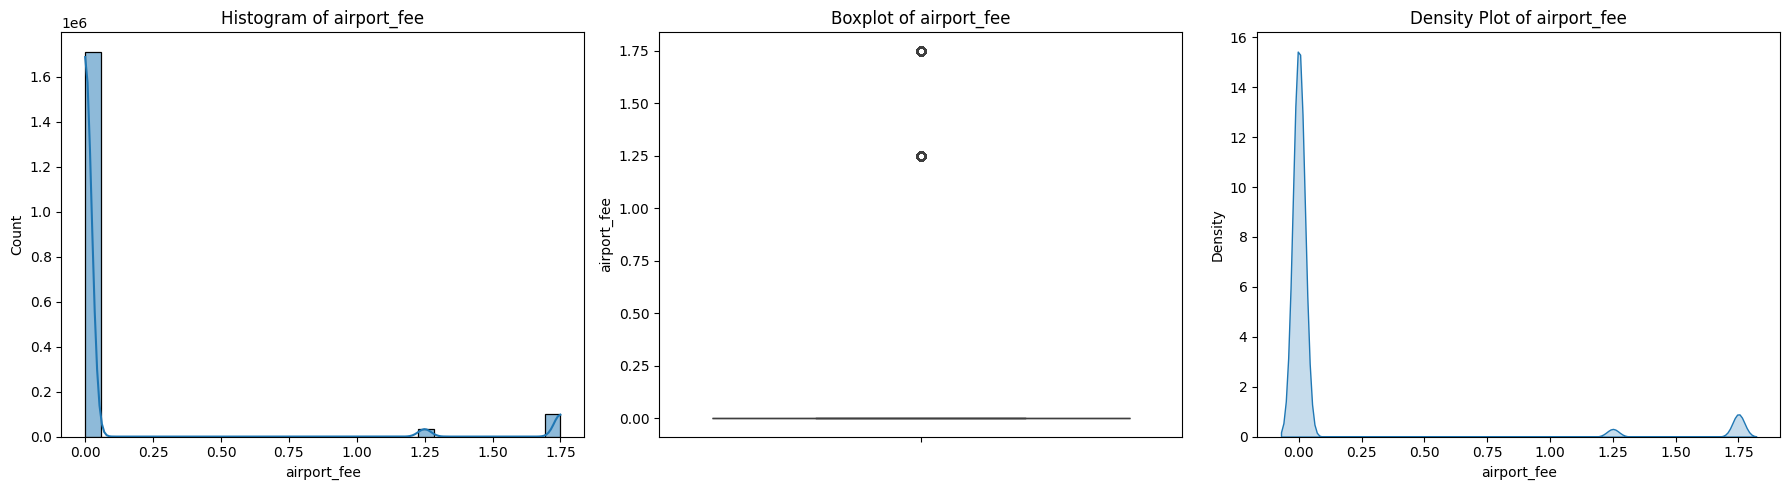

In [71]:
#show_selected_outliers(df_non_negative_drop_outlier, exclude_cols,draw_plot='N')
plot_numeric_columns(df_non_negative_drop_outlier)

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

In [72]:
df_non_negative_drop_outlier["payment_type"].value_counts()

payment_type
1    1449427
2     309038
0      63433
4      13036
3       8353
Name: count, dtype: int64

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

#### Check Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300

In [73]:
df_non_negative_drop_outlier[ (   (df_non_negative_drop_outlier["trip_distance"] == 0) &  (df_non_negative_drop_outlier["fare_amount"] > 300)   )]
df_non_negative_drop_outlier = df_non_negative_drop_outlier[~((df_non_negative_drop_outlier["trip_distance"] == 0) & (df_non_negative_drop_outlier["fare_amount"] > 300))]


#### Check Entries Where trip_distance and fare_amount are 0 but Pickup & Dropoff Zones are Different

In [74]:
df_non_negative_drop_outlier[ (   (df_non_negative_drop_outlier["trip_distance"] == 0) &  (df_non_negative_drop_outlier["fare_amount"] == 0)   & 
                                    (df_non_negative_drop_outlier["pulocationid"] != df_non_negative_drop_outlier["dolocationid"]) )]
df_non_negative_drop_outlier = df_non_negative_drop_outlier[ ~(   (df_non_negative_drop_outlier["trip_distance"] == 0) &  (df_non_negative_drop_outlier["fare_amount"] == 0)   & 
                                    (df_non_negative_drop_outlier["pulocationid"] != df_non_negative_drop_outlier["dolocationid"]) )]

#### Check Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

In [75]:
df_non_negative_drop_outlier["payment_type"].value_counts()

payment_type
1    1449425
2     309037
0      63433
4      13036
3       8353
Name: count, dtype: int64

In [76]:
# checking for no 3 = No charge and compare with 0 value with respect to total_amount and trip_distance and tip_amount
# as tip_amount is populated for credit card payment type
df_non_negative_drop_outlier [ ( (df_non_negative_drop_outlier["payment_type"] == 3) | (df_non_negative_drop_outlier["payment_type"] == 0) ) ][["payment_type","total_amount", "trip_distance" ,"tip_amount"]]

payment_type  total_amount  trip_distance  tip_amount
5                   0         35.57          19.24        5.93
16                  0         67.12          10.77       11.19
43                  0         29.38           4.52        0.00
44                  0         46.20           9.19        2.20
47                  0         25.85           2.74        3.37
...               ...           ...            ...         ...
1896356             0         38.02           0.00        0.00
1896369             0         25.50           0.00        0.00
1896376             0         25.28           3.50        0.00
1896387             0         19.68           0.00        0.00
1896388             3         22.70           2.80        0.00

[71786 rows x 4 columns]

#### based on the above result we can categorise into following brackets
1. trip_distance=0 and total_amount<> 0 then no meaning of payment_type.Impute payment_type = 4 (Dispute)
2. trip_distance<> 0 and total_amount<> 0 and tip_amount = 0 then Impute payment_type = 2 (Cash)
3. trip_distance<> 0 and total_amount<> 0 and tip_amount <> 0 then Impute payment_type = 1 (Credit card) from Mode()

#### Need to chek df_non_negative_drop_outlier["payment_type"].value_counts() value is not correct

In [77]:
# Condition 1: ( trip_distance = 0 and total_amount != 0) or (trip_distance != 0 and total_amount = 0) → Impute payment_type = 4 (Dispute)
df_non_negative_drop_outlier.loc[
    ((df_non_negative_drop_outlier["trip_distance"] == 0) & (df_non_negative_drop_outlier["total_amount"] != 0)) |
    ((df_non_negative_drop_outlier["trip_distance"] != 0) & (df_non_negative_drop_outlier["total_amount"] == 0)), 
    "payment_type"
] = 4

# Verify the changes
print(df_non_negative_drop_outlier["payment_type"].value_counts())

payment_type
1    1440975
2     303280
0      48893
4      43664
3       6472
Name: count, dtype: int64


In [78]:

# Condition 2: trip_distance ≠ 0 and total_amount != 0 and tip_amount = 0 → Impute payment_type = 2 (Cash)
df_non_negative_drop_outlier.loc[(df_non_negative_drop_outlier["trip_distance"] != 0) & 
                    (df_non_negative_drop_outlier["total_amount"] != 0) & 
                    (df_non_negative_drop_outlier["tip_amount"] == 0), "payment_type"] = 2


# Verify the changes
print(df_non_negative_drop_outlier["payment_type"].value_counts())

payment_type
1    1377069
2     396858
0      37568
4      31782
3          7
Name: count, dtype: int64


In [79]:
# Condition 3: trip_distance ≠ 0 and total_amount != 0 and tip_amount ≠ 0 → Impute payment_type = 1 (Credit Card)
df_non_negative_drop_outlier.loc[(df_non_negative_drop_outlier["trip_distance"] != 0) & 
                    (df_non_negative_drop_outlier["total_amount"] != 0) & 
                    (df_non_negative_drop_outlier["tip_amount"] != 0), "payment_type"] = 1

# Verify the changes
print(df_non_negative_drop_outlier["payment_type"].value_counts())

payment_type
1    1414682
2     396836
4      31766
Name: count, dtype: int64


In [80]:
#susom_break.head()

In [81]:
# check record for "payment_type" = 0
df_non_negative_drop_outlier [  (df_non_negative_drop_outlier["payment_type"] == 0)  ][["payment_type","total_amount", "trip_distance" ,"tip_amount"]]

Empty DataFrame
Columns: [payment_type, total_amount, trip_distance, tip_amount]
Index: []

In [82]:
# remove passenger_count > 6
df_non_negative_drop_outlier = df_non_negative_drop_outlier [~ (df_non_negative_drop_outlier["passenger_count"] > 6) ] 

In [83]:
# remove records for which total_amount=0 and trip_distance=0
df_non_negative_drop_outlier = df_non_negative_drop_outlier [~ ( (df_non_negative_drop_outlier["total_amount"] == 0) & (df_non_negative_drop_outlier["trip_distance"] == 0) ) ] 

In [84]:
# Continue with outlier handling

# checkand remove the records where total_amount=0 but trip_distance !=0 
df_non_negative_drop_outlier = df_non_negative_drop_outlier[ (df_non_negative_drop_outlier['total_amount'] != 0)  ]
df_non_negative_drop_outlier[ (df_non_negative_drop_outlier['total_amount'] == 0)  ][["payment_type","total_amount", "trip_distance" ,"tip_amount"]]


Empty DataFrame
Columns: [payment_type, total_amount, trip_distance, tip_amount]
Index: []

#### # Do any columns need standardising?
   Yes : Columns have different scales (e.g., trip_distance vs. fare_amount).

In [85]:
print(df_non_negative_drop_outlier['trip_distance'].value_counts())
print(df_non_negative_drop_outlier['total_amount'].value_counts())

trip_distance
0.00     31760
0.90     25743
1.00     25696
1.10     25387
0.80     25159
         ...  
41.02        1
69.23        1
29.75        1
39.60        1
39.18        1
Name: count, Length: 3596, dtype: int64
total_amount
16.80     27046
12.60     24584
21.00     22515
18.00     14342
15.96     14309
          ...  
101.82        1
176.34        1
116.27        1
141.89        1
164.63        1
Name: count, Length: 12440, dtype: int64


In [86]:
df_non_negative_drop_outlier["trip_duration"] = (df_non_negative_drop_outlier["tpep_dropoff_datetime"] - df_non_negative_drop_outlier["tpep_pickup_datetime"]).dt.total_seconds() / 60 

In [87]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for standardization
num_cols_to_standardize = [
    "trip_distance", "trip_duration", "fare_amount", "extra", "mta_tax",
    "tip_amount", "tolls_amount", "improvement_surcharge", 
    "total_amount", "congestion_surcharge", "airport_fee"
]

# Initialize scaler
scaler = StandardScaler()

# Apply standardization
df_non_negative_drop_outlier[num_cols_to_standardize] = scaler.fit_transform(df_non_negative_drop_outlier[num_cols_to_standardize])

# Check summary after standardization
df_non_negative_drop_outlier.describe()

vendorid        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.843270e+06                     1843270                     1843270   
mean   1.738960e+00  2023-07-02 16:17:00.406611  2023-07-02 16:34:01.752929   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 10:34:10  2023-04-02 10:46:00.250000   
50%    2.000000e+00         2023-06-27 11:45:31  2023-06-27 12:03:30.500000   
75%    2.000000e+00  2023-10-06 19:33:38.500000  2023-10-06 19:47:53.750000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.392020e-01                         NaN                         NaN   

       passenger_count  trip_distance    ratecodeid  pulocationid  \
count     1.843270e+06   1.843270e+06  1.843270e+06  1.843270e+06   
mean      1.370734e+00  -2.065297e-18  1.598742e+00  1.657679e+02   
min       1.000000e+00  -2.800244e-02  1.000000e+00  1.000000e+00   
25%       1.000000e+00  -2.006450e-02  1.000000e+00  1.320000e+02   
50%       1.000000e+00  -1.464532e-02  1.000000e+00  1.620000e+02   
75%       1.000000e+00  -3.501665e-03  1.000000e+00  2.340000e+02   
max       6.000000e+00   9.644360e+02  9.900000e+01  2.650000e+02   
std       8.646195e-01   1.000000e+00  7.346782e+00  6.424287e+01   

       dolocationid  payment_type   fare_amount  ...    mta_tax    tip_amount  \
count  1.843270e+06  1.843270e+06  1.843270e+06  ...  1843270.0  1.843270e+06   
mean   1.646060e+02  1.266979e+00 -5.849518e-17  ...        0.0  1.579068e-17   
min    1.000000e+00  1.000000e+00 -1.770806e-01  ...        0.0 -9.066733e-01   
25%    1.140000e+02  1.000000e+00 -8.990879e-02  ...        0.0 -6.385085e-01   
50%    1.620000e+02  1.000000e+00 -5.054090e-02  ...        0.0 -1.558119e-01   
75%    2.340000e+02  1.000000e+00  2.163356e-02  ...        0.0  2.464353e-01   
max    2.650000e+02  4.000000e+00  1.341738e+03  ...        0.0  5.891553e+01   
std    6.932775e+01  5.468848e-01  1.000000e+00  ...        0.0  1.000000e+00   

       tolls_amount  improvement_surcharge  total_amount  \
count  1.843270e+06              1843270.0  1.843270e+06   
mean   4.830058e-18                    0.0  7.937911e-17   
min   -2.578917e-01                    0.0 -2.427480e-01   
25%   -2.578917e-01                    0.0 -1.081551e-01   
50%   -2.578917e-01                    0.0 -6.204881e-02   
75%   -2.578917e-01                    0.0  2.047672e-02   
max    8.159045e+01                    0.0  1.333261e+03   
std    1.000000e+00                    0.0  1.000000e+00   

       congestion_surcharge                        date          hour  \
count          1.843270e+06                     1843270  1.843270e+06   
mean          -6.817204e-17  2023-07-02 01:31:41.556689  1.425389e+01   
min           -3.820016e+00         2022-12-31 00:00:00  0.000000e+00   
25%            2.617790e-01         2023-04-02 00:00:00  1.100000e+01   
50%            2.617790e-01         2023-06-27 00:00:00  1.500000e+01   
75%            2.617790e-01         2023-10-06 00:00:00  1.900000e+01   
max            2.617790e-01         2023-12-31 00:00:00  2.300000e+01   
std            1.000000e+00                         NaN  5.825273e+00   

        airport_fee  trip_duration  
count  1.843270e+06   1.843270e+06  
mean   2.098309e-17  -8.873605e-17  
min   -2.753059e-01  -1.737303e+00  
25%   -2.753059e-01  -2.291098e-01  
50%   -2.753059e-01  -1.109714e-01  
75%   -2.753059e-01   7.455859e-02  
max    3.863509e+00   1.522246e+02  
std    1.000000e+00   1.000000e+00  

[8 rows x 21 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [88]:
df_non_negative_drop_outlier.columns.tolist()

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'store_and_fwd_flag',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'airport_fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

####

Numerical Variables (Continuous or Discrete Numeric Data) : These variables represent numerical values that can be measured or counted.

passenger_count       (Discrete)
trip_distance         (Continuous)
pickup_hour           (Discrete)
trip_duration         (Continuous)
fare_amount           (Continuous)
extra                 (Continuous)
mta_tax               (Continuous)
tip_amount            (Continuous)
tolls_amount          (Continuous)
improvement_surcharge (Continuous)
total_amount          (Continuous)
congestion_surcharge  (Continuous)
airport_fee           (Continuous)


Categorical Variables (Nominal or Ordinal Data): These variables represent categories or labels.

VendorID              (Nominal)
tpep_pickup_datetime  (Timestamp - Can be used for analysis but is categorical as a label)
tpep_dropoff_datetime (Timestamp - Can be used for analysis but is categorical as a label)
RatecodeID            (Ordinal - Coded categories representing different fare structures)
PULocationID          (Nominal - Represents a categorical pickup location ID)
DOLocationID          (Nominal - Represents a categorical drop location ID)
payment_type          (Nominal - Represents different payment methods)

Regarding Monetary Parameters : The following monetary parameters:
fare_amount   -> numerical
extra         -> numerical
mta_tax       -> categorical ??
tip_amount    -> numerical
tolls_amount  -> numerical
improvement_surcharge  -> categorical ??
total_amount  -> numerical
congestion_surcharge  -> numerical
airport_fee  -> categorical
are Numerical (Continuous) since they represent measured financial values.

In [89]:
# check the values for mta_tax, improvement_surcharge, airport_fee
print(df_non_negative_drop_outlier["airport_fee"].value_counts() )
print(df_non_negative_drop_outlier["improvement_surcharge"].value_counts() )
print(df_non_negative_drop_outlier["mta_tax"].value_counts() )

airport_fee
-0.275306    1711071
 3.863509      98640
 2.680990      33559
Name: count, dtype: int64
improvement_surcharge
0.0    1843270
Name: count, dtype: int64
mta_tax
0.0    1843270
Name: count, dtype: int64


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [90]:
print(df_non_negative_drop_outlier["payment_type"].value_counts())

payment_type
1    1414675
2     396835
4      31760
Name: count, dtype: int64


In [91]:
# Find and show the hourly trends in taxi pickups
df_non_negative_drop_outlier["pickup_day"] = df_non_negative_drop_outlier["tpep_pickup_datetime"].dt.day
df_non_negative_drop_outlier["pickup_month"] = df_non_negative_drop_outlier["tpep_pickup_datetime"].dt.month
df_non_negative_drop_outlier["pickup_year"] = df_non_negative_drop_outlier["tpep_pickup_datetime"].dt.year
#df_non_negative_drop_outlier["pickup_dayofweek"] = df_non_negative_drop_outlier["tpep_pickup_datetime"].dt.dayofweek
df_non_negative_drop_outlier["pickup_dayofweek"] = df_non_negative_drop_outlier["tpep_pickup_datetime"].dt.day_name()
df_non_negative_drop_outlier

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  ratecodeid store_and_fwd_flag  pulocationid  \
0            -0.021438         1.0                  N           141   
1             0.031074         1.0                  N           138   
2            -0.018538         1.0                  N           161   
3            -0.017011         1.0                  N           237   
4            -0.023881         1.0                  N           143   
...                ...         ...                ...           ...   
1896395      -0.021973         1.0                  N           231   
1896396      -0.024186         1.0                  N           158   
1896397      -0.019683         1.0                  N           161   
1896398       0.072748         1.0                  N           164   
1896399      -0.005333         1.0                  N           231   

         dolocationid  payment_type  ...  total_amount  congestion_surcharge  \
0                 140             1  ...     -0.130975              0.261779   
1                 256             2  ...      0.126568             -3.820016   
2                 237             1  ...     -0.112533              0.261779   
3                 141             2  ...     -0.103964              0.261779   
4                 142             2  ...     -0.149604              0.261779   
...               ...           ...  ...           ...                   ...   
1896395           231             1  ...     -0.111415              0.261779   
1896396            68             1  ...     -0.136098              0.261779   
1896397           162             1  ...     -0.096885              0.261779   
1896398            14             2  ...      0.300281              0.261779   
1896399            68             1  ...     -0.010820              0.261779   

              date  hour  airport_fee  trip_duration  pickup_day  \
0       2022-12-31    23    -0.275306      -0.302591          31   
1       2023-01-01     0     2.680990      -0.026123           1   
2       2023-01-01     0    -0.275306      -0.290818           1   
3       2023-01-01     0    -0.275306      -0.157658           1   
4       2023-01-01     0    -0.275306      -0.282698           1   
...            ...   ...          ...            ...         ...   
1896395 2023-09-30    23    -0.275306      -0.249814          30   
1896396 2023-09-30    23    -0.275306      -0.311523          30   
1896397 2023-09-30    23    -0.275306      -0.229110          30   
1896398 2023-09-30    23    -0.275306       0.500425          30   
1896399 2023-09-30    23    -0.275306      -0.078088          30   

         pickup_month pickup_year  pickup_dayofweek  
0                  12        2022          Saturday  
1                   1        2023            Sunday  
2                   1        2023            Sunday  
3                   1        2023            Sunday  
4                   1        2023            Sunday  
...               ...         ...               ...  
1896395             9      

In [92]:
#df_non_negative_drop_outlier.columns

In [93]:
import pandas as pd

def get_pickup_grouped_counts(df):
    # Group by pickup_month, pickup_day, and hour and count occurrences
    pickup_counts = df.groupby(["pickup_month", "pickup_day", "hour"]).size().reset_index(name="pickup_count")

    return pickup_counts

# **Run function on DataFrame**
grouped_pickup_counts = get_pickup_grouped_counts(df_non_negative_drop_outlier)

# **Print the first few rows of the table**
print(grouped_pickup_counts)


      pickup_month  pickup_day  hour  pickup_count
0                1           1     0           262
1                1           1     1           278
2                1           1     2           247
3                1           1     3           190
4                1           1     4           115
...            ...         ...   ...           ...
8754            12          31    19           254
8755            12          31    20           263
8756            12          31    21           256
8757            12          31    22           227
8758            12          31    23           182

[8759 rows x 4 columns]


In [94]:
### Univariate Analysis : Data Visualization

Plot saved to PDF!


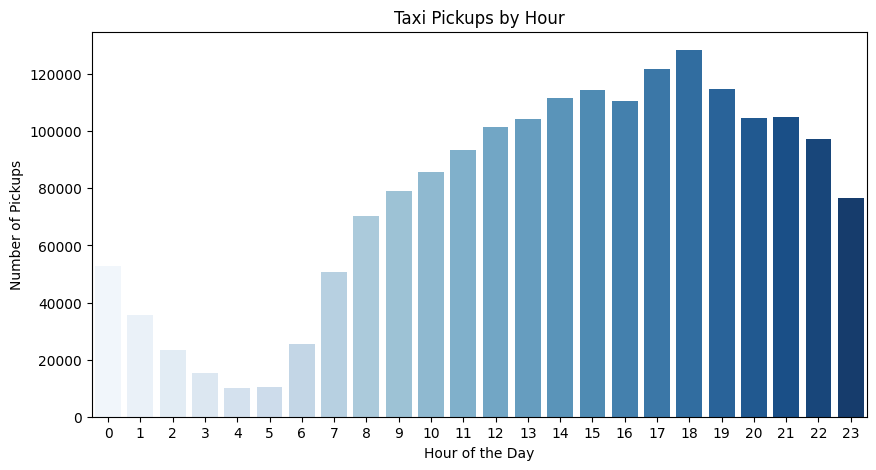

In [95]:
# Taxi Trends throughout the day
import matplotlib.pyplot as plt
import seaborn as sns

# Group by pickup hour and count
hourly_pickups = df_non_negative_drop_outlier["hour"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="Blues")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Hour")
plt.xticks(range(24))
save_plot_to_pdf()
plt.show()

Plot saved to PDF!


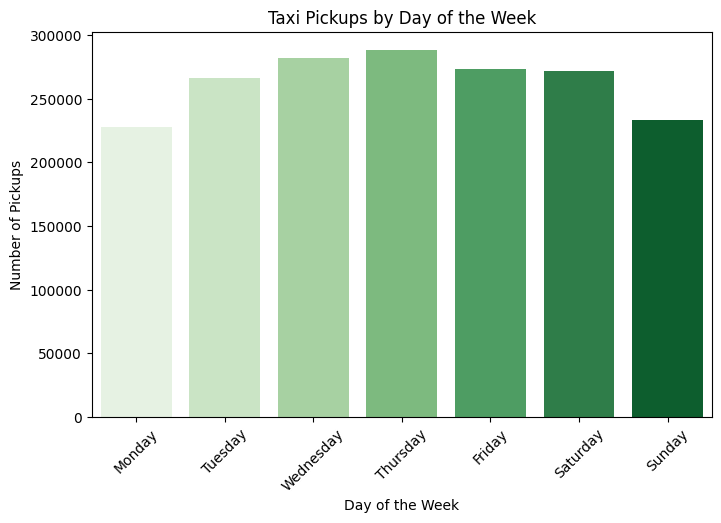

In [96]:
# Find and show the daily trends in taxi pickups (days of the week)

# Group by day of the week and count
daily_pickups = df_non_negative_drop_outlier["pickup_dayofweek"].value_counts()

# Order the days correctly
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_pickups = daily_pickups.reindex(order)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="Greens")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Day of the Week")
plt.xticks(rotation=45)
save_plot_to_pdf()
plt.show()

In [97]:
#df_non_negative_drop_outlier["pickup_month"].isnull().sum()
#df_non_negative_drop_outlier["pickup_month"].value_counts().sort_index()

Plot saved to PDF!


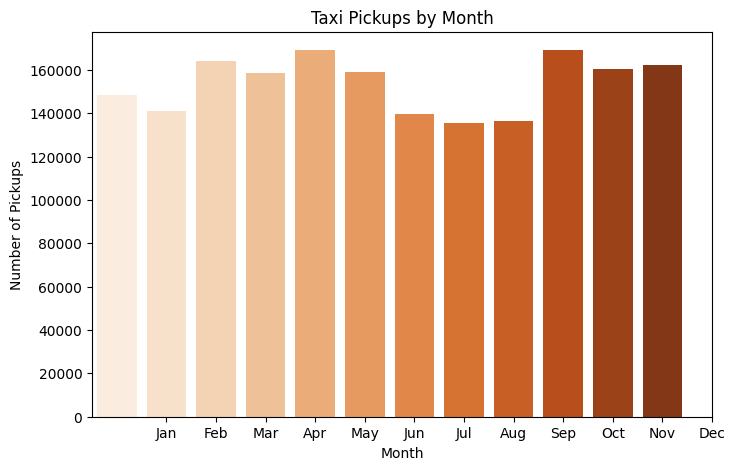

In [98]:
# Show the monthly trends in pickups

# Group by month and count
monthly_pickups = df_non_negative_drop_outlier["pickup_month"].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="Oranges")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Month")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
save_plot_to_pdf()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [99]:
# Analyse the above parameters
# Select financial and distance-related columns
columns_to_check = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero and negative values
for col in columns_to_check:
    zero_count = (df_non_negative_drop_outlier[col] == 0).sum()
    negative_count = (df_non_negative_drop_outlier[col] < 0).sum()
    
    print(f"{col}:")
    print(f"  Zero values: {zero_count}")
    print(f"  Negative values: {negative_count}")
    print("-" * 30)


fare_amount:
  Zero values: 0
  Negative values: 1284311
------------------------------
tip_amount:
  Zero values: 0
  Negative values: 1143079
------------------------------
total_amount:
  Zero values: 0
  Negative values: 1304872
------------------------------
trip_distance:
  Zero values: 0
  Negative values: 1447231
------------------------------


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [100]:
print(df_non_negative_drop_outlier["payment_type"].value_counts())

payment_type
1    1414675
2     396835
4      31760
Name: count, dtype: int64


In [101]:
# Define the conditions
# Define the conditions
def analyze_payment_types_wrt_trip(df):
    
    # Define conditions dynamically based on available numeric columns
    conditions = {
        "fare_amount = 0": df[df["fare_amount"] == 0]["payment_type"].value_counts(),
        "fare_amount > 0": df[df["fare_amount"] > 0]["payment_type"].value_counts(),
        "tip_amount = 0": df[df["tip_amount"] == 0]["payment_type"].value_counts(),
        "tip_amount > 0": df[df["tip_amount"] > 0]["payment_type"].value_counts(),
        "total_amount = 0": df[df["total_amount"] == 0]["payment_type"].value_counts(),
        "total_amount > 0": df[df["total_amount"] > 0]["payment_type"].value_counts(),
        "trip_distance = 0": df[df["trip_distance"] == 0]["payment_type"].value_counts(),
        "trip_distance > 0": df[df["trip_distance"] > 0]["payment_type"].value_counts()
    }
    
    # Convert the results into a DataFrame for better readability
    payment_type_counts = pd.DataFrame(conditions)

    # Fill NaN values with 0 (if some payment types are missing in specific conditions)
    payment_type_counts.fillna(0, inplace=True)

    return payment_type_counts

In [102]:
# check the payment type distribution across trips, fare on df_non_negative_drop_outlier
result_df = analyze_payment_types_wrt_trip(df_non_negative_drop_outlier)
result_df

fare_amount = 0  fare_amount > 0  tip_amount = 0  \
payment_type                                                     
1                         0.0           419458             0.0   
2                         0.0           127287             0.0   
4                         0.0            12214             0.0   

              tip_amount > 0  total_amount = 0  total_amount > 0  \
payment_type                                                       
1                   697085.0               0.0            431950   
2                        0.0               0.0             96785   
4                     3106.0               0.0              9663   

              trip_distance = 0  trip_distance > 0  
payment_type                                        
1                           0.0           299752.0  
2                           0.0            96287.0  
4                           0.0                0.0

#### Data Frame  df_clean

In [103]:
# Create a df with non zero entries for the selected parameters.
df_clean = df_non_negative_drop_outlier[
    (df_non_negative_drop_outlier["fare_amount"] >= 0) |
    (df_non_negative_drop_outlier["tip_amount"] >= 0) |  # Tip amount can be zero
    (df_non_negative_drop_outlier["total_amount"] >= 0) |
    (df_non_negative_drop_outlier["trip_distance"] >= 0)
].copy()

# Check the new shape
print(f"Original Shape: {df_non_negative_drop_outlier.shape}")
print(f"Cleaned Shape: {df_clean.shape}")


Original Shape: (1843270, 26)
Cleaned Shape: (895831, 26)


In [104]:
# check the payment type distribution across trips, fare on df_clean
result_df = analyze_payment_types_wrt_trip(df_clean)
result_df

fare_amount = 0  fare_amount > 0  tip_amount = 0  \
payment_type                                                     
1                         0.0           419458             0.0   
2                         0.0           127287             0.0   
4                         0.0            12214             0.0   

              tip_amount > 0  total_amount = 0  total_amount > 0  \
payment_type                                                       
1                   697085.0               0.0            431950   
2                        0.0               0.0             96785   
4                     3106.0               0.0              9663   

              trip_distance = 0  trip_distance > 0  
payment_type                                        
1                           0.0           299752.0  
2                           0.0            96287.0  
4                           0.0                0.0

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [105]:
#print(df_clean["payment_type"].value_counts())

#### ppayment type with respect to tip amount, trip distance, total amount , fare amount

    Month  Total_Revenue
0       1    6999.124505
1       2    6425.152040
2       3    8248.928938
3       4    8550.078175
4       5    9508.809527
5       6    8966.579337
6       7    7897.879453
7       8    7646.089235
8       9    9597.377680
9      10    9708.324867
10     11    8685.909206
11     12    8749.820276
Plot saved to PDF!


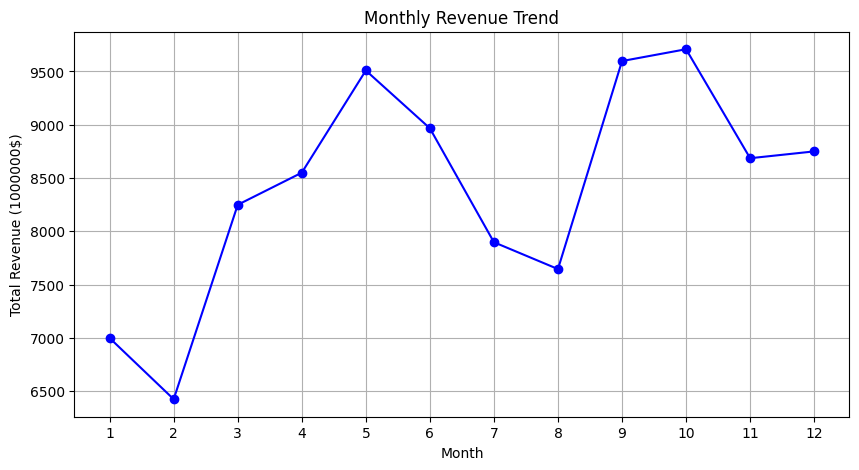

In [106]:
# Group data by month and analyse monthly revenue

# Extract month from datetime
df_clean["month"] = df_clean["tpep_pickup_datetime"].dt.month

# Group by month and sum total revenue
monthly_revenue = df_clean.groupby("month")["total_amount"].sum().reset_index()

# Rename the df columns
monthly_revenue.columns = ["Month", "Total_Revenue"]

# Display the trend
print(monthly_revenue)

# Plot the monthly revenue trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue["Month"], monthly_revenue["Total_Revenue"], marker='o', linestyle='-', color='b')
plt.xlabel("Month")
plt.ylabel("Total Revenue (1000000$)")
plt.title("Monthly Revenue Trend")
plt.xticks(range(1, 13))  # Ensure x-axis has months 1-12
plt.grid(True)
save_plot_to_pdf()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [107]:
#print(df_clean["payment_type"].value_counts())

In [108]:
# Example Usage:
#result_df = analyze_payment_types_wrt_trip(df_clean)
#result_df

   Quarter  Total_Revenue  Proportion
0        1   21673.205483   21.462004
1        2   27025.467039   26.762108
2        3   25141.346368   24.896348
3        4   27144.054349   26.879540
Plot saved to PDF!


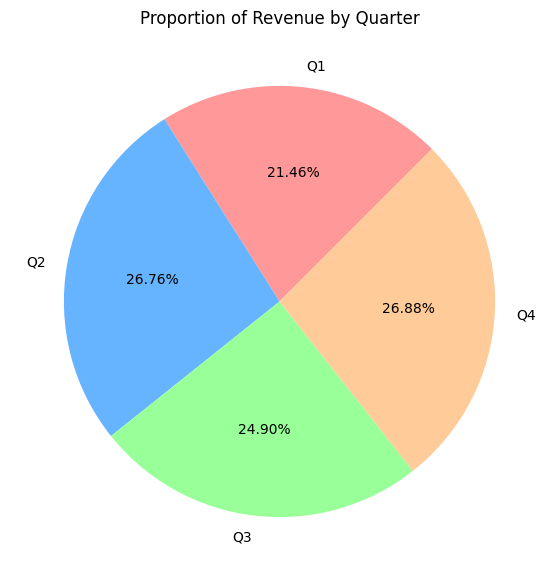

In [109]:
# Calculate proportion of each quarter

import matplotlib.pyplot as plt

# Extract quarter from datetime
df_clean["quarter"] = df_clean["tpep_pickup_datetime"].dt.quarter

# Group by quarter and sum total revenue
quarterly_revenue = df_clean.groupby("quarter")["total_amount"].sum().reset_index()

# Calculate proportion
quarterly_revenue["Proportion"] = (quarterly_revenue["total_amount"] / quarterly_revenue["total_amount"].sum()) * 100

# Rename for clarity
quarterly_revenue.columns = ["Quarter", "Total_Revenue", "Proportion"]

# Display data
print(quarterly_revenue)

# Plot the proportion of each quarter's revenue
plt.figure(figsize=(7, 7))
plt.pie(
    quarterly_revenue["Proportion"], 
    labels=["Q1", "Q2", "Q3", "Q4"], 
    autopct="%1.2f%%",                                   # taking 2 decimal places
    colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"], 
    #colors = ["red", "blue", "green", "orange"],
    startangle=45
)
plt.title("Proportion of Revenue by Quarter")
save_plot_to_pdf()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

#### DF = df_filtered

In [110]:
#df_clean.shape

#### Remove trips with zero or negative tip amounts and trip distances

In [111]:
# Filter the dataframe based on conditions
df_filtered = df_clean[(df_clean["trip_distance"] > 0) | (df_clean["trip_duration"] >= 0)]

In [112]:
#df_filtered.shape

In [113]:
#print(df_filtered["payment_type"].value_counts())

In [114]:
# Example Usage:
result_df = analyze_payment_types_wrt_trip(df_filtered)
result_df

fare_amount = 0  fare_amount > 0  tip_amount = 0  \
payment_type                                                     
1                         0.0           413936             0.0   
2                         0.0           124288             0.0   
4                         0.0             8225             0.0   

              tip_amount > 0  total_amount = 0  total_amount > 0  \
payment_type                                                       
1                   424352.0               0.0            417155   
2                        0.0               0.0             95266   
4                     1264.0               0.0              6656   

              trip_distance = 0  trip_distance > 0  
payment_type                                        
1                           0.0           299752.0  
2                           0.0            96287.0  
4                           0.0                0.0

Show how trip fare is affected by distance

Plot saved to PDF!


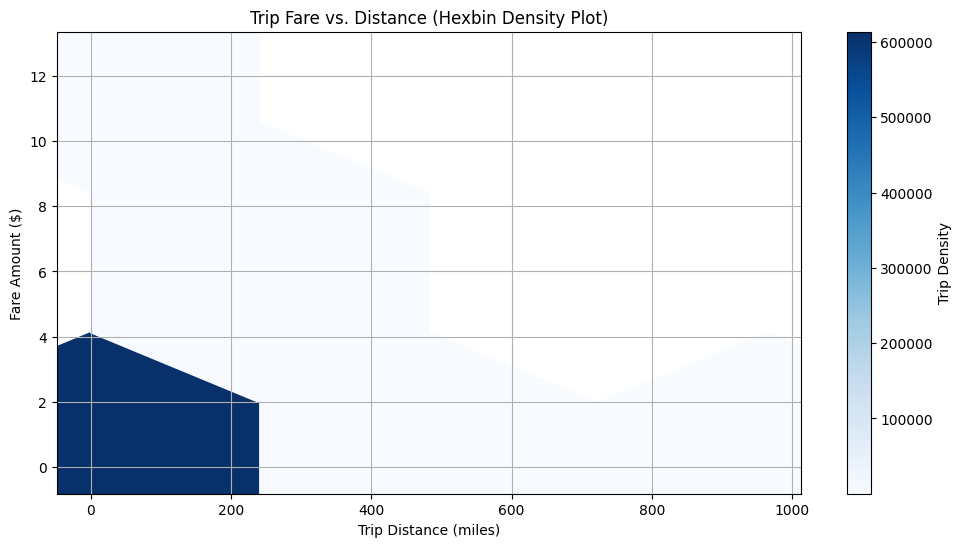

Plot saved to PDF!


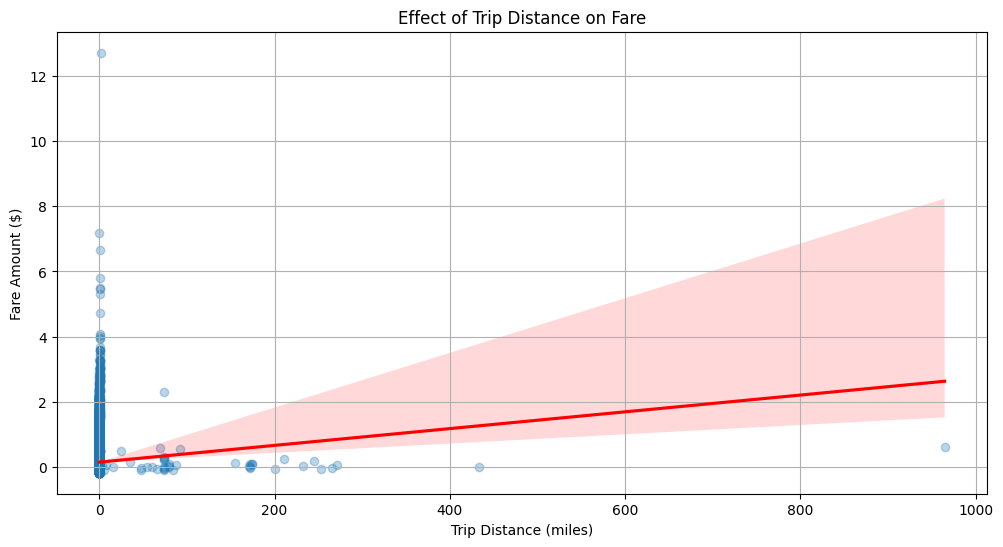

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fare_vs_distance(df, hexbin_gridsize=50):
    plt.figure(figsize=(12, 6))

    # Hexbin plot (density-based heatmap)
    plt.hexbin(df["trip_distance"], df["fare_amount"], gridsize=hexbin_gridsize, cmap="Blues", mincnt=1)
    plt.colorbar(label="Trip Density")
    plt.xlabel("Trip Distance (miles)")
    plt.ylabel("Fare Amount ($)")
    plt.title("Trip Fare vs. Distance (Hexbin Density Plot)")
    plt.grid(True)

    save_plot_to_pdf()  # Save to PDF
    plt.show()

    # Scatter plot with regression line
    plt.figure(figsize=(12, 6))
    sns.regplot(x=df["trip_distance"], y=df["fare_amount"], scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
    plt.xlabel("Trip Distance (miles)")
    plt.ylabel("Fare Amount ($)")
    plt.title("Effect of Trip Distance on Fare")
    plt.grid(True)

    save_plot_to_pdf()  # Save to PDF
    plt.show()

# Call function with df_filtered
plot_fare_vs_distance(df_filtered, hexbin_gridsize=2)



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

#### Bivariate Analysis

##### Derive trip_duration

In [116]:
df_filtered["trip_duration"] = (df_filtered["tpep_dropoff_datetime"] - df_filtered["tpep_pickup_datetime"]).dt.total_seconds() / 60

#### Remove trips with zero or negative tip amounts and trip distances

In [117]:
#df_filtered = df_filtered[(df_filtered["trip_distance"] >= 0) & (df_filtered["tip_amount"] >= 0)]
#df_filtered = df_filtered[df_filtered["trip_duration"] > 0]
#df_filtered = df_filtered[df_filtered["fare_amount"] > 0]

In [118]:
#print(df_filtered["payment_type"].value_counts())

#### Visualisation
     1. fare_amount and trip duration (pickup time to dropoff time)
     2. fare_amount and passenger_count
     3. tip_amount and trip_distance


Analyzing relationship between 'trip_duration' and 'fare_amount'
Correlation between trip_duration and fare_amount: 0.21
Plot saved to PDF!


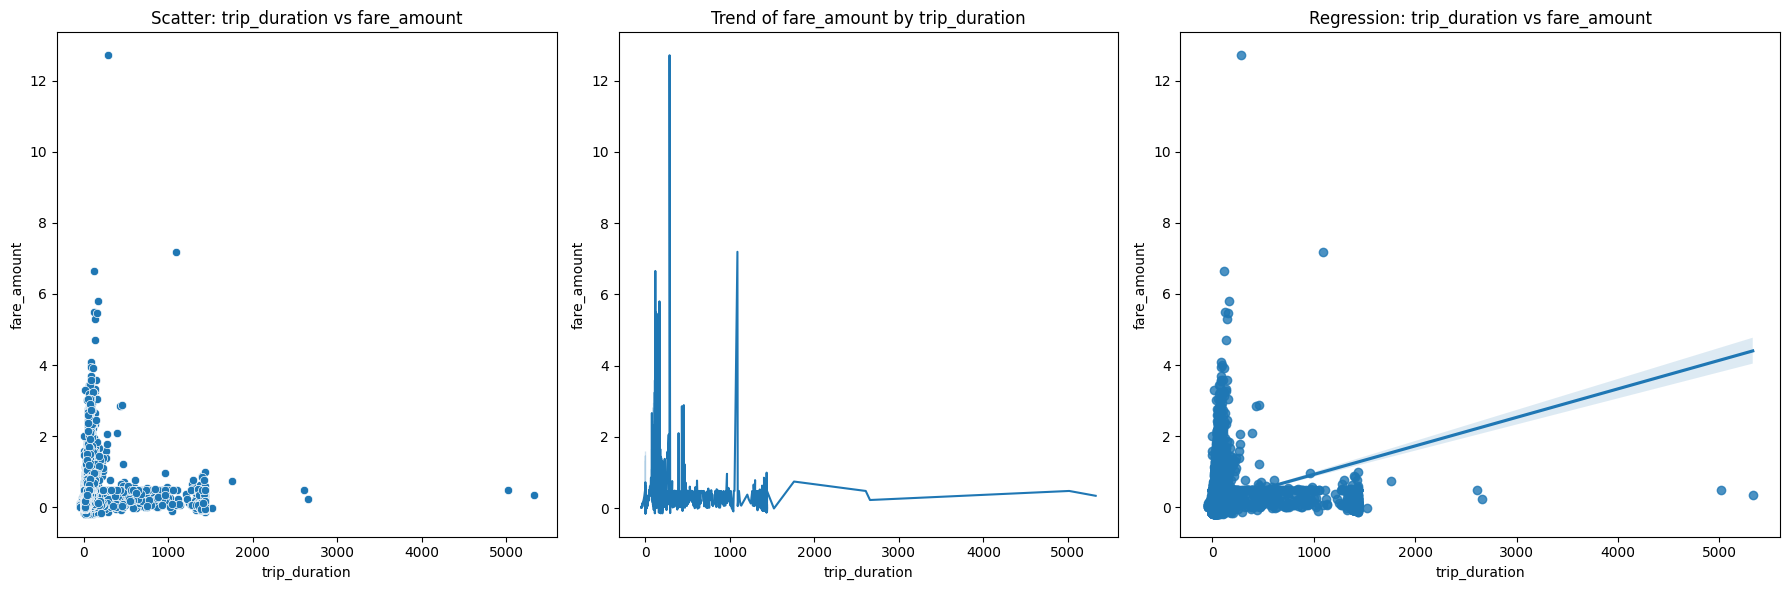


Analyzing relationship between 'fare_amount' and 'passenger_count'
Correlation between fare_amount and passenger_count: 0.05
Plot saved to PDF!


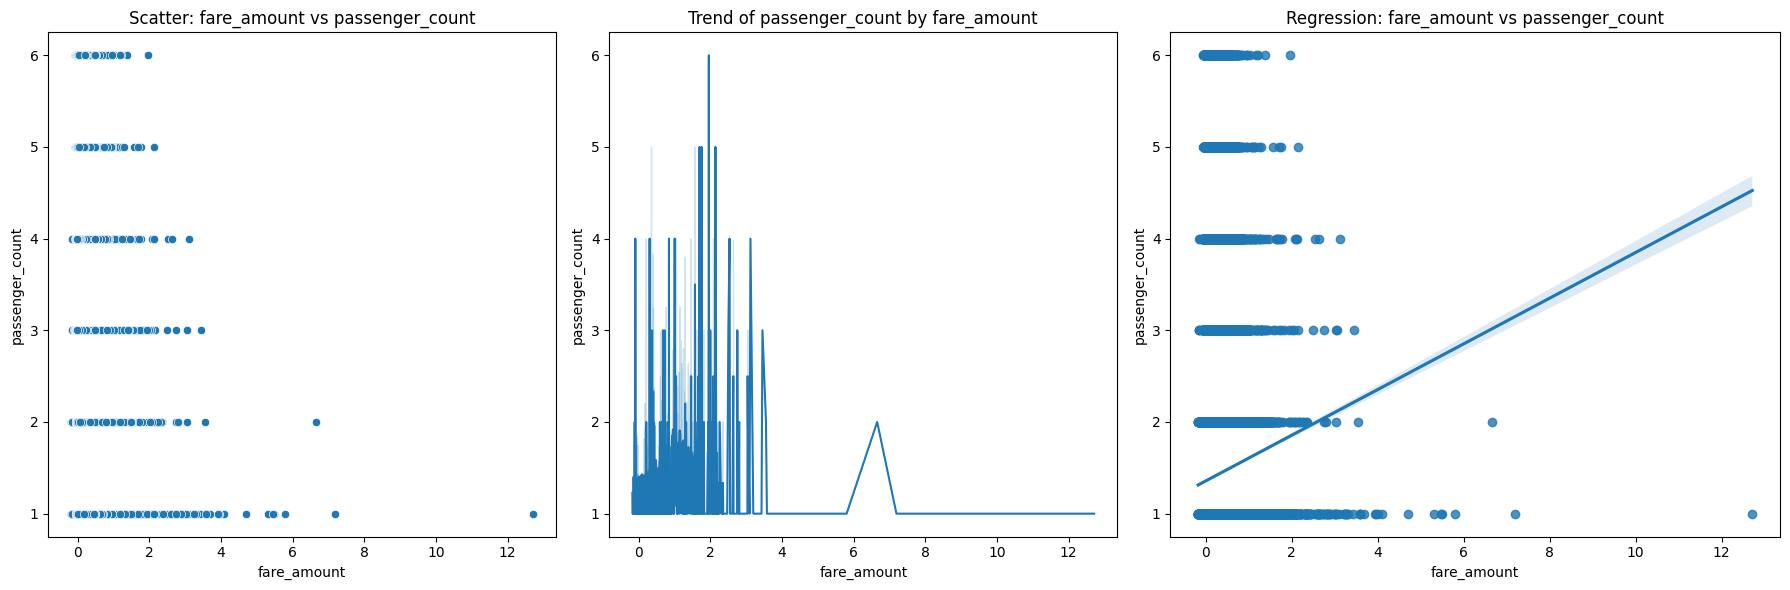


Analyzing relationship between 'tip_amount' and 'trip_distance'
Correlation between tip_amount and trip_distance: 0.01
Plot saved to PDF!


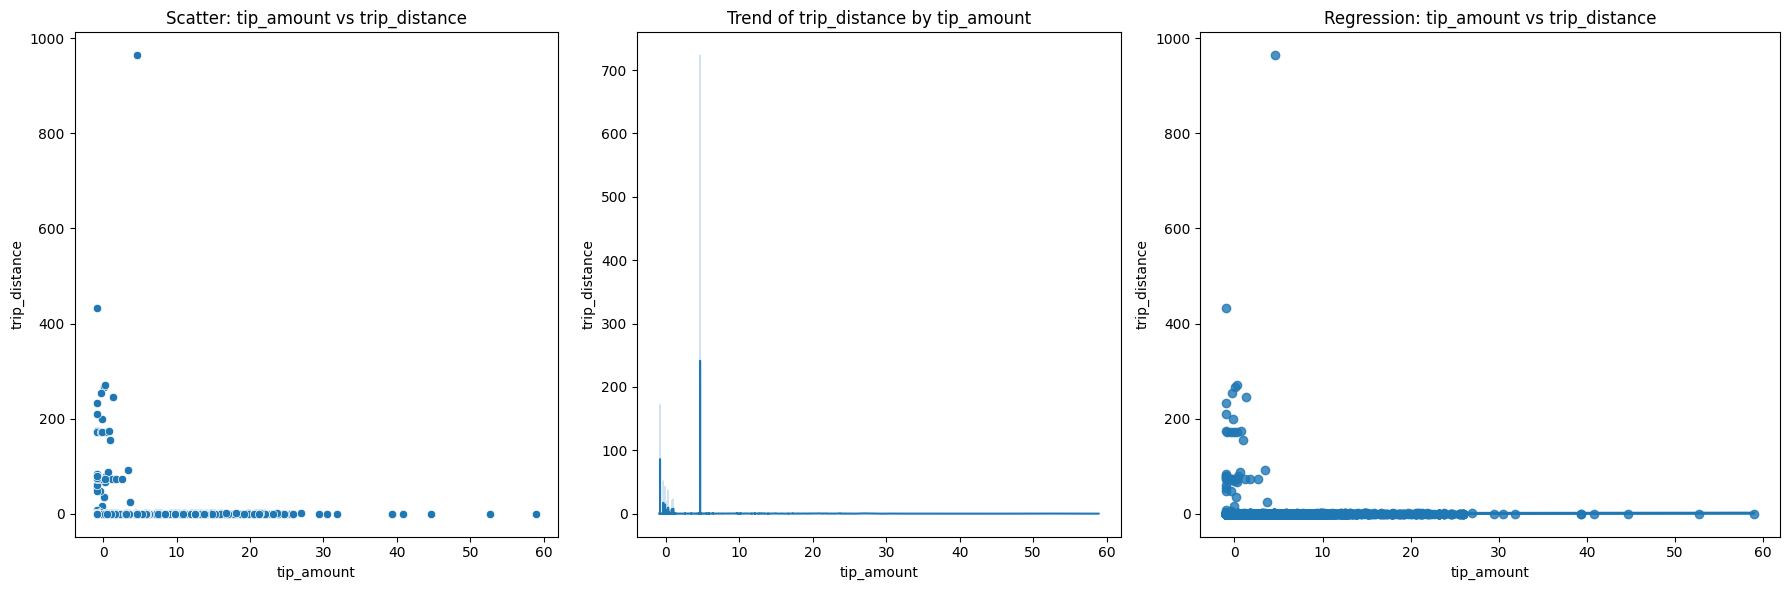

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_relationships(df, column_pairs, draw_plot='Y'):
    
    for x_col, y_col in column_pairs:
        print(f"\nAnalyzing relationship between '{x_col}' and '{y_col}'")

        # Calculate correlation
        correlation = df[x_col].corr(df[y_col])
        print(f"Correlation between {x_col} and {y_col}: {correlation:.2f}")
        
        if draw_plot == 'Y':
            fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1.2]})
            
            # Scatter Plot
            sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[0])
            axes[0].set_title(f'Scatter: {x_col} vs {y_col}')
            
            # Line Plot
            sns.lineplot(data=df, x=x_col, y=y_col, ax=axes[1])
            axes[1].set_title(f'Trend of {y_col} by {x_col}')
            
            # Regression Plot
            sns.regplot(data=df, x=x_col, y=y_col, ax=axes[2])
            axes[2].set_title(f'Regression: {x_col} vs {y_col}')
            
            plt.tight_layout()

            save_plot_to_pdf()
            plt.show()

# Define column pairs for bivariate analysis
column_pairs = [("trip_duration", "fare_amount"), 
                ("fare_amount", "passenger_count"), 
                ("tip_amount", "trip_distance")]

# Run function with plotting
plot_relationships(df_filtered, column_pairs, draw_plot='Y')


#### 2. `fare_amount` and `passenger_count`

Plot saved to PDF!


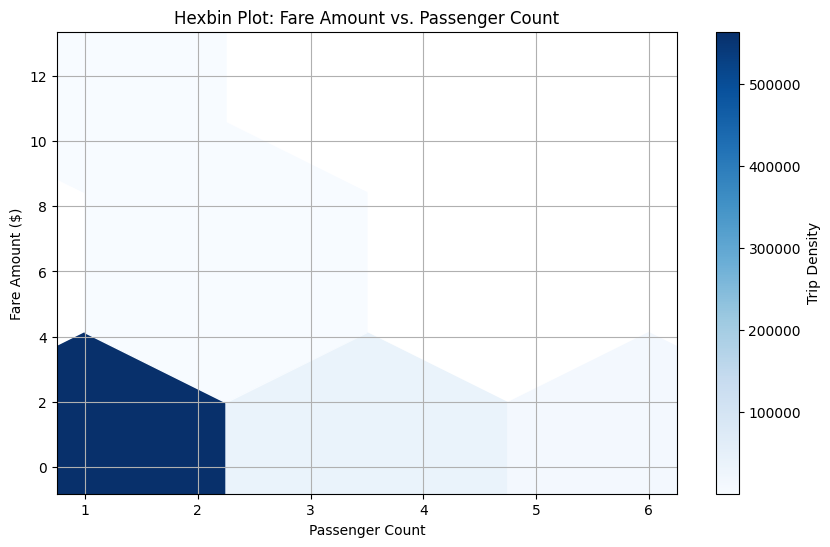

Plot saved to PDF!


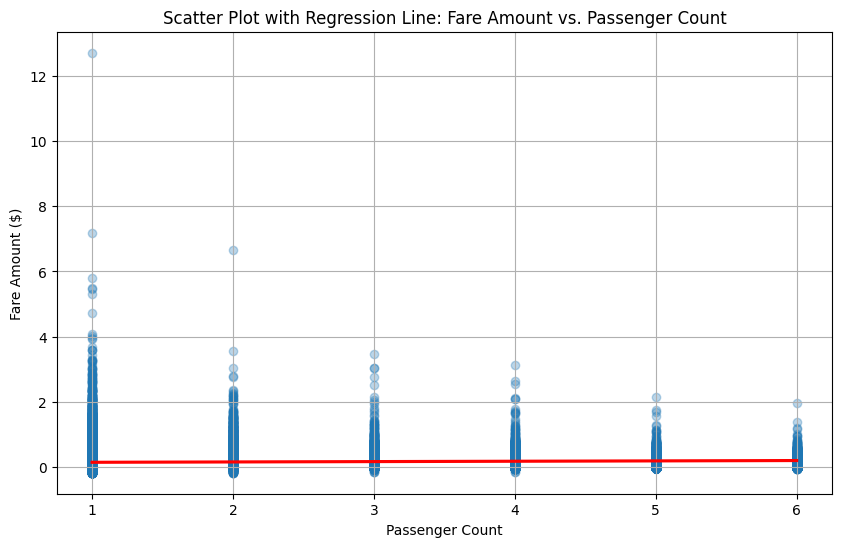

In [123]:
# Show relationship between fare and number of passengers

import seaborn as sns
import matplotlib.pyplot as plt
'''
# Box plot to show distribution of fares per passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x="passenger_count", y="fare_amount")

# Titles and labels
plt.title("Relationship Between Fare Amount and Number of Passengers", fontsize=14)
plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Fare Amount (USD)", fontsize=12)
plt.ylim(0, df_filtered["fare_amount"].quantile(0.99))  # Removing extreme outliers

save_plot_to_pdf()
plt.show()
'''

def plot_fare_vs_passenger_count(df):
    plt.figure(figsize=(10, 6))
    
    # Hexbin plot
    plt.hexbin(df["passenger_count"], df["fare_amount"], gridsize=2, cmap="Blues", mincnt=1)
    plt.colorbar(label="Trip Density")
    plt.xlabel("Passenger Count")
    plt.ylabel("Fare Amount ($)")
    plt.title("Hexbin Plot: Fare Amount vs. Passenger Count")
    plt.grid(True)
    
    save_plot_to_pdf()
    plt.show()

    plt.figure(figsize=(10, 6))

    # Scatter plot with regression line
    sns.regplot(x=df["passenger_count"], y=df["fare_amount"], scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
    
    plt.xlabel("Passenger Count")
    plt.ylabel("Fare Amount ($)")
    plt.title("Scatter Plot with Regression Line: Fare Amount vs. Passenger Count")
    plt.grid(True)
    
    save_plot_to_pdf()
    plt.show()

# Apply function to df_filtered
plot_fare_vs_passenger_count(df_filtered)


#### 3. tip_amount and trip_distance

Plot saved to PDF!


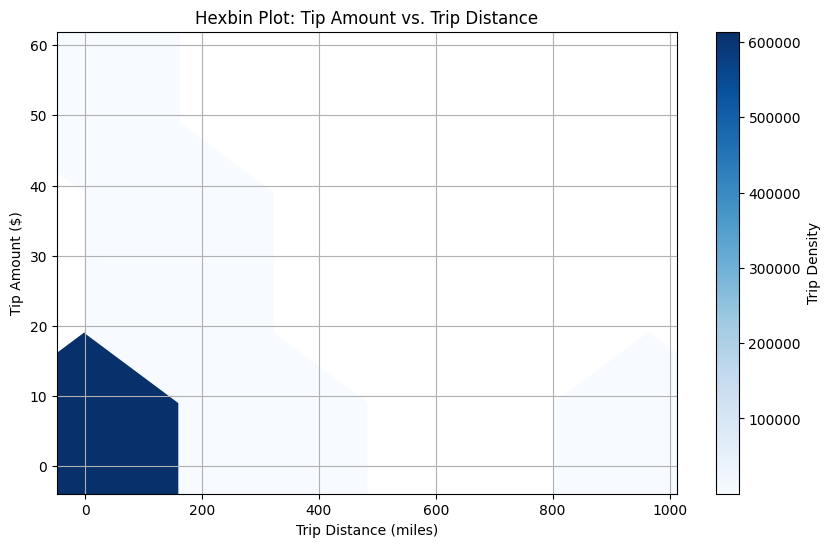

Plot saved to PDF!


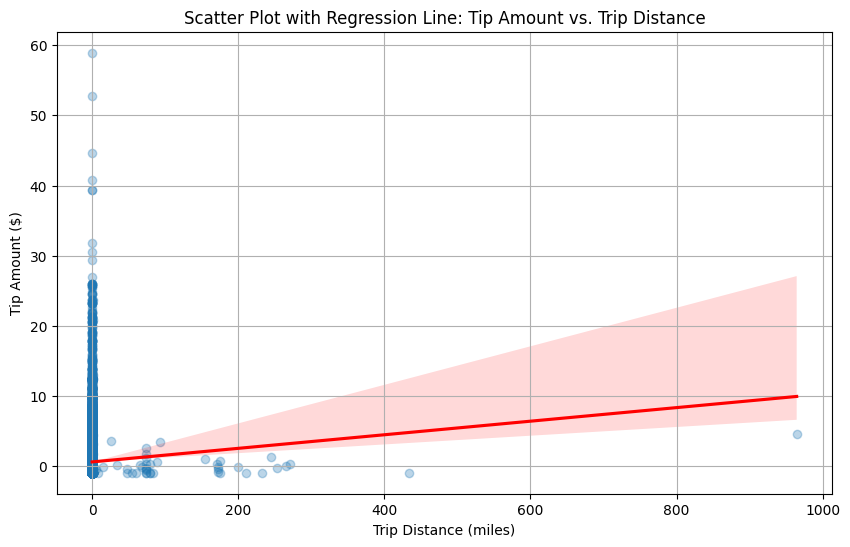

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tip_vs_trip_distance(df):
    plt.figure(figsize=(10, 6))
    
    # Hexbin plot
    plt.hexbin(df["trip_distance"], df["tip_amount"], gridsize=3, cmap="Blues", mincnt=1)
    plt.colorbar(label="Trip Density")
    plt.xlabel("Trip Distance (miles)")
    plt.ylabel("Tip Amount ($)")
    plt.title("Hexbin Plot: Tip Amount vs. Trip Distance")
    plt.grid(True)
    
    save_plot_to_pdf()
    plt.show()

    plt.figure(figsize=(10, 6))

    # Scatter plot with regression line
    sns.regplot(x=df["trip_distance"], y=df["tip_amount"], scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
    
    plt.xlabel("Trip Distance (miles)")
    plt.ylabel("Tip Amount ($)")
    plt.title("Scatter Plot with Regression Line: Tip Amount vs. Trip Distance")
    plt.grid(True)
    
    save_plot_to_pdf()
    plt.show()

# Apply function to df_filtered
plot_tip_vs_trip_distance(df_filtered)


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

#### Count and Percentage of Each Payment Type

In [126]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df_filtered["payment_type"].value_counts()
payment_percentages = df_filtered["payment_type"].value_counts(normalize=True) * 100

print("Payment Type Distribution:")
print(pd.DataFrame({"Count": payment_counts, "Percentage": payment_percentages.round(2)}))


Payment Type Distribution:
               Count  Percentage
payment_type                    
1             478565       77.97
2             126543       20.62
4               8660        1.41


#### Bar Plot of Payment Type Distribution

Plot saved to PDF!


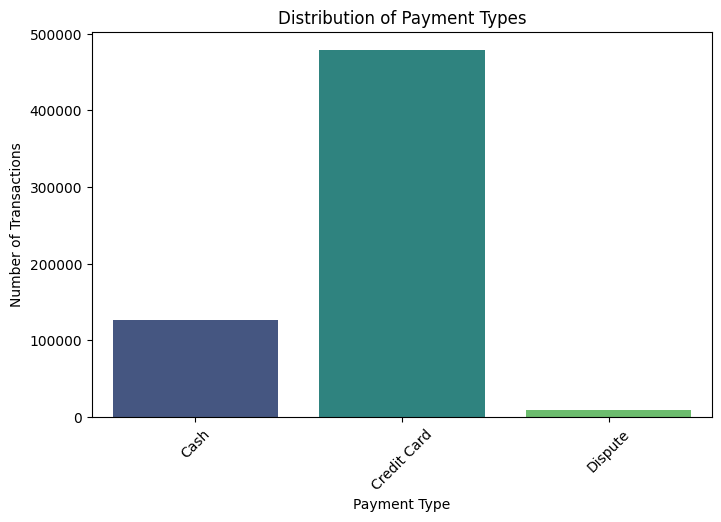

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define mapping of payment type codes to labels
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}

# Replace payment_type values with labels
df_filtered["payment_type"] = df_filtered["payment_type"].replace(payment_labels)

# Plot with updated labels
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x="payment_type", palette="viridis")

plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)  # Rotate for better visibility

save_plot_to_pdf()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [128]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

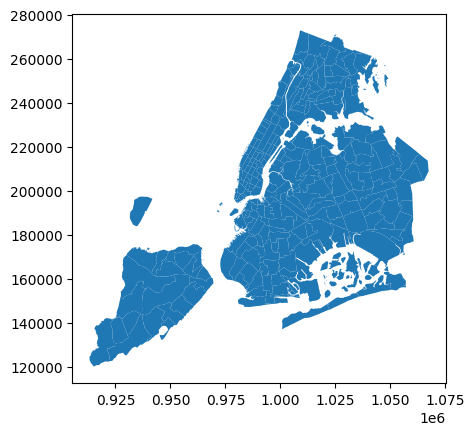

In [129]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

#### Merged Data Frame df_merged

In [130]:
# Merge zones and trip records using locationID and PULocationID

# Merge df_filtered with zones to get pickup zone
df_merged = df_filtered.merge(zones, left_on="pulocationid", right_on="LocationID", how="left")
df_merged.rename(columns={"zone": "pickup_zone"}, inplace=True)
df_merged.drop(columns=["LocationID"], inplace=True)  # Drop redundant column

# Merge again to get dropoff zone
df_merged = df_merged.merge(zones, left_on="dolocationid", right_on="LocationID", how="left")
df_merged.rename(columns={"zone": "dropoff_zone"}, inplace=True)
df_merged.drop(columns=["LocationID"], inplace=True)  # Drop redundant column

# Display the new DataFrame
df_merged.head()

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
2         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
3         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
4         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   

   trip_distance  ratecodeid store_and_fwd_flag  pulocationid  dolocationid  \
0       0.031074         1.0                  N           138           256   
1       0.118850         1.0                  N            66           107   
2       0.026189         1.0                  N           246            37   
3       0.030311         1.0                  N           132            95   
4      -0.006784         1.0                  N            79           186   

  payment_type  ...  Shape_Area_x                pickup_zone  borough_x  \
0         Cash  ...      0.000537          LaGuardia Airport     Queens   
1  Credit Card  ...      0.000108         DUMBO/Vinegar Hill   Brooklyn   
2  Credit Card  ...      0.000281  West Chelsea/Hudson Yards  Manhattan   
3  Credit Card  ...      0.002038                JFK Airport     Queens   
4  Credit Card  ...      0.000108               East Village  Manhattan   

                                          geometry_x  OBJECTID_y  \
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...       256.0   
1  POLYGON ((990055.507 196472.349, 990004.46 196...       107.0   
2  POLYGON ((983031.177 217138.506, 983640.32 216...        37.0   
3  MULTIPOLYGON (((1032791.001 181085.006, 103283...        95.0   
4  POLYGON ((988746.067 202151.955, 988733.885 20...       186.0   

   Shape_Leng_y  Shape_Area_y                  dropoff_zone  borough_y  \
0      0.067915      0.000169     Williamsburg (South Side)   Brooklyn   
1      0.038041      0.000075                      Gramercy  Manhattan   
2      0.142810      0.000452                Bushwick South   Brooklyn   
3      0.113630      0.000573                  Forest Hills     Queens   
4      0.024696      0.000037  Penn Station/Madison Sq West  Manhattan   

                                          geometry_y  
0  POLYGON ((995798.638 199155.97, 996223.601 198...  
1  POLYGON ((989131.643 205749.904, 989084.531 20...  
2  POLYGON ((1002791.711 196025.081, 1002823.637 ...  
3  POLYGON ((1026559.225 208467.841, 1026590.157 ...  
4  POLYGON ((986752.603 210853.699, 986627.863 21...  

[5 rows x 40 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [134]:
#pickup_trips = df_filtered.groupby("pulocationid").size().reset_index(name="num_pickup_trips")
#dropoff_trips = df_filtered.groupby("dolocationid").size().reset_index(name="num_dropoff_trips")
#pickup_trips

In [135]:
# Group data by location and calculate the number of trips
# Group by pickup location and count trips
pickup_trips = df_filtered.groupby("pulocationid").size().reset_index(name="num_pickup_trips")

# Group by dropoff location and count trips
dropoff_trips = df_filtered.groupby("dolocationid").size().reset_index(name="num_dropoff_trips")

# Merge both to get a complete view of trips per location
location_trips = pickup_trips.merge(dropoff_trips, left_on="pulocationid", right_on="dolocationid", how="outer")

# Fill NaN values with 0 (for locations that are only pickups or only dropoffs)
location_trips.fillna(0, inplace=True)

# Add total trips column (sum of pickups and dropoffs)
location_trips["total_trips"] = location_trips["num_pickup_trips"] + location_trips["num_dropoff_trips"]

# Drop duplicate location columns
location_trips.drop(columns=["dolocationid"], inplace=True)

# Rename pulocationid to LocationID for clarity
location_trips.rename(columns={"pulocationid": "LocationID"}, inplace=True)

# Merge with zones to get zone names
location_trips = location_trips.merge(zones, on="LocationID", how="left")

# Display results
location_trips.head()


LocationID  num_pickup_trips  num_dropoff_trips  total_trips  OBJECTID  \
0         1.0               4.0               91.0         95.0       1.0   
1         2.0               2.0                4.0          6.0       2.0   
2         3.0              26.0              122.0        148.0       3.0   
3         4.0             824.0             2381.0       3205.0       4.0   
4         5.0              13.0               33.0         46.0       5.0   

   Shape_Leng  Shape_Area                     zone        borough  \
0    0.116357    0.000782           Newark Airport            EWR   
1    0.433470    0.004866              Jamaica Bay         Queens   
2    0.084341    0.000314  Allerton/Pelham Gardens          Bronx   
3    0.043567    0.000112            Alphabet City      Manhattan   
4    0.092146    0.000498            Arden Heights  Staten Island   

                                            geometry  
0  POLYGON ((933100.918 192536.086, 933091.011 19...  
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  POLYGON ((935843.31 144283.336, 936046.565 144...

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [136]:
# Merge trip counts back to the zones GeoDataFrame

import geopandas as gpd

# Ensure `zones` has a geometry column
gdf = gpd.GeoDataFrame(zones, geometry=zones["geometry"])

# Ensure CRS is set if it's missing
if gdf.crs is None:
    gdf = gdf.set_crs("EPSG:4326")  # Assuming WGS84 (adjust if needed)

# Merge grouped trip data with GeoDataFrame using 'LocationID'
gdf = gdf.merge(location_trips, on="LocationID", how="left")

# Fill missing values with 0 (some locations might not have trips)
gdf[["num_pickup_trips", "num_dropoff_trips", "total_trips"]] = gdf[
    ["num_pickup_trips", "num_dropoff_trips", "total_trips"]
].fillna(0)

# Check the updated GeoDataFrame
gdf.head()


OBJECTID_x  Shape_Leng_x  Shape_Area_x                   zone_x  \
0           1      0.116357      0.000782           Newark Airport   
1           2      0.433470      0.004866              Jamaica Bay   
2           3      0.084341      0.000314  Allerton/Pelham Gardens   
3           4      0.043567      0.000112            Alphabet City   
4           5      0.092146      0.000498            Arden Heights   

   LocationID      borough_x  \
0           1            EWR   
1           2         Queens   
2           3          Bronx   
3           4      Manhattan   
4           5  Staten Island   

                                          geometry_x  num_pickup_trips  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...               4.0   
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...               2.0   
2  POLYGON ((1026308.77 256767.698, 1026495.593 2...              26.0   
3  POLYGON ((992073.467 203714.076, 992068.667 20...             824.0   
4  POLYGON ((935843.31 144283.336, 936046.565 144...              13.0   

   num_dropoff_trips  total_trips  OBJECTID_y  Shape_Leng_y  Shape_Area_y  \
0               91.0         95.0         1.0      0.116357      0.000782   
1                4.0          6.0         2.0      0.433470      0.004866   
2              122.0        148.0         3.0      0.084341      0.000314   
3             2381.0       3205.0         4.0      0.043567      0.000112   
4               33.0         46.0         5.0      0.092146      0.000498   

                    zone_y      borough_y  \
0           Newark Airport            EWR   
1              Jamaica Bay         Queens   
2  Allerton/Pelham Gardens          Bronx   
3            Alphabet City      Manhattan   
4            Arden Heights  Staten Island   

                                          geometry_y  
0  POLYGON ((933100.918 192536.086, 933091.011 19...  
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  POLYGON ((935843.31 144283.336, 936046.565 144...

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

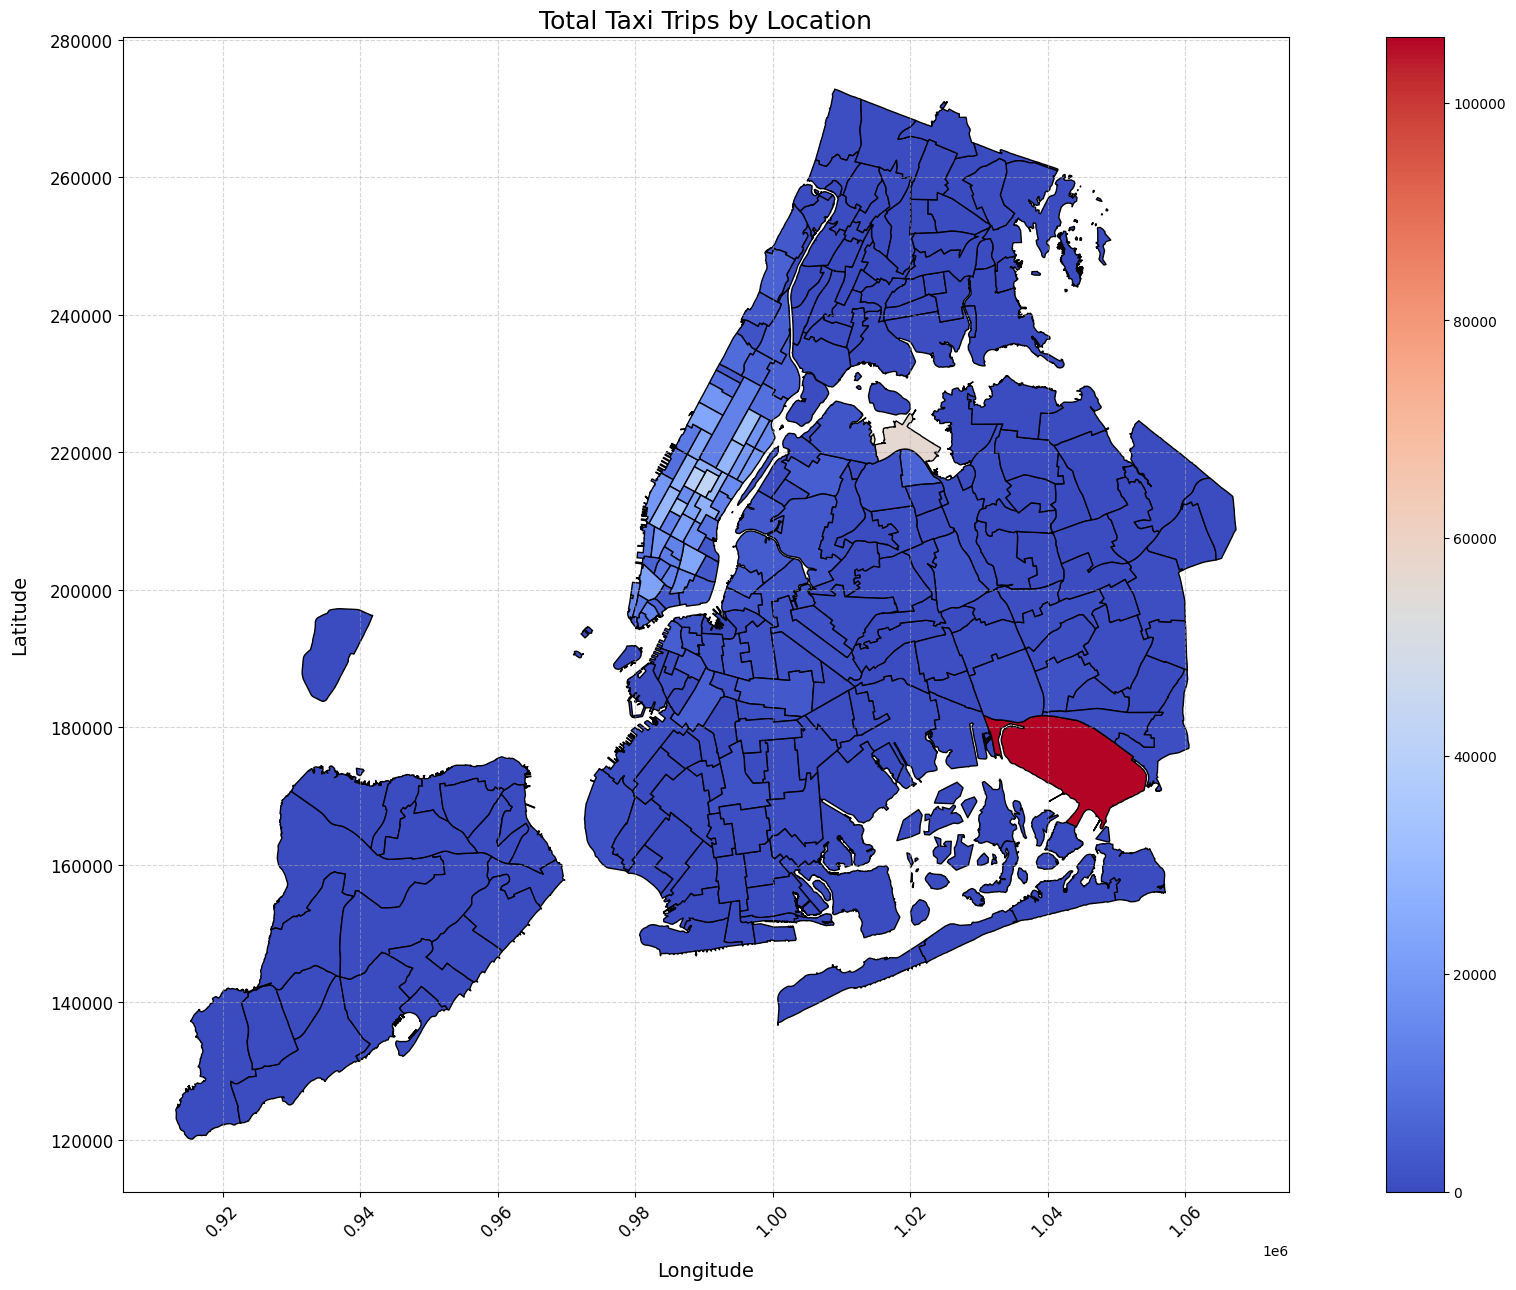

In [148]:
import matplotlib.pyplot as plt

# Define figure and axis
fig, ax = plt.subplots(figsize=(25, 15))

# Plot the GeoDataFrame
gdf.plot(column="total_trips", cmap="coolwarm", legend=True, ax=ax, edgecolor="black")

# Set title
ax.set_title("Total Taxi Trips by Location", fontsize=18)

# Set X and Y axis labels
ax.set_xlabel("Longitude", fontsize=14, labelpad=15)
ax.set_ylabel("Latitude", fontsize=14, labelpad=15)

# Add grid lines for better readability
ax.grid(True, linestyle="--", alpha=0.5)

# Show x and y ticks
ax.tick_params(axis="x", rotation=45, labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# Display the plot
plt.show()


In [149]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by the number of trips in descending order
sorted_gdf = gdf.sort_values(by="total_trips", ascending=False)

# Display the top rows
sorted_gdf.head(10)  # Show top 10 zones with highest trips


OBJECTID_x  Shape_Leng_x  Shape_Area_x                        zone_x  \
133         132      0.245479      0.002038                   JFK Airport   
139         138      0.107467      0.000537             LaGuardia Airport   
162         161      0.035804      0.000072                Midtown Center   
231         230      0.031028      0.000056     Times Sq/Theatre District   
187         186      0.024696      0.000037  Penn Station/Madison Sq West   
237         236      0.044252      0.000103         Upper East Side North   
163         162      0.035270      0.000048                  Midtown East   
69           68      0.049337      0.000111                  East Chelsea   
238         237      0.042213      0.000096         Upper East Side South   
171         170      0.045769      0.000074                   Murray Hill   

     LocationID  borough_x                                         geometry_x  \
133         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
139         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
162         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
231         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
187         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
237         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
163         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
69           68  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
238         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
171         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     num_pickup_trips  num_dropoff_trips  total_trips  OBJECTID_y  \
133           88100.0            17971.0     106071.0       132.0   
139           39728.0            16657.0      56385.0       138.0   
162           23738.0            18557.0      42295.0       161.0   
231           19165.0            20375.0      39540.0       230.0   
187           23235.0            10043.0      33278.0       186.0   
237           16115.0            16280.0      32395.0       236.0   
163           17580.0            12728.0      30308.0       162.0   
69            17450.0            12235.0      29685.0        68.0   
238           16053.0            12717.0      28770.0       237.0   
171           14721.0            12286.0      27007.0       170.0   

     Shape_Leng_y  Shape_Area_y                        zone_y  borough_y  
133      0.245479      0.002038                   JFK Airport     Queens  
139      0.107467      0.000537             LaGuardia Airport     Queens  
162      0.035804      0.000072                Midtown Center  Manhattan  
231      0.031028      0.000056     Times Sq/Theatre District  Manhattan  
187      0.024696      0.000037  Penn Station/Madison Sq West  Manhattan  
237      0.044252      0.000103         Upper East Side North  Manhattan  
163      0.035270      0.000048                  Midtown East  Manhattan  
69       0.049337      0.000111                  East Chelsea  Manhattan  
238      0.042213      0.000096         Upper East Side South  Manhattan  
171      0.045769      0.000074                   Murray Hill  Manhattan

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
print(df_merged.columns)

In [150]:
import pandas as pd

def identify_slowest_routes(df):

    # Ensuring pickup datetime is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['tpep_pickup_datetime']):
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract pickup hour
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

    # Remove trips with 0 duration to avoid division by zero
    df_filtered = df[df["trip_duration"] > 0]

    # Group by route (PULocationID → DOLocationID) and hour
    route_speed = df_filtered.groupby(["pickup_zone", "dropoff_zone", "pickup_hour"]).agg(
        avg_distance=("trip_distance", "mean"),
        avg_duration=("trip_duration", "mean")  # Average trip duration in minutes
    ).reset_index()

    # Calculate speed (miles per hour)
    route_speed["avg_speed_mph"] = (route_speed["avg_distance"] / (route_speed["avg_duration"] / 60))

    # Identify overall slowest routes (sorted by speed)
    slowest_routes = route_speed.sort_values(by="avg_speed_mph", ascending=True)

    # Identify the slowest route at each hour (minimum speed per hour)
    slowest_routes_by_hour = route_speed.loc[route_speed.groupby("pickup_hour")["avg_speed_mph"].idxmin()]

    return slowest_routes, slowest_routes_by_hour

# Call function on df_merged
slow_routes_df, slowest_routes_by_hour_df = identify_slowest_routes(df_merged)

# Display top 10 slowest routes overall
print("\nTop 10 Slowest Routes Overall:")
print(slow_routes_df.head(10))

# Display slowest routes for each hour
print("\nSlowest Routes for Each Hour:")
print(slowest_routes_by_hour_df)



Top 10 Slowest Routes Overall:
                          pickup_zone                    dropoff_zone  \
56124   Long Island City/Queens Plaza                 Lower East Side   
101173      Williamsburg (North Side)                  Bushwick North   
76969                         Seaport                   Midtown North   
32116                      Greenpoint  Stuy Town/Peter Cooper Village   
8275                        Chinatown                 Lower East Side   
35224                Hamilton Heights               LaGuardia Airport   
19476               East Harlem South                Hamilton Heights   
97039        Washington Heights South                    East Chelsea   
81020   Sutton Place/Turtle Bay North                    Clinton West   
28162                   Fresh Meadows                    Saint Albans   

        pickup_hour  avg_distance  avg_duration  avg_speed_mph  
56124             6     -0.028002     17.050000      -0.098542  
101173            2     -0.028002 

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Plot saved to PDF!


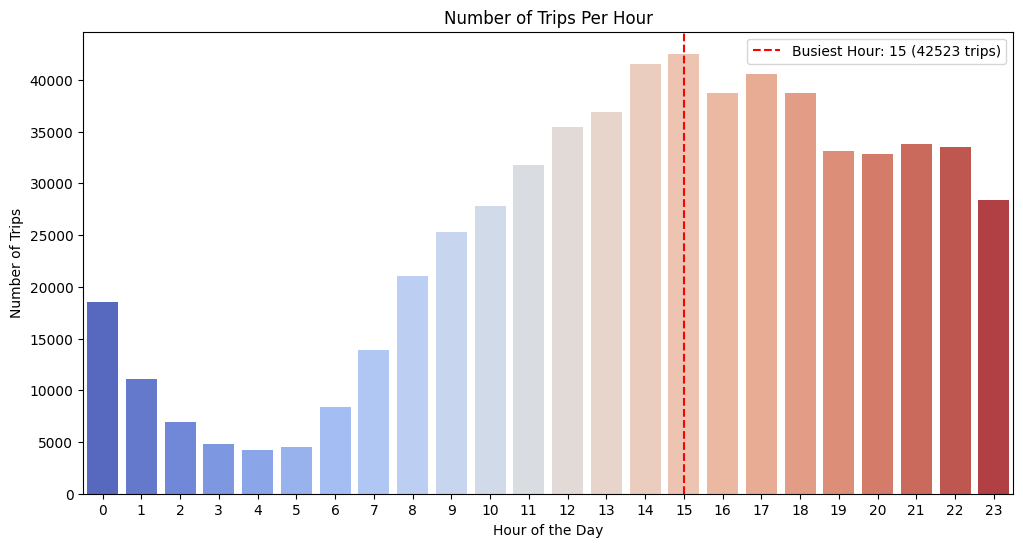


Busiest Hour: 15:00 with 42523 trips.


In [151]:
# Visualise the number of trips per hour and find the busiest hour

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_busiest_hours(df):

    # Ensure pickup datetime is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['tpep_pickup_datetime']):
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract pickup hour
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

    # Count trips per hour
    trips_per_hour = df["pickup_hour"].value_counts().sort_index()

    # Find the busiest hour
    busiest_hour = trips_per_hour.idxmax()
    busiest_hour_trips = trips_per_hour.max()

    # Plot trip distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="coolwarm")
    plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Trips")
    plt.title("Number of Trips Per Hour")
    plt.xticks(range(24))
    plt.legend()

    save_plot_to_pdf()
    plt.show()

    # Print the busiest hour details
    print(f"\nBusiest Hour: {busiest_hour}:00 with {busiest_hour_trips} trips.")

    return busiest_hour, busiest_hour_trips

# Call function on df_merged
busiest_hour, busiest_hour_trips = analyze_busiest_hours(df_merged)


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [152]:
############################################################################################################################
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
#sample_fraction =
# Group by hour and count trips
busiest_hours = df_non_negative_drop_outlier.groupby("hour").size().reset_index(name="total_trips")

# Sort by total trips in descending order and get top 5
top_5_hours = busiest_hours.sort_values(by="total_trips", ascending=False).head(5)

# Display result
print(top_5_hours)

############################################################################################################################

    hour  total_trips
18    18       128458
17    17       121676
19    19       114842
15    15       114625
14    14       111519


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

Plot saved to PDF!


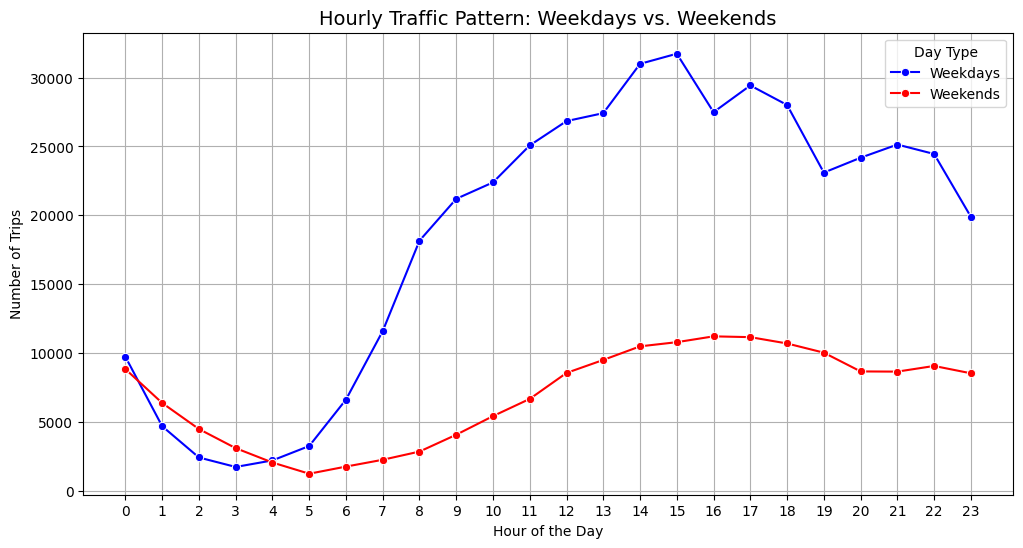

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compare_weekday_weekend_traffic(df):
    # Ensure pickup datetime is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['tpep_pickup_datetime']):
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract hour and day of the week
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
    df["pickup_dayofweek"] = df["tpep_pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6

    # Separate weekday & weekend trips
    weekday_trips = df[df["pickup_dayofweek"] < 5]  # Monday–Friday
    weekend_trips = df[df["pickup_dayofweek"] >= 5]  # Saturday–Sunday

    # Count trips per hour
    weekday_trips_per_hour = weekday_trips["pickup_hour"].value_counts().sort_index()
    weekend_trips_per_hour = weekend_trips["pickup_hour"].value_counts().sort_index()

    # Plot both on the same graph
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(x=weekday_trips_per_hour.index, y=weekday_trips_per_hour.values, marker="o", label="Weekdays", color="blue")
    sns.lineplot(x=weekend_trips_per_hour.index, y=weekend_trips_per_hour.values, marker="o", label="Weekends", color="red")

    plt.title("Hourly Traffic Pattern: Weekdays vs. Weekends", fontsize=14)
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Trips")
    plt.xticks(range(24))
    plt.legend(title="Day Type")

    plt.grid(True)
    save_plot_to_pdf()
    plt.show()

# Call function on df_merged
compare_weekday_weekend_traffic(df_merged)


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Inference from the Hourly Traffic Patterns
Weekday Trends (Blue Line)

There's a morning rush between 7 AM - 10 AM, likely due to office commuters.
A steady increase in trips from noon to evening suggests people heading for lunch, meetings, or errands.
The peak occurs around 5 PM - 9 PM, which aligns with office closure and evening social activities.
A drop after 10 PM as fewer people travel late at night.
Weekend Trends (Red Line)

The number of trips is generally lower than weekdays.
There is no sharp morning rush; instead, activity starts picking up around 10 AM.
The highest number of trips occurs between 2 PM - 8 PM, indicating people heading out for leisure activities.
The decline after 9 PM is much slower than on weekdays, suggesting more late-night travel.
How Finding Busy & Quiet Hours Helps?

Fleet Management & Resource Allocation:

Ride-hailing and taxi companies can deploy more drivers during peak hours and reduce numbers during off-peak times.
Can optimize pricing using surge pricing for peak hours and discounts during off-peak hours.

Revenue Optimization:
Knowing busy hours helps companies increase revenue by adjusting fares accordingly.
Businesses like restaurants and retail can adjust operating hours or staffing based on traffic flow.

Infrastructure Planning:
Helps city planners in traffic congestion management by adjusting signals or providing public transport during peak hours.
Can guide where to add taxi stands or ride-sharing hubs.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Plot saved to PDF!


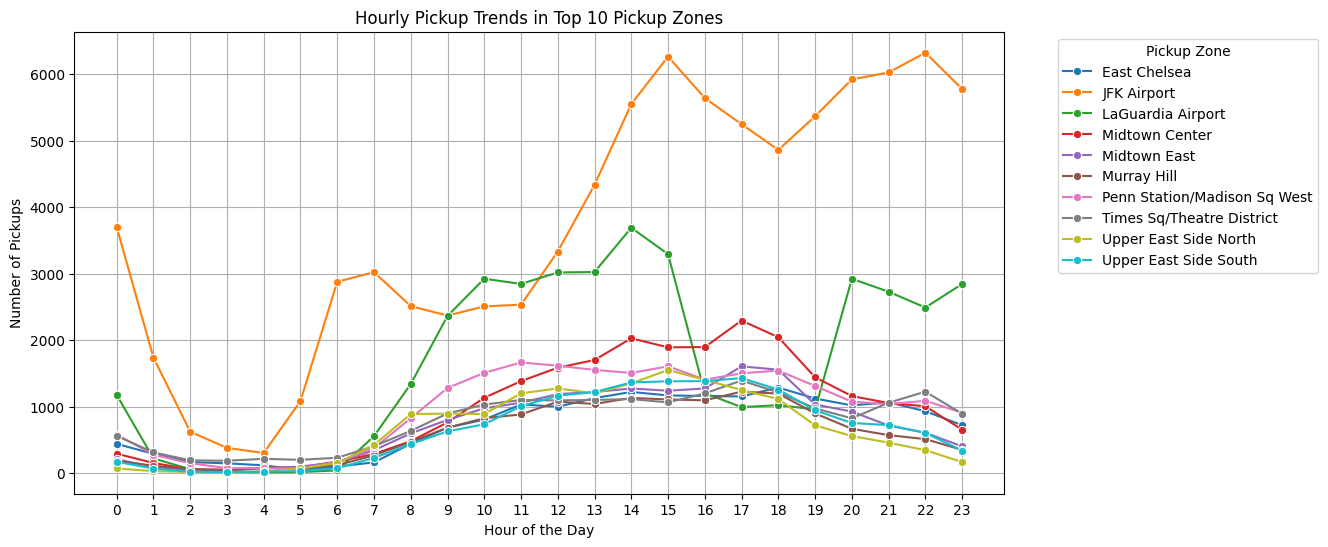

Plot saved to PDF!


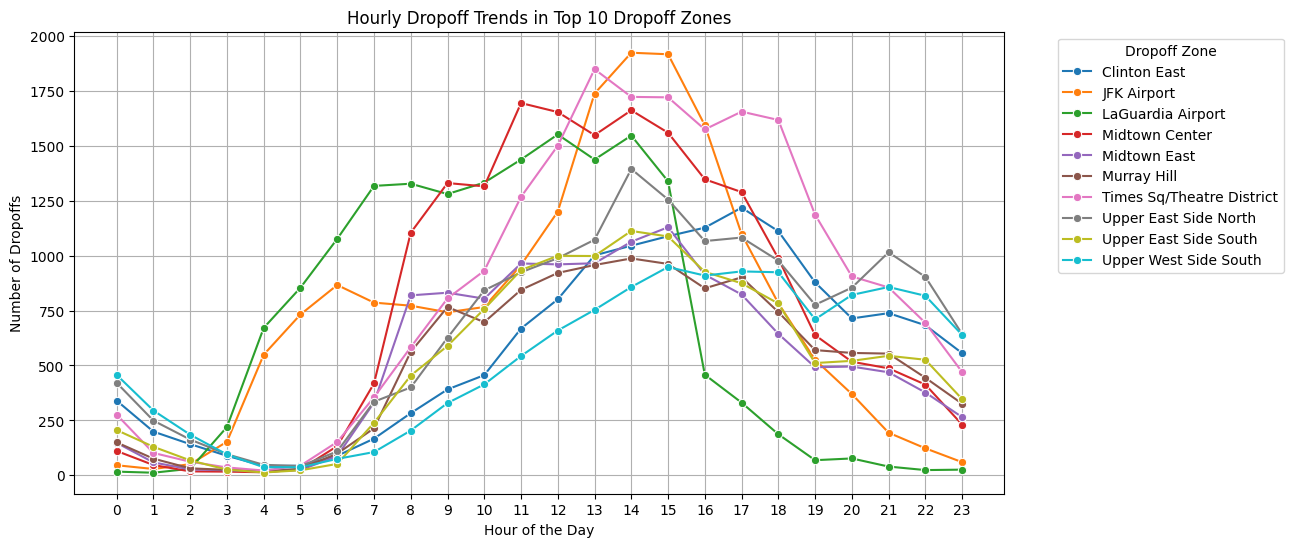

In [158]:
# Find top 10 pickup and dropoff zones

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_top_zones(df, num_zones):
    # Count hourly pickups and dropoffs for each zone
    pickup_counts = df.groupby(["pickup_zone", "hour"]).size().reset_index(name="pickup_count")
    dropoff_counts = df.groupby(["dropoff_zone", "hour"]).size().reset_index(name="dropoff_count")

    # Identify the top 10 zones with the highest pickups
    top_pickup_zones = pickup_counts.groupby("pickup_zone")["pickup_count"].sum().nlargest(num_zones).index
    top_pickup_data = pickup_counts[pickup_counts["pickup_zone"].isin(top_pickup_zones)]

    # Identify the top 10 zones with the highest dropoffs
    top_dropoff_zones = dropoff_counts.groupby("dropoff_zone")["dropoff_count"].sum().nlargest(num_zones).index
    top_dropoff_data = dropoff_counts[dropoff_counts["dropoff_zone"].isin(top_dropoff_zones)]

    # **Plot pickup trends**
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=top_pickup_data, x="hour", y="pickup_count", hue="pickup_zone", marker="o")
    plt.title(f"Hourly Pickup Trends in Top {num_zones} Pickup Zones")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Pickups")
    plt.xticks(range(24))
    plt.legend(title="Pickup Zone", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    save_plot_to_pdf()
    plt.show()

    # **Plot dropoff trends**
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=top_dropoff_data, x="hour", y="dropoff_count", hue="dropoff_zone", marker="o")
    plt.title(f"Hourly Dropoff Trends in Top {num_zones} Dropoff Zones")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Dropoffs")
    plt.xticks(range(24))
    plt.legend(title="Dropoff Zone", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    save_plot_to_pdf()
    plt.show()

    return top_pickup_zones, top_dropoff_zones

# Call function on df_merged
top_pickups, top_dropoffs = analyze_top_zones(df_merged, num_zones=10)


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

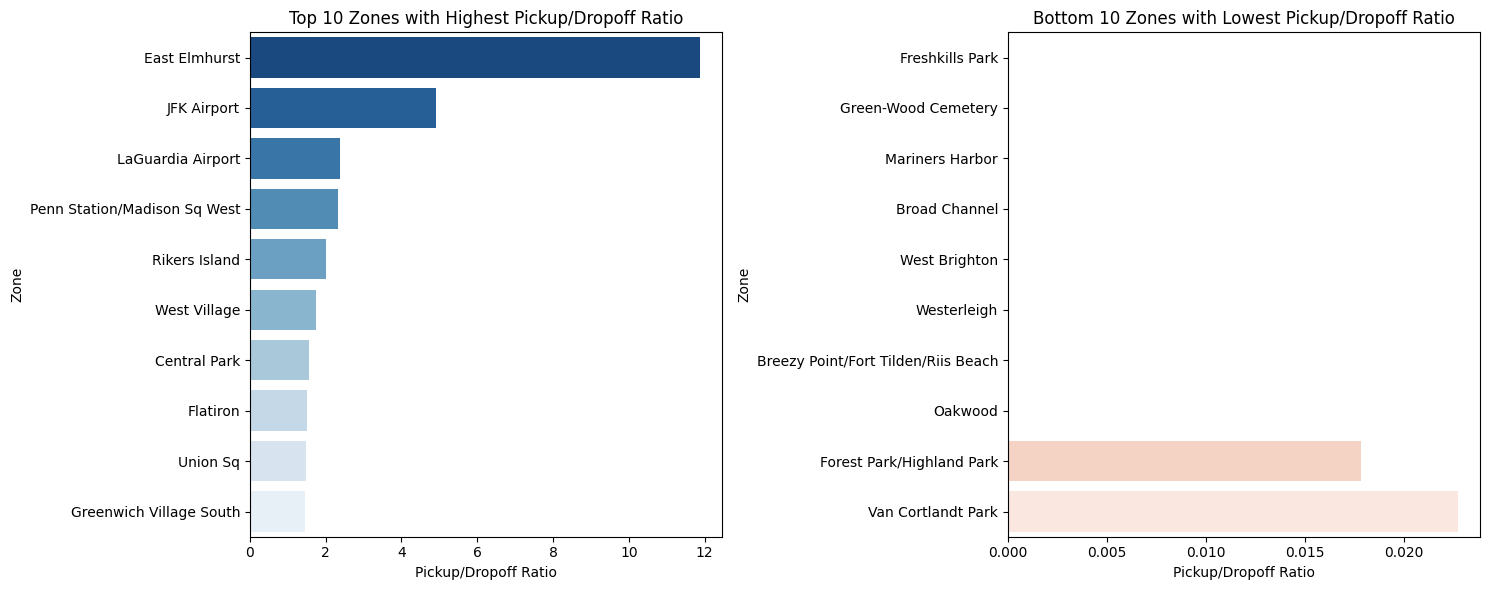

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compute_and_plot_pickup_dropoff_ratios(df, top_n=10):
    # Count total pickups per zone
    pickup_counts = df["pickup_zone"].value_counts().rename("total_pickups")

    # Count total dropoffs per zone
    dropoff_counts = df["dropoff_zone"].value_counts().rename("total_dropoffs")

    # Combine into a DataFrame
    zone_ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0).reset_index()

    # Rename the index column to 'zone'
    zone_ratios.rename(columns={"index": "zone"}, inplace=True)

    # Compute pickup/dropoff ratio
    zone_ratios["pickup_dropoff_ratio"] = zone_ratios["total_pickups"] / zone_ratios["total_dropoffs"].replace(0, 1)

    # Sort to get the top and bottom zones
    top_zones = zone_ratios.sort_values(by="pickup_dropoff_ratio", ascending=False).head(top_n)
    bottom_zones = zone_ratios.sort_values(by="pickup_dropoff_ratio", ascending=True).head(top_n)

    # **Plotting**
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Top 10 zones (high pickup/dropoff ratio)
    sns.barplot(data=top_zones, x="pickup_dropoff_ratio", y="zone", ax=axes[0], palette="Blues_r")
    axes[0].set_title(f"Top {top_n} Zones with Highest Pickup/Dropoff Ratio")
    axes[0].set_xlabel("Pickup/Dropoff Ratio")
    axes[0].set_ylabel("Zone")

    # Bottom 10 zones (low pickup/dropoff ratio)
    sns.barplot(data=bottom_zones, x="pickup_dropoff_ratio", y="zone", ax=axes[1], palette="Reds_r")
    axes[1].set_title(f"Bottom {top_n} Zones with Lowest Pickup/Dropoff Ratio")
    axes[1].set_xlabel("Pickup/Dropoff Ratio")
    axes[1].set_ylabel("Zone")

    plt.tight_layout()
    plt.show()

    return top_zones, bottom_zones

# Call function
top_zones, bottom_zones = compute_and_plot_pickup_dropoff_ratios(df_merged, top_n=10)


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)


Top 10 Nighttime Pickup Zones (11 PM - 5 AM):
                      pickup_zone  num_pickups
103                   JFK Airport        13614
66                   East Village         4991
112             LaGuardia Airport         4364
211                  West Village         3809
122               Lower East Side         3436
39                   Clinton East         3219
91        Greenwich Village South         2591
194     Times Sq/Theatre District         2577
156  Penn Station/Madison Sq West         2153
55                   East Chelsea         1945

Top 10 Nighttime Dropoff Zones (11 PM - 5 AM):
              dropoff_zone  num_dropoffs
254         Yorkville West          2319
130      LaGuardia Airport          1830
230  Upper West Side South          1745
227  Upper East Side North          1662
229  Upper West Side North          1637
121            JFK Airport          1620
133        Lenox Hill West          1548
253         Yorkville East          1455
4                  

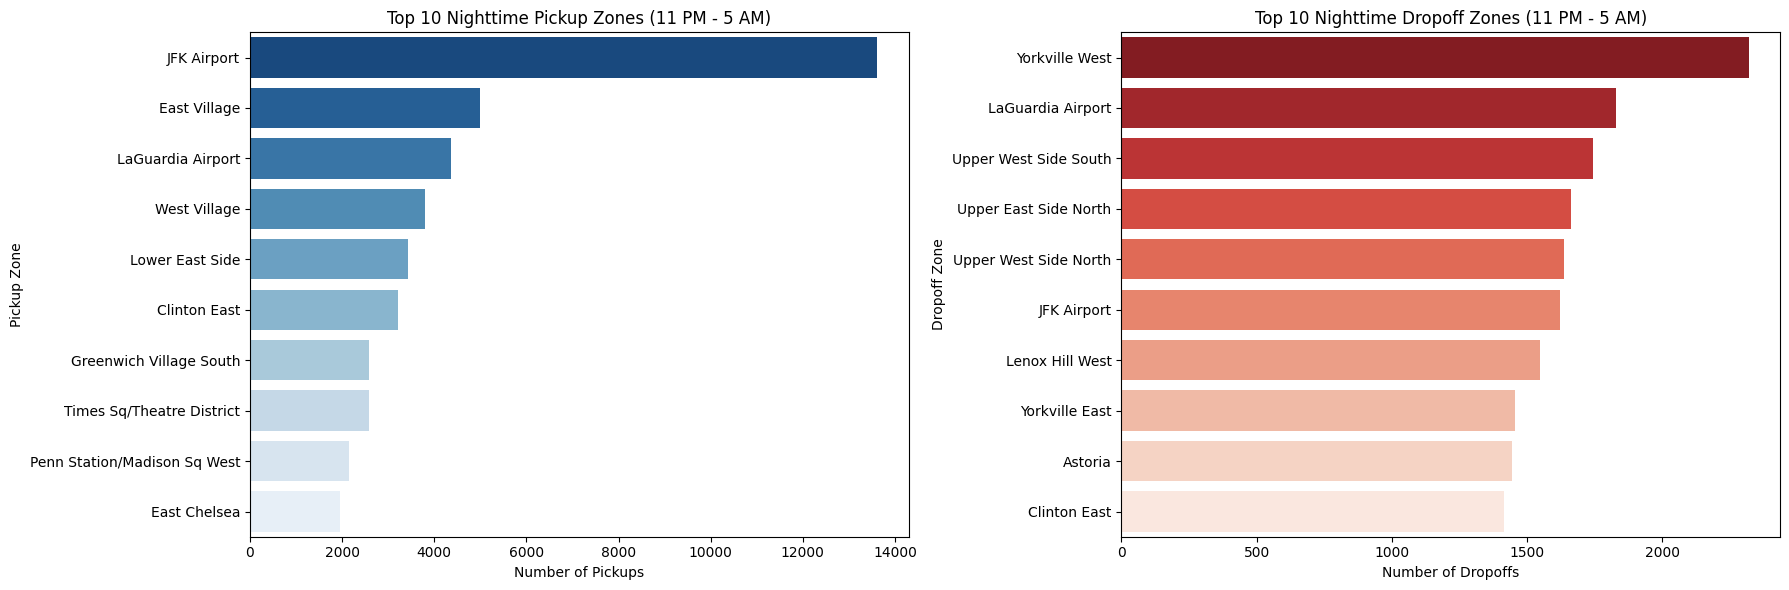

In [165]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def top_night_zones(df, top_n):
    # Ensure pickup_datetime is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['tpep_pickup_datetime']):
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract hour from timestamp
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

    # Filter for trips occurring between 11 PM (23) and 5 AM (5)
    night_df = df[(df["pickup_hour"] >= 23) | (df["pickup_hour"] <= 5)]

    # Count pickups and dropoffs
    pickup_counts = night_df.groupby("pickup_zone").size().reset_index(name="num_pickups")
    dropoff_counts = night_df.groupby("dropoff_zone").size().reset_index(name="num_dropoffs")

    # Get top 10 pickup and dropoff zones
    top_pickup_zones = pickup_counts.nlargest(top_n, "num_pickups")
    top_dropoff_zones = dropoff_counts.nlargest(top_n, "num_dropoffs")

    # Print top zones
    print("\nTop 10 Nighttime Pickup Zones (11 PM - 5 AM):")
    print(top_pickup_zones)

    print("\nTop 10 Nighttime Dropoff Zones (11 PM - 5 AM):")
    print(top_dropoff_zones)

    # Visualization - Countplot for Pickups & Dropoffs
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Pickup Countplot
    sns.barplot(data=top_pickup_zones, x="num_pickups", y="pickup_zone", palette="Blues_r", ax=axes[0])
    axes[0].set_title(f"Top {top_n} Nighttime Pickup Zones (11 PM - 5 AM)")
    axes[0].set_xlabel("Number of Pickups")
    axes[0].set_ylabel("Pickup Zone")

    # Dropoff Countplot
    sns.barplot(data=top_dropoff_zones, x="num_dropoffs", y="dropoff_zone", palette="Reds_r", ax=axes[1])
    axes[1].set_title(f"Top {top_n} Nighttime Dropoff Zones (11 PM - 5 AM)")
    axes[1].set_xlabel("Number of Dropoffs")
    axes[1].set_ylabel("Dropoff Zone")

    plt.tight_layout()

    save_plot_to_pdf()
    plt.show()

    return top_pickup_zones, top_dropoff_zones

# Call function on df_merged
top_night_pickups, top_night_dropoffs = top_night_zones(df_merged, top_n=10)



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Filter for night hours (11 PM to 5 AM)


Revenue Breakdown:
Nighttime (11 PM - 5 AM): $14,590.92
Daytime (5:01 AM - 22:59 PM): $95,598.56
Plot saved to PDF!


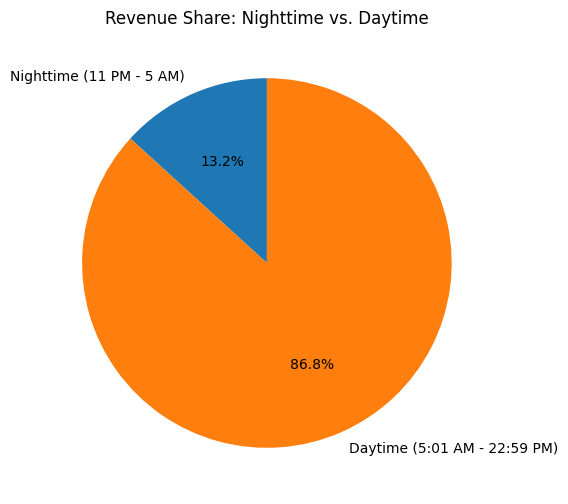

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

def revenue_share_night_vs_day(df):
    # Ensure datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['tpep_pickup_datetime']):
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract hour
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

    # Define night (11 PM - 5 AM) and day (6 AM - 10 PM)
    night_df = df[(df["pickup_hour"] >= 23) | (df["pickup_hour"] <= 5)]
    day_df = df[(df["pickup_hour"] > 5 ) & (df["pickup_hour"] < 23)]

    # Calculate total revenue for night and day
    night_revenue = night_df["total_amount"].sum()
    day_revenue = day_df["total_amount"].sum()

    # Create a dictionary to store revenue
    revenue_data = {
        "Nighttime (11 PM - 5 AM)": night_revenue,
        "Daytime (5:01 AM - 22:59 PM)": day_revenue
    }

    # Print revenue details
    print("\nRevenue Breakdown:")
    for key, value in revenue_data.items():
        print(f"{key}: ${value:,.2f}")

    # Pie chart visualization
    plt.figure(figsize=(8, 6))
    plt.pie(revenue_data.values(), labels=revenue_data.keys(), autopct='%1.1f%%', colors=["#1f77b4", "#ff7f0e"], startangle=90)
    plt.title("Revenue Share: Nighttime vs. Daytime")

    save_plot_to_pdf()
    plt.show()

    return revenue_data

# Call function on df_merged
revenue_breakdown = revenue_share_night_vs_day(df_merged)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.


Average Fare per Mile per Passenger:
   passenger_count  avg_fare_per_mile  fare_per_mile_per_passenger
0              1.0          18.951381                    18.951381
1              2.0          17.875111                     8.937555
2              3.0          20.949977                     6.983326
3              4.0          25.799197                     6.449799
4              5.0          19.879474                     3.975895
5              6.0          19.667351                     3.277892
Plot saved to PDF!


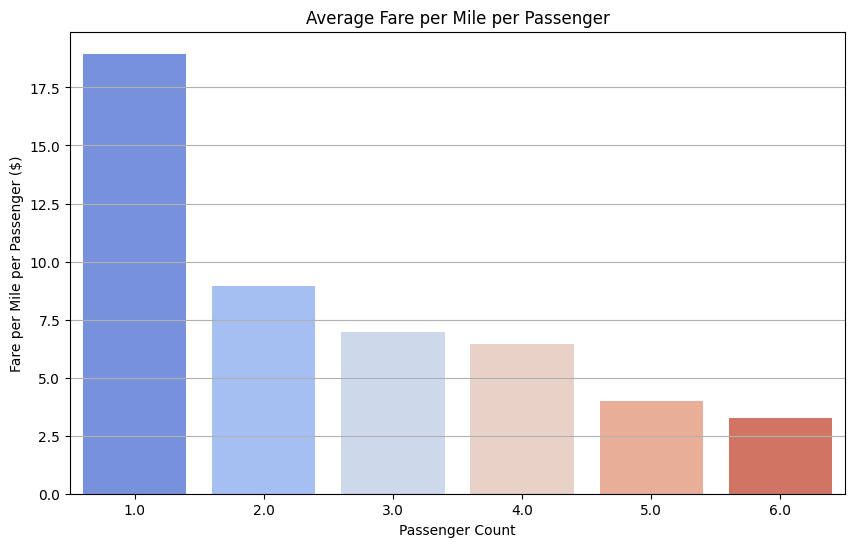

In [170]:
# Analyse the fare per mile per passenger for different passenger counts

import pandas as pd

def fare_per_mile_per_passenger(df):
    # Remove trips with zero or negative distance to avoid division errors
    df_filtered = df[df["trip_distance"] > 0].copy()

    # Calculate fare per mile
    df_filtered["fare_per_mile"] = df_filtered["fare_amount"] / df_filtered["trip_distance"]

    # Group by passenger count and calculate averages
    result = df_filtered.groupby("passenger_count").agg(
        avg_fare_per_mile=("fare_per_mile", "mean")
    ).reset_index()

    # Compute fare per mile per passenger
    result["fare_per_mile_per_passenger"] = result["avg_fare_per_mile"] / result["passenger_count"]

    # Remove invalid values (e.g., divide by zero cases)
    result = result[result["passenger_count"] > 0]

    # Display results
    print("\nAverage Fare per Mile per Passenger:")
    print(result)

    # **Plotting**
    plt.figure(figsize=(10, 6))
    sns.barplot(data=result, x="passenger_count", y="fare_per_mile_per_passenger", palette="coolwarm")

    plt.xlabel("Passenger Count")
    plt.ylabel("Fare per Mile per Passenger ($)")
    plt.title("Average Fare per Mile per Passenger")
    plt.xticks(rotation=0)
    plt.grid(axis="y")

    save_plot_to_pdf()
    plt.show()

    return result

# Call function on df_merged
fare_per_passenger_df = fare_per_mile_per_passenger(df_merged)



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Plot saved to PDF!


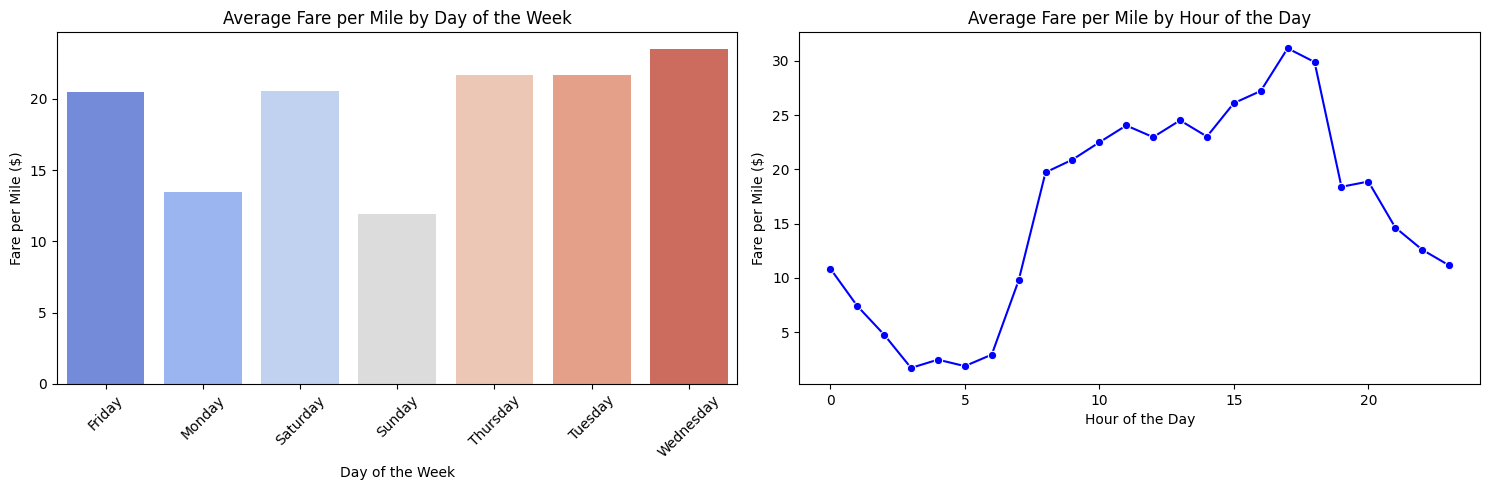

In [171]:
# Compare the average fare per mile for different days and for different times of the day

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_fare_per_mile(df):
    # Ensure datetime format
    if not pd.api.types.is_datetime64_any_dtype(df["tpep_pickup_datetime"]):
        df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

    # Remove trips with zero or negative distance
    df_filtered = df[df["trip_distance"] > 0].copy()

    # Calculate fare per mile
    df_filtered["fare_per_mile"] = df_filtered["fare_amount"] / df_filtered["trip_distance"]

    # Extract day of week and hour of day
    df_filtered["day_of_week"] = df_filtered["tpep_pickup_datetime"].dt.day_name()
    df_filtered["hour_of_day"] = df_filtered["tpep_pickup_datetime"].dt.hour

    # Group by day of week
    fare_by_day = df_filtered.groupby("day_of_week")["fare_per_mile"].mean().reset_index()

    # Group by hour of day
    fare_by_hour = df_filtered.groupby("hour_of_day")["fare_per_mile"].mean().reset_index()

    # Plot comparison
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot: Fare per mile by day of the week
    sns.barplot(data=fare_by_day, x="day_of_week", y="fare_per_mile", ax=axes[0], palette="coolwarm")
    axes[0].set_title("Average Fare per Mile by Day of the Week")
    axes[0].set_ylabel("Fare per Mile ($)")
    axes[0].set_xlabel("Day of the Week")
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    # Plot: Fare per mile by hour of the day
    sns.lineplot(data=fare_by_hour, x="hour_of_day", y="fare_per_mile", ax=axes[1], marker="o", color="b")
    axes[1].set_title("Average Fare per Mile by Hour of the Day")
    axes[1].set_ylabel("Fare per Mile ($)")
    axes[1].set_xlabel("Hour of the Day")

    plt.tight_layout()

    save_plot_to_pdf()
    plt.show()

# Call function on df_merged
compare_fare_per_mile(df_merged)


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [175]:
#df_merged["vendorid"].value_counts()

Plot saved to PDF!


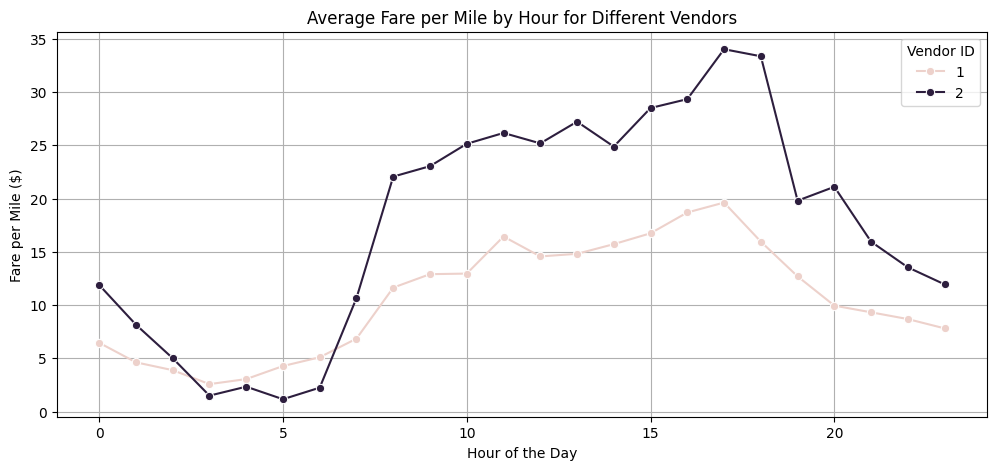

Plot saved to PDF!


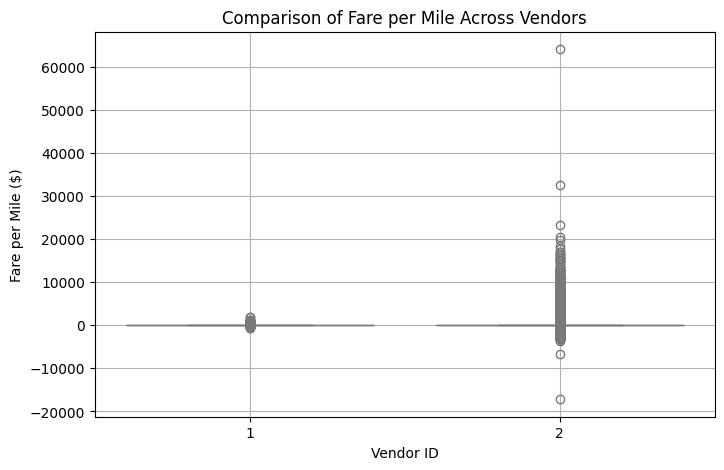

In [172]:
# Compare fare per mile for different vendors

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_vendor_fare_per_mile(df):
    # Ensure datetime format
    if not pd.api.types.is_datetime64_any_dtype(df["tpep_pickup_datetime"]):
        df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

    # Remove trips with zero or negative distance
    df_filtered = df[df["trip_distance"] > 0].copy()

    # Calculate fare per mile
    df_filtered["fare_per_mile"] = df_filtered["fare_amount"] / df_filtered["trip_distance"]

    # Extract hour of the day
    df_filtered["hour_of_day"] = df_filtered["tpep_pickup_datetime"].dt.hour

    # Group by vendor and hour
    fare_by_vendor_hour = df_filtered.groupby(["vendorid", "hour_of_day"])["fare_per_mile"].mean().reset_index()

    # Plot fare per mile trends for different vendors
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=fare_by_vendor_hour, x="hour_of_day", y="fare_per_mile", hue="vendorid", marker="o")
    plt.title("Average Fare per Mile by Hour for Different Vendors")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Fare per Mile ($)")
    plt.legend(title="Vendor ID")
    plt.grid(True)

    save_plot_to_pdf()
    plt.show()

    # Boxplot to compare fare per mile among vendors
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_filtered, x="vendorid", y="fare_per_mile", palette="coolwarm")
    plt.title("Comparison of Fare per Mile Across Vendors")
    plt.xlabel("Vendor ID")
    plt.ylabel("Fare per Mile ($)")
    plt.grid(True)

    save_plot_to_pdf()
    plt.show()

# Call function on df_merged
analyze_vendor_fare_per_mile(df_merged)


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Plot saved to PDF!


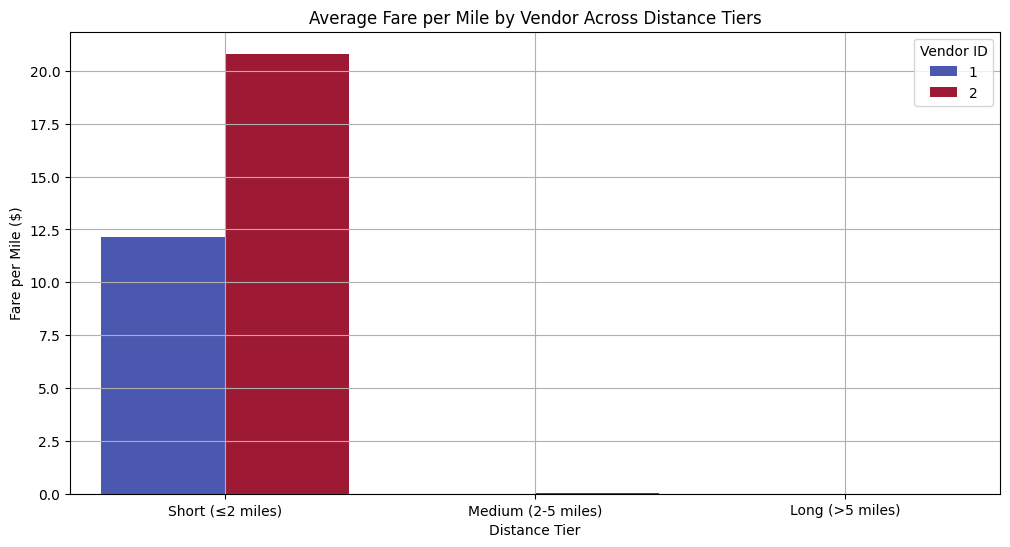

Plot saved to PDF!


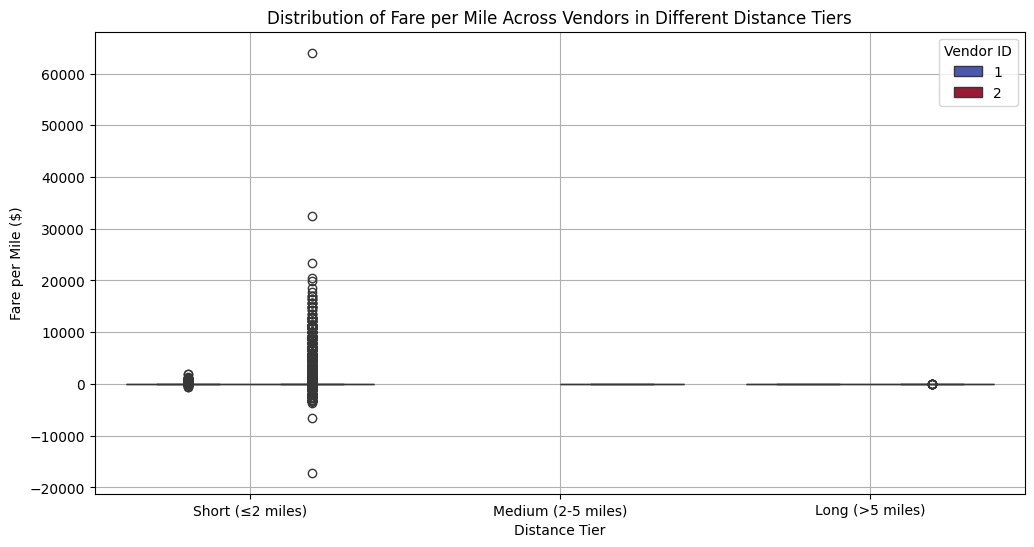

In [176]:
# Defining distance tiers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_fare_tiers_by_vendor(df):
    # Ensure datetime format
    if not pd.api.types.is_datetime64_any_dtype(df["tpep_pickup_datetime"]):
        df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

    # Remove trips with zero or negative distance
    df_filtered = df[df["trip_distance"] > 0].copy()

    # Calculate fare per mile
    df_filtered["fare_per_mile"] = df_filtered["fare_amount"] / df_filtered["trip_distance"]

    # Define distance tiers
    conditions = [
        (df_filtered["trip_distance"] <= 2),
        (df_filtered["trip_distance"] > 2) & (df_filtered["trip_distance"] <= 5),
        (df_filtered["trip_distance"] > 5)
    ]
    labels = ["Short (≤2 miles)", "Medium (2-5 miles)", "Long (>5 miles)"]
    df_filtered["distance_tier"] = pd.cut(df_filtered["trip_distance"], bins=[0, 2, 5, float("inf")], labels=labels)

    # Group by vendor and tier
    fare_tier_analysis = df_filtered.groupby(["vendorid", "distance_tier"])["fare_per_mile"].mean().reset_index()

    # Plot results
    plt.figure(figsize=(12, 6))
    sns.barplot(data=fare_tier_analysis, x="distance_tier", y="fare_per_mile", hue="vendorid", palette="coolwarm")
    plt.title("Average Fare per Mile by Vendor Across Distance Tiers")
    plt.xlabel("Distance Tier")
    plt.ylabel("Fare per Mile ($)")
    plt.legend(title="Vendor ID")
    plt.grid(True)

    save_plot_to_pdf()
    plt.show()

    # Boxplot to compare distribution of fare per mile across vendors in each tier
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_filtered, x="distance_tier", y="fare_per_mile", hue="vendorid", palette="coolwarm")
    plt.title("Distribution of Fare per Mile Across Vendors in Different Distance Tiers")
    plt.xlabel("Distance Tier")
    plt.ylabel("Fare per Mile ($)")
    plt.legend(title="Vendor ID")
    plt.grid(True)

    save_plot_to_pdf()
    plt.show()

# Call function on df_merged
analyze_fare_tiers_by_vendor(df_merged)


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

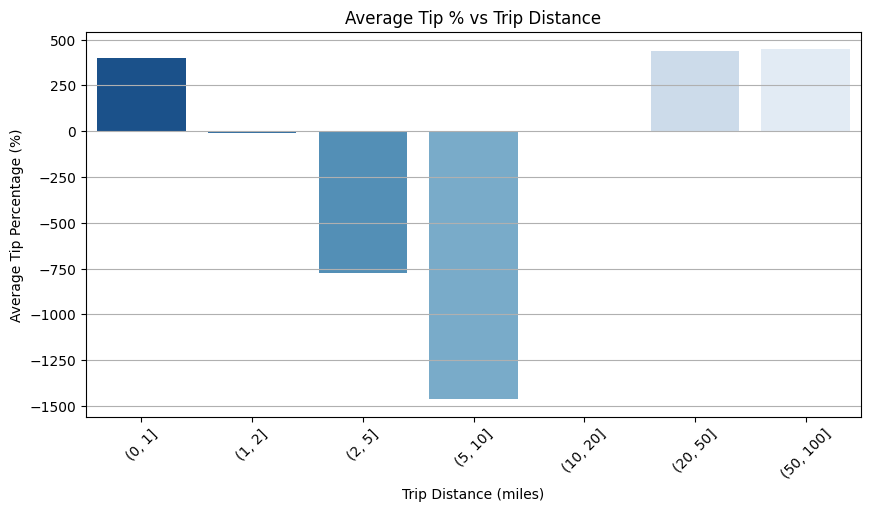

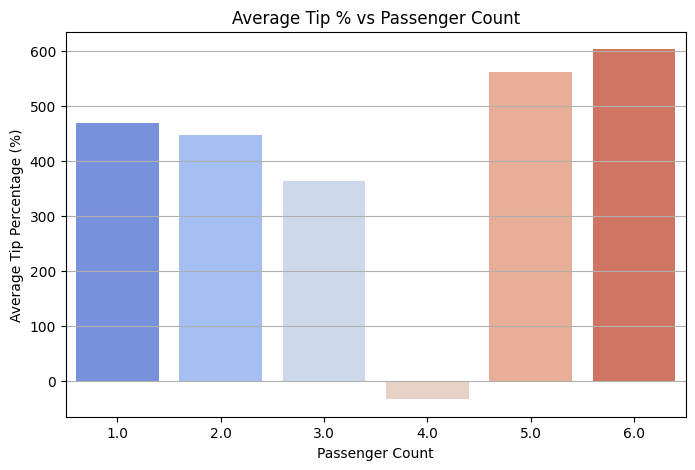

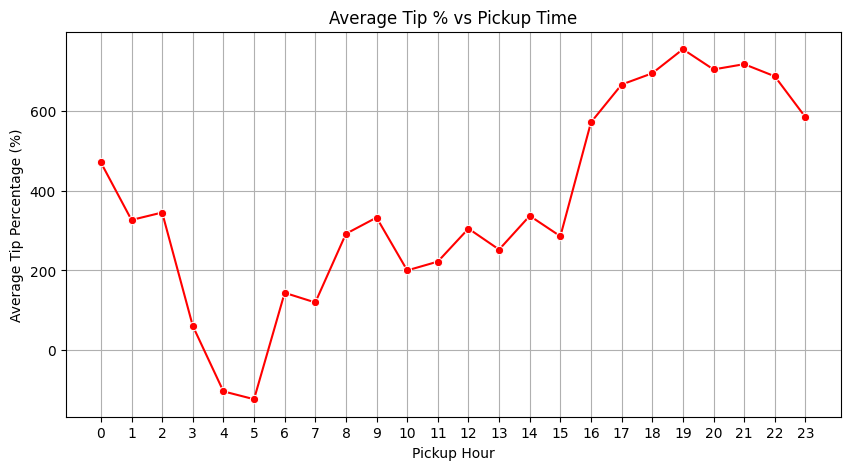

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_tip_percentage(df):
    # Remove trips with zero or negative fares to avoid division errors
    df_filtered = df[df["fare_amount"] > 0].copy()

    # Calculate Tip Percentage
    df_filtered["tip_percentage"] = (df_filtered["tip_amount"] / df_filtered["fare_amount"]) * 100

    ## ------------------ 1️ Tip % vs Trip Distance ------------------ ##
    distance_bins = [0, 1, 2, 5, 10, 20, 50, 100]  # Distance bins
    df_filtered["trip_distance_bin"] = pd.cut(df_filtered["trip_distance"], bins=distance_bins)

    tip_by_distance = df_filtered.groupby("trip_distance_bin")["tip_percentage"].mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.barplot(data=tip_by_distance, x="trip_distance_bin", y="tip_percentage", palette="Blues_r")
    plt.xlabel("Trip Distance (miles)")
    plt.ylabel("Average Tip Percentage (%)")
    plt.title("Average Tip % vs Trip Distance")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    save_plot_to_pdf()
    plt.show()

    ## ------------------ 2️ Tip % vs Passenger Count ------------------ ##
    tip_by_passenger = df_filtered.groupby("passenger_count")["tip_percentage"].mean().reset_index()

    plt.figure(figsize=(8, 5))
    sns.barplot(data=tip_by_passenger, x="passenger_count", y="tip_percentage", palette="coolwarm")
    plt.xlabel("Passenger Count")
    plt.ylabel("Average Tip Percentage (%)")
    plt.title("Average Tip % vs Passenger Count")
    plt.grid(axis="y")
    save_plot_to_pdf()
    plt.show()

    ## ------------------ 3️ Tip % vs Pickup Hour ------------------ ##
    df_filtered["pickup_hour"] = df_filtered["tpep_pickup_datetime"].dt.hour  # Extract pickup hour
    tip_by_hour = df_filtered.groupby("pickup_hour")["tip_percentage"].mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=tip_by_hour, x="pickup_hour", y="tip_percentage", marker="o", color="red")
    plt.xlabel("Pickup Hour")
    plt.ylabel("Average Tip Percentage (%)")
    plt.title("Average Tip % vs Pickup Time")
    plt.xticks(range(24))
    plt.grid()
    save_plot_to_pdf()
    plt.show()

    return tip_by_distance, tip_by_passenger, tip_by_hour

# Call function on df_merged
tip_distance_df, tip_passenger_df, tip_hour_df = analyze_tip_percentage(df_merged)


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Compare trips with tip percentage < 10% to trips with tip percentage > 25%

Plot saved to PDF!


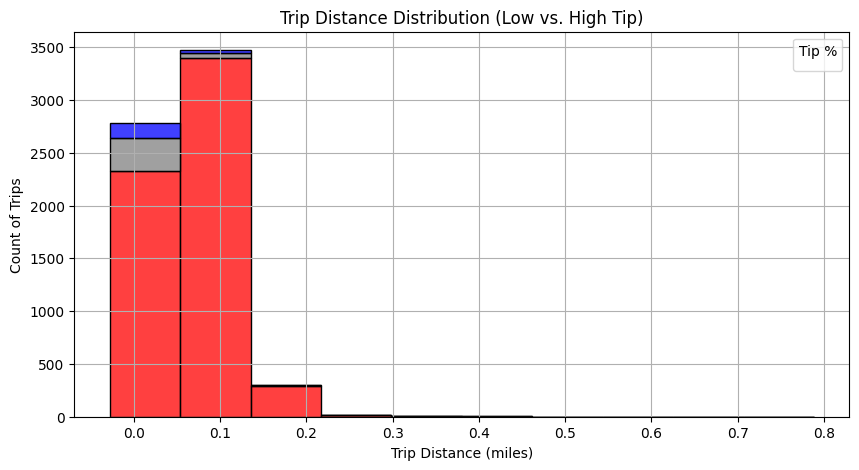

Plot saved to PDF!


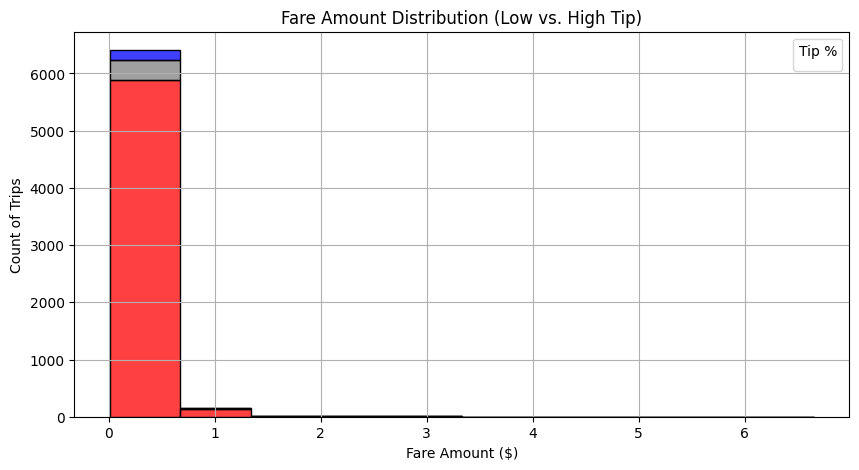

Plot saved to PDF!


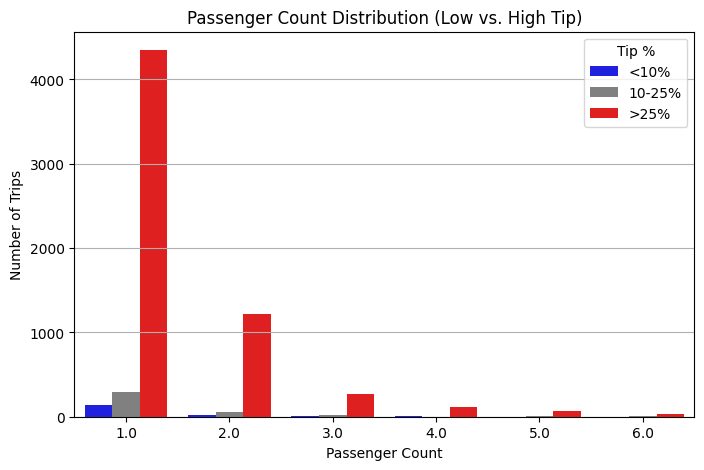

Plot saved to PDF!


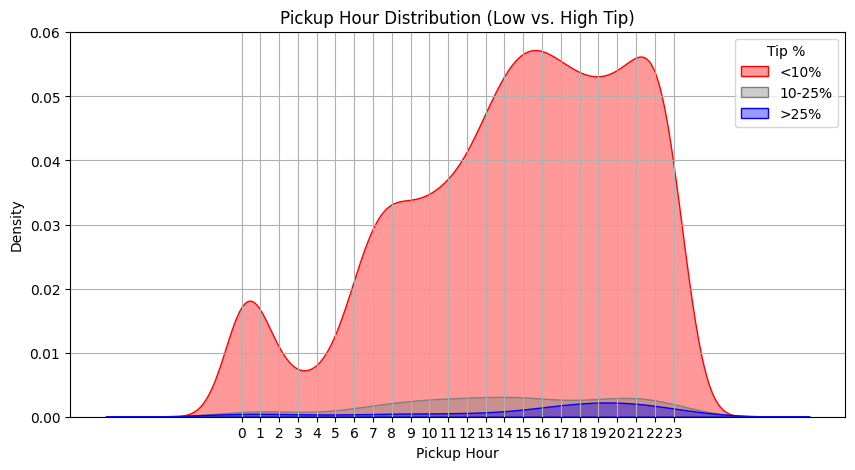

Plot saved to PDF!


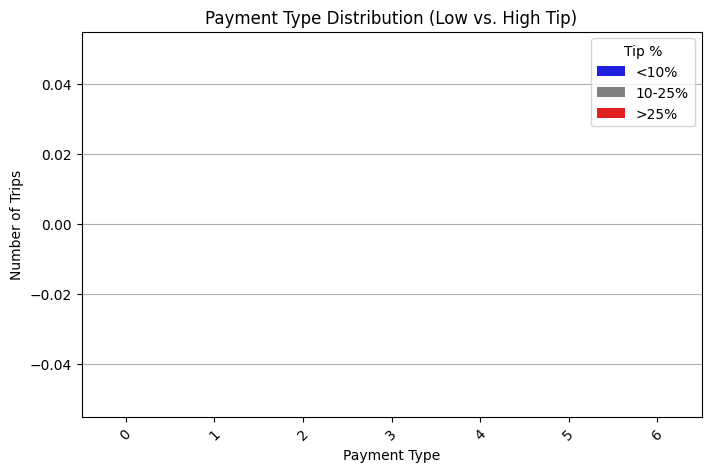

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compare_tip_groups(df):
    # Remove trips with zero or negative fare to avoid division errors
    df_filtered = df[df["fare_amount"] > 0].copy()

    # Calculate Tip Percentage
    df_filtered["tip_percentage"] = (df_filtered["tip_amount"] / df_filtered["fare_amount"]) * 100

    # Categorize trips based on tip percentage
    df_filtered["tip_category"] = pd.cut(
        df_filtered["tip_percentage"], 
        bins=[0, 10, 25, 100], 
        labels=["<10%", "10-25%", ">25%"]
    )

    color_palette = {"<10%": "blue", ">25%": "red", "10-25%": "gray"}

    ## ------------------ 1️ Trip Distance Comparison ------------------ ##
    plt.figure(figsize=(10, 5))
    ax = sns.histplot(data=df_filtered, x="trip_distance", hue="tip_category", bins=10, multiple="stack", palette=color_palette)
    plt.xlabel("Trip Distance (miles)")
    plt.ylabel("Count of Trips")
    plt.title("Trip Distance Distribution (Low vs. High Tip)")
    
    # Manually create legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels, title="Tip %")

    plt.grid()
    save_plot_to_pdf()
    plt.show()

    ## ------------------ 2️ Fare Amount Comparison ------------------ ##
    plt.figure(figsize=(10, 5))
    ax = sns.histplot(data=df_filtered, x="fare_amount", hue="tip_category", bins=10, multiple="stack", palette=color_palette)
    plt.xlabel("Fare Amount ($)")
    plt.ylabel("Count of Trips")
    plt.title("Fare Amount Distribution (Low vs. High Tip)")
    
    # Manually create legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels, title="Tip %")

    plt.grid()
    save_plot_to_pdf()
    plt.show()

    ## ------------------ 3️ Passenger Count Comparison ------------------ ##
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_filtered, x="passenger_count", hue="tip_category", palette=color_palette)
    plt.xlabel("Passenger Count")
    plt.ylabel("Number of Trips")
    plt.title("Passenger Count Distribution (Low vs. High Tip)")
    plt.legend(title="Tip %")
    plt.grid(axis="y")
    save_plot_to_pdf()
    plt.show()

    ## ------------------ 4️ Pickup Hour Comparison (KDE Plot) ------------------ ##
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df_filtered, x="pickup_hour", hue="tip_category", fill=True, alpha=0.4, palette=color_palette)
    plt.xlabel("Pickup Hour")
    plt.ylabel("Density")
    plt.title("Pickup Hour Distribution (Low vs. High Tip)")
    plt.xticks(range(24))
    plt.legend(title="Tip %", labels=["<10%", "10-25%", ">25%"])
    plt.grid()
    save_plot_to_pdf()
    plt.show()

    ## ------------------ 5️ Payment Type Comparison ------------------ ##
    payment_mapping = {
        1: "Credit Card",
        2: "Cash",
        3: "No Charge",
        4: "Dispute",
        5: "Unknown",
        6: "Voided Trip"
    }
    df_filtered["payment_type"] = df_filtered["payment_type"].map(payment_mapping)

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_filtered, x="payment_type", hue="tip_category", palette=color_palette)
    plt.xlabel("Payment Type")
    plt.ylabel("Number of Trips")
    plt.title("Payment Type Distribution (Low vs. High Tip)")
    plt.xticks(rotation=45)
    plt.legend(title="Tip %")
    plt.grid(axis="y")
    save_plot_to_pdf()
    plt.show()

    return df_filtered[df_filtered["tip_percentage"] < 10], df_filtered[df_filtered["tip_percentage"] > 25]

# Call function on df_merged
low_tip_trips, high_tip_trips = compare_tip_groups(df_merged)


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Plot saved to PDF!


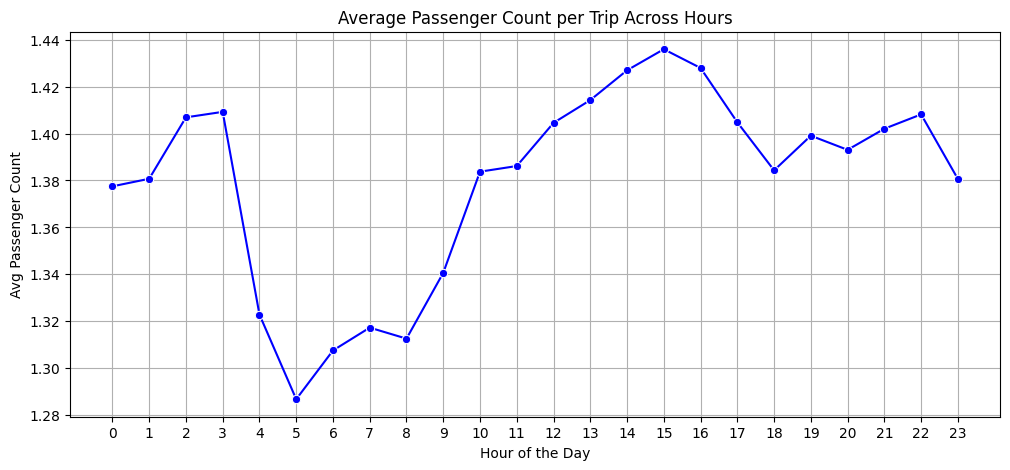

Plot saved to PDF!


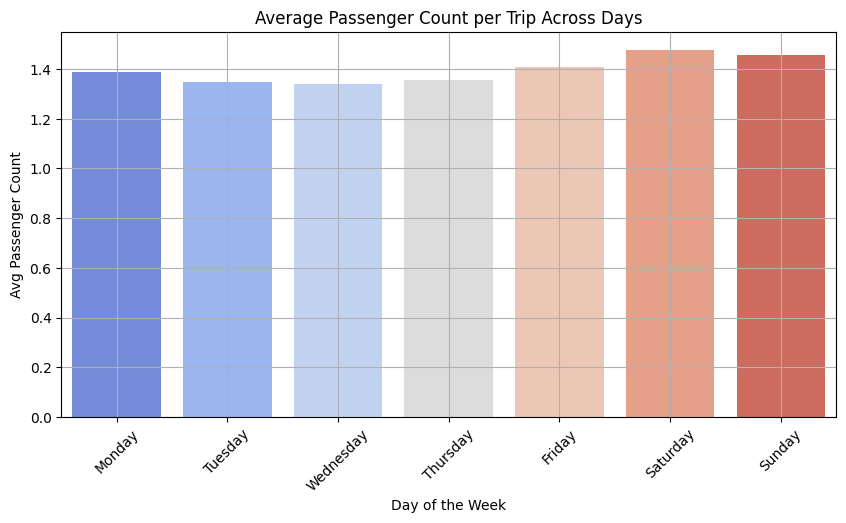

Plot saved to PDF!


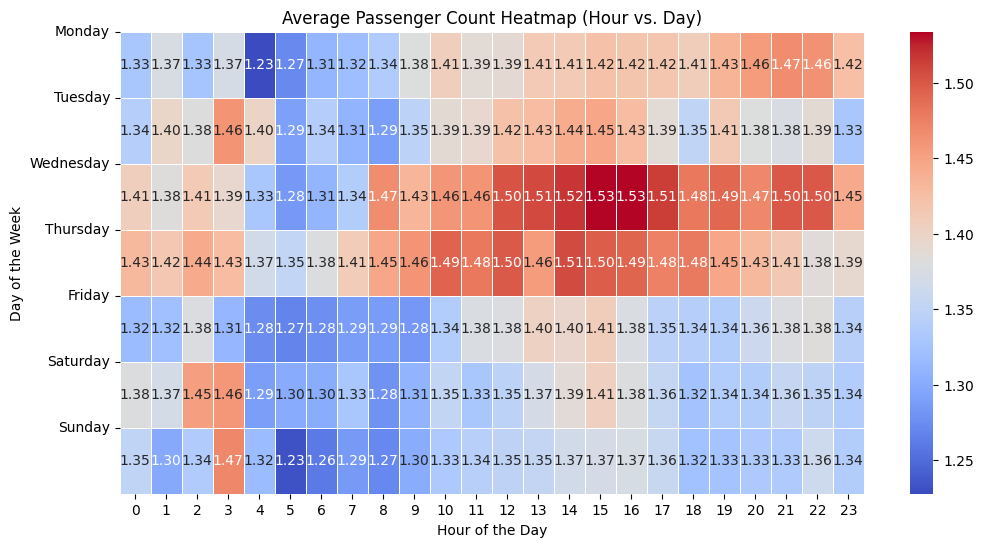

In [186]:
# See how passenger count varies across hours and days

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_passenger_trends(df):
    # Ensure datetime format
    if not pd.api.types.is_datetime64_any_dtype(df["tpep_pickup_datetime"]):
        df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

    # Extract hour and day
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
    df["pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()

    # Order days correctly
    day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    # ---- Visualizations ----

    # 1️ Passenger Count by Hour
    hourly_avg = df.groupby("pickup_hour")["passenger_count"].mean()
    
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker="o", color="blue")
    plt.title("Average Passenger Count per Trip Across Hours")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Avg Passenger Count")
    plt.xticks(range(0, 24))
    plt.grid(True)

    save_plot_to_pdf()
    plt.show()

    # 2️ Passenger Count by Day
    daily_avg = df.groupby("pickup_day")["passenger_count"].mean().reindex(day_order)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=daily_avg.index, y=daily_avg.values, palette="coolwarm")
    plt.title("Average Passenger Count per Trip Across Days")
    plt.xlabel("Day of the Week")
    plt.ylabel("Avg Passenger Count")
    plt.xticks(rotation=45)
    plt.grid(True)

    save_plot_to_pdf()
    plt.show()

    # 3️ Heatmap: Passenger Count by Hour & Day
    heatmap_data = df.groupby(["pickup_day", "pickup_hour"])["passenger_count"].mean().unstack()
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Average Passenger Count Heatmap (Hour vs. Day)")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Day of the Week")
    plt.yticks(ticks=range(7), labels=day_order, rotation=0)

    save_plot_to_pdf()
    plt.show()

# Run analysis on df_merged
analyze_passenger_trends(df_merged)



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Plot saved to PDF!


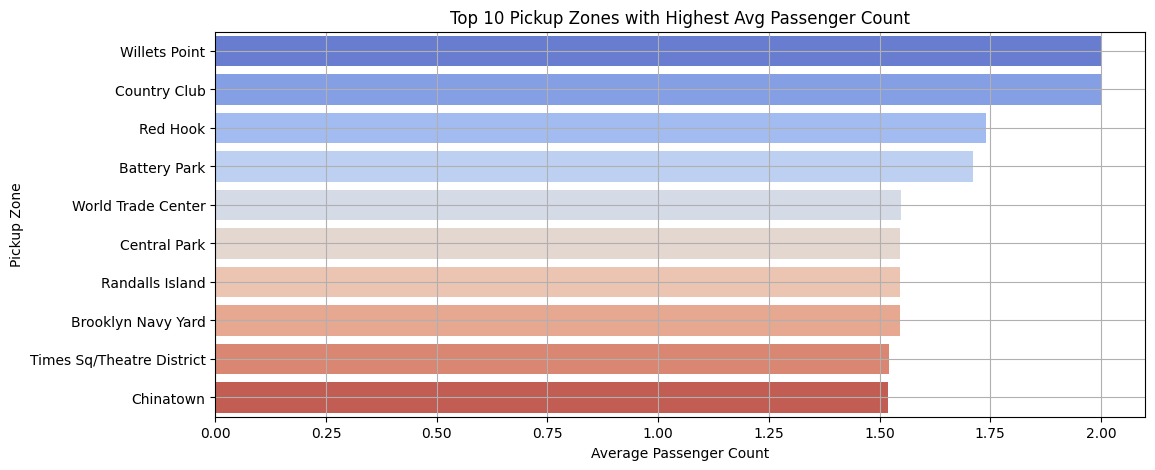

Plot saved to PDF!


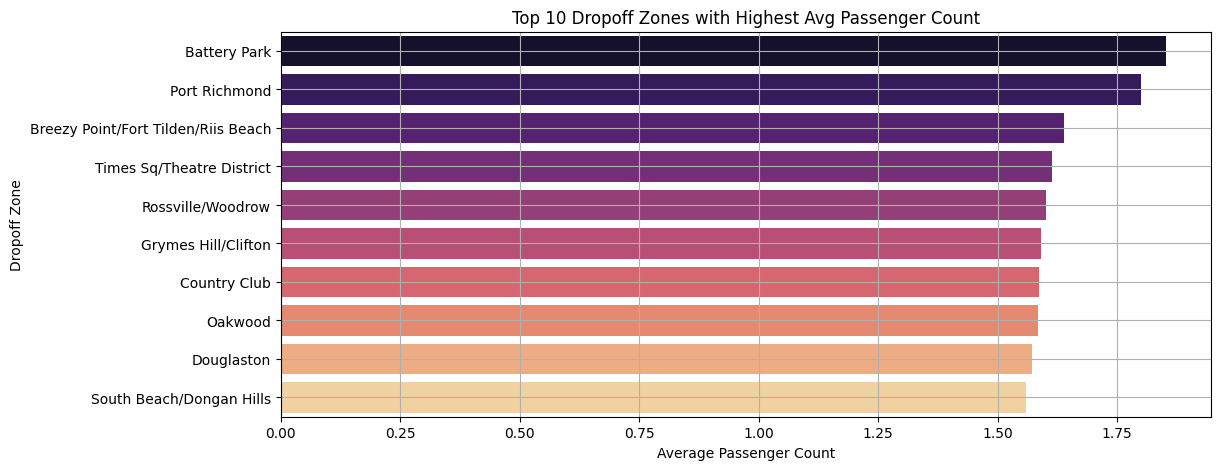

Plot saved to PDF!


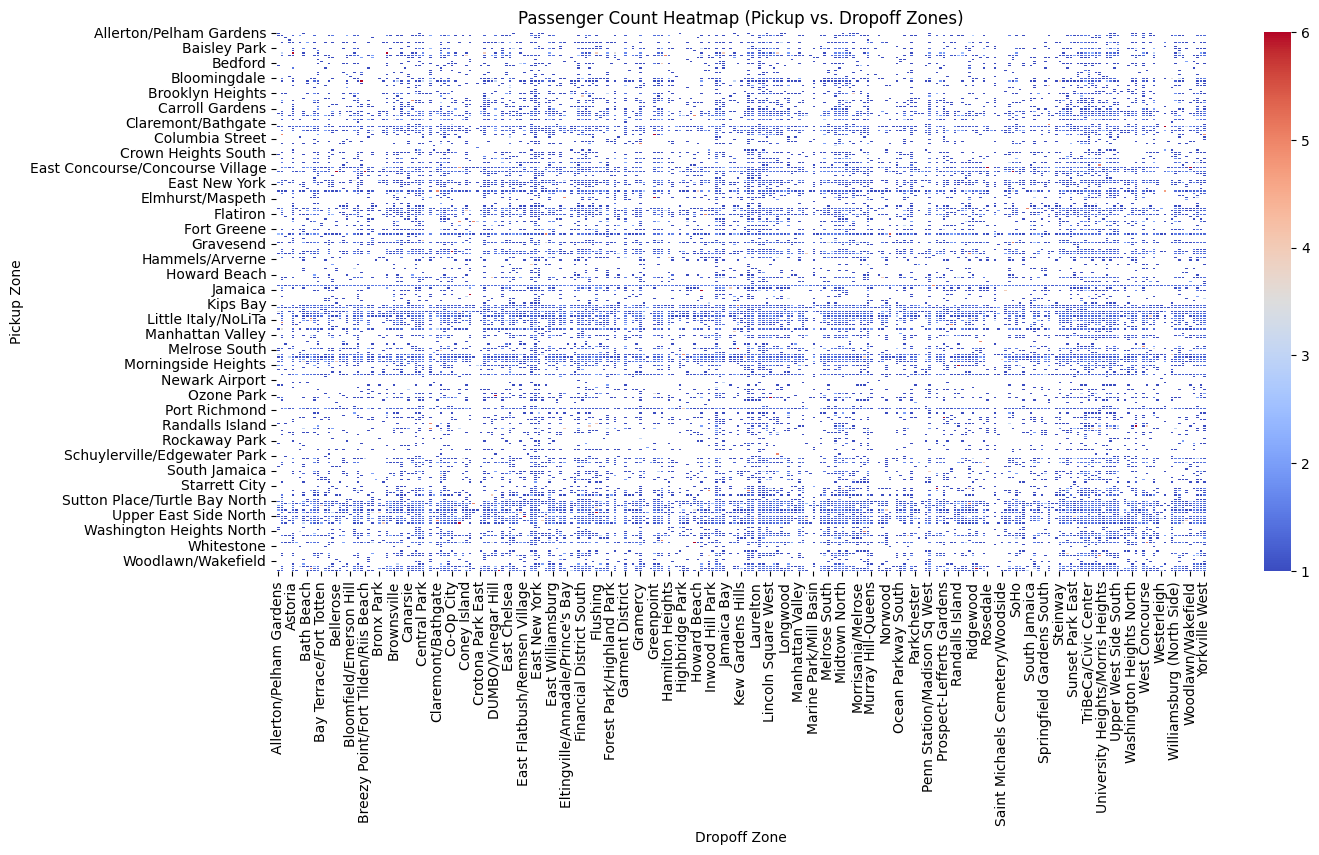

In [187]:
# How does passenger count vary across zones

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_passenger_variation_by_zone(df):
    # Group by pickup zone to find average passenger count
    pickup_avg = df.groupby("pickup_zone")["passenger_count"].mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 5))
    sns.barplot(x=pickup_avg.values, y=pickup_avg.index, palette="coolwarm")
    plt.title("Top 10 Pickup Zones with Highest Avg Passenger Count")
    plt.xlabel("Average Passenger Count")
    plt.ylabel("Pickup Zone")
    plt.grid(True)

    save_plot_to_pdf()
    plt.show()

    # Group by dropoff zone to find average passenger count
    dropoff_avg = df.groupby("dropoff_zone")["passenger_count"].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 5))
    sns.barplot(x=dropoff_avg.values, y=dropoff_avg.index, palette="magma")
    plt.title("Top 10 Dropoff Zones with Highest Avg Passenger Count")
    plt.xlabel("Average Passenger Count")
    plt.ylabel("Dropoff Zone")
    plt.grid(True)

    save_plot_to_pdf()
    plt.show()

    # Heatmap of passenger count variation across pickup and dropoff zones
    zone_heatmap = df.groupby(["pickup_zone", "dropoff_zone"])["passenger_count"].mean().unstack()

    plt.figure(figsize=(15, 7))
    sns.heatmap(zone_heatmap, cmap="coolwarm", annot=False, linewidths=0.5)
    plt.title("Passenger Count Heatmap (Pickup vs. Dropoff Zones)")
    plt.xlabel("Dropoff Zone")
    plt.ylabel("Pickup Zone")

    save_plot_to_pdf()
    plt.show()

# Run analysis on df_merged
analyze_passenger_variation_by_zone(df_merged)


In [188]:
#df_merged.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'date', 'hour', 'airport_fee',
       'trip_duration', 'pickup_day', 'pickup_month', 'pickup_year',
       'pickup_dayofweek', 'month', 'quarter', 'OBJECTID_x', 'Shape_Leng_x',
       'Shape_Area_x', 'pickup_zone', 'borough_x', 'geometry_x', 'OBJECTID_y',
       'Shape_Leng_y', 'Shape_Area_y', 'dropoff_zone', 'borough_y',
       'geometry_y', 'pickup_hour'],
      dtype='object')

Create a new column for the average passenger count in each zone.

In [189]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

import pandas as pd
import geopandas as gpd

def calculate_avg_passenger_count(zones_gdf, trips_df):
    # Compute average passenger count per pickup zone
    avg_passenger_per_zone = trips_df.groupby("pickup_zone")["passenger_count"].mean().reset_index()
    avg_passenger_per_zone.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

    # Merge with GeoDataFrame using "zone"
    zones_gdf = zones_gdf.merge(avg_passenger_per_zone, how="left", left_on="zone", right_on="pickup_zone")

    # Fill NaN values with 0 (for zones without trip data)
    zones_gdf["avg_passenger_count"].fillna(0, inplace=True)

    return zones_gdf

# Apply function on your existing zones GeoDataFrame
zones = calculate_avg_passenger_count(zones, df_merged)

# Display updated dataframe
print(zones.head())




   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

               pickup_zone  avg_passenger_count  
0           Newark Airport             1.000000  
1              J

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

#### Let us see how often is each surcharge applied?

          Surcharge Type   Count  Percentage
0                  extra  254758   41.470661
1                mta_tax       0    0.000000
2  improvement_surcharge       0    0.000000
3   congestion_surcharge  538566   87.670212
4            airport_fee  126610   20.610149
Plot saved to PDF!


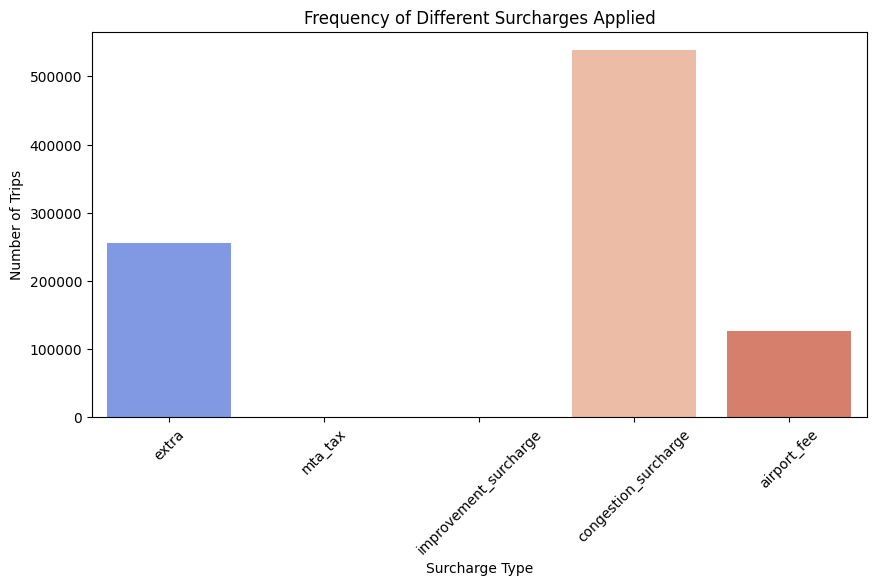

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_surcharge_frequency(df):
    # Select surcharge-related columns
    surcharge_columns = ["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "airport_fee"]
    
    # Count the number of times each surcharge is applied (i.e., nonzero values)
    surcharge_counts = {col: (df[col] > 0).sum() for col in surcharge_columns}

    # Convert to DataFrame
    surcharge_df = pd.DataFrame(list(surcharge_counts.items()), columns=["Surcharge Type", "Count"])

    # Calculate percentage
    total_trips = df.shape[0]
    surcharge_df["Percentage"] = (surcharge_df["Count"] / total_trips) * 100

    return surcharge_df

# Apply function to df_merged
surcharge_analysis = analyze_surcharge_frequency(df_merged)

# Display results
print(surcharge_analysis)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x="Surcharge Type", y="Count", data=surcharge_analysis, palette="coolwarm")
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips")
plt.title("Frequency of Different Surcharges Applied")
plt.xticks(rotation=45)

save_plot_to_pdf()
plt.show()



🔹 Analyzing: extra 

Plot saved to PDF!


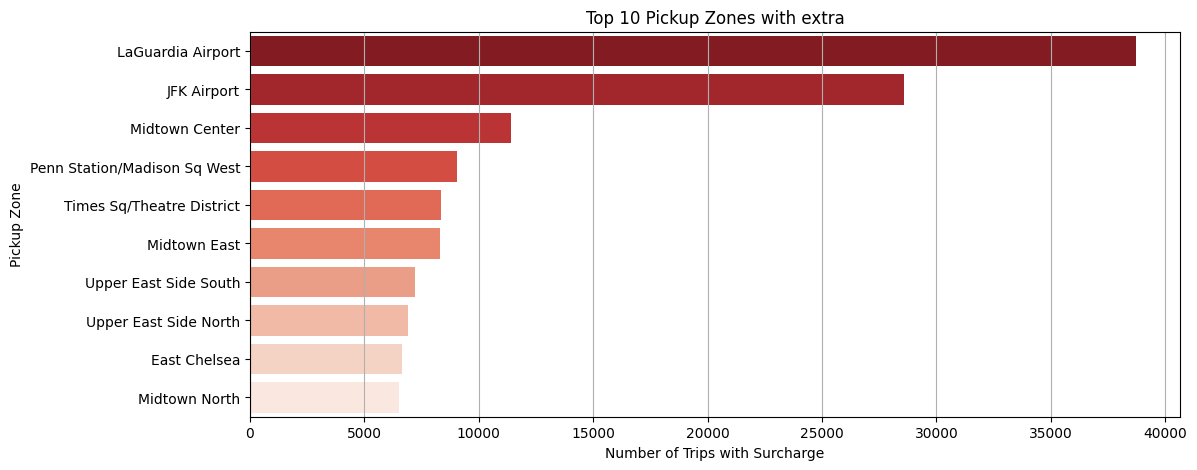

Plot saved to PDF!


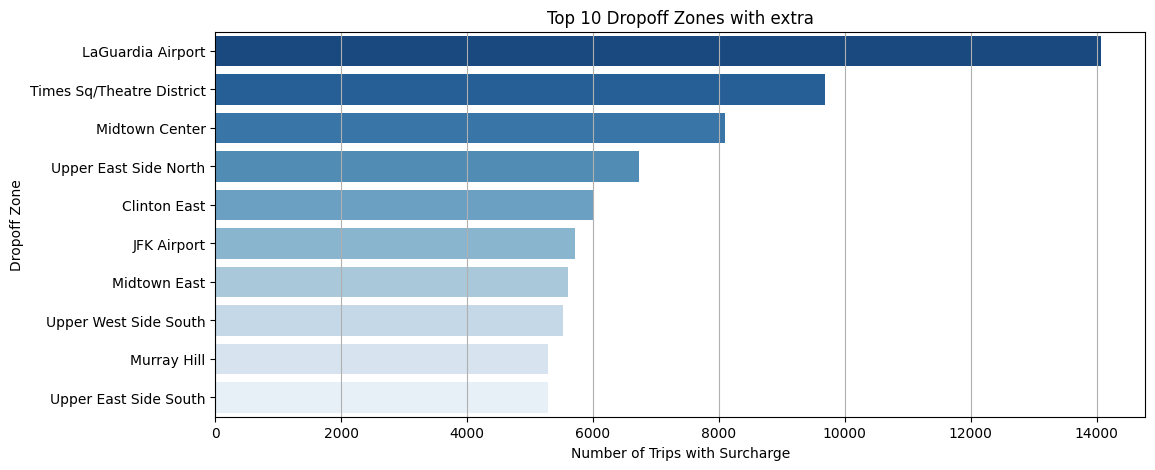

Plot saved to PDF!


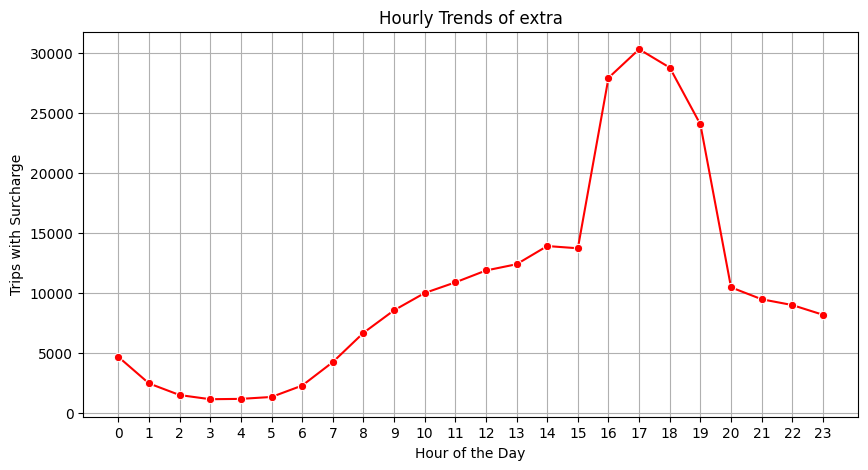

Plot saved to PDF!


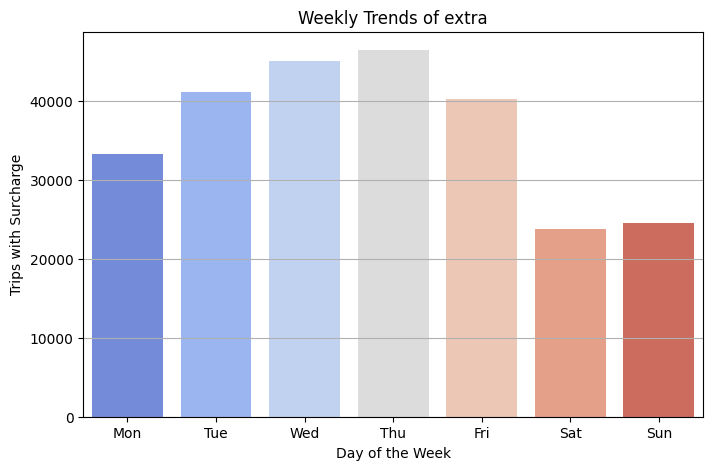

🔹 Analyzing: congestion_surcharge 

Plot saved to PDF!


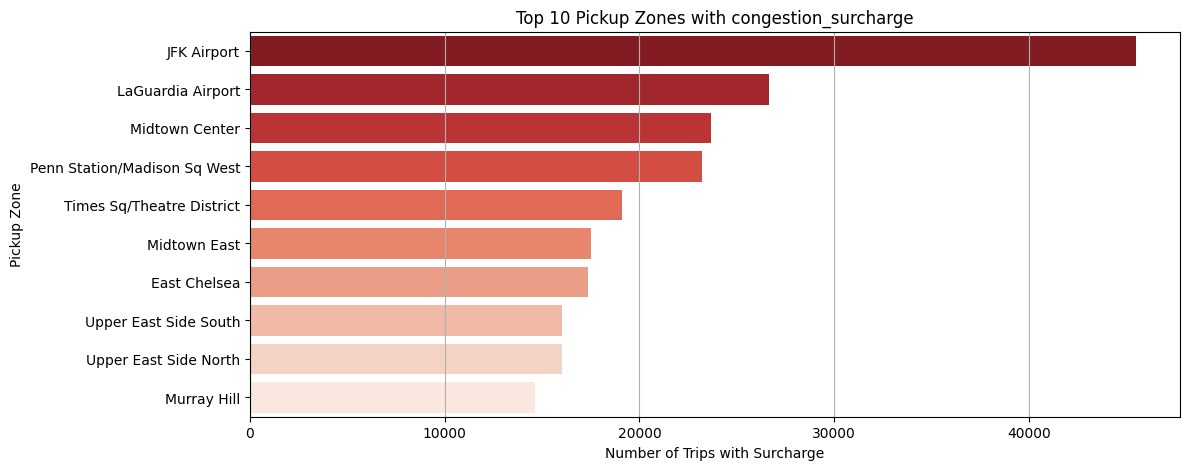

Plot saved to PDF!


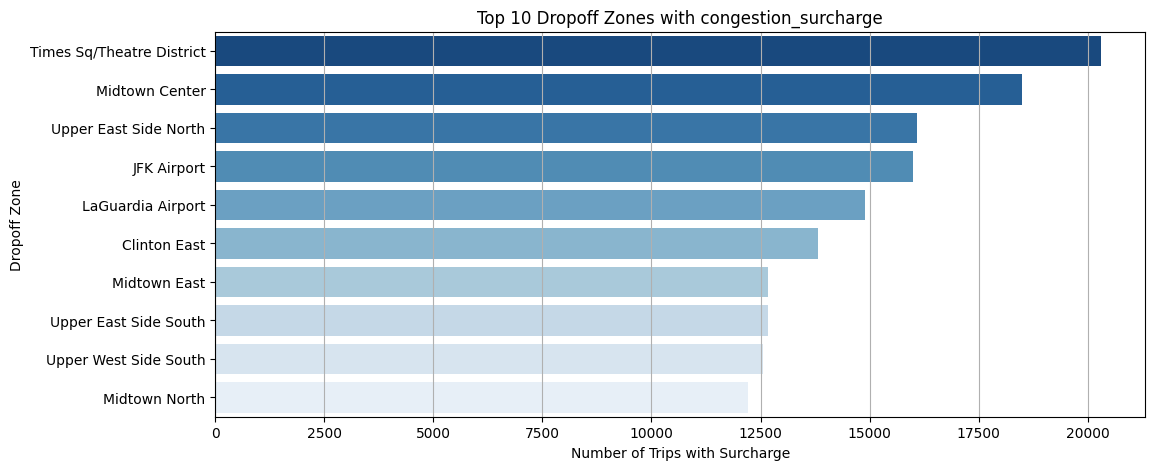

Plot saved to PDF!


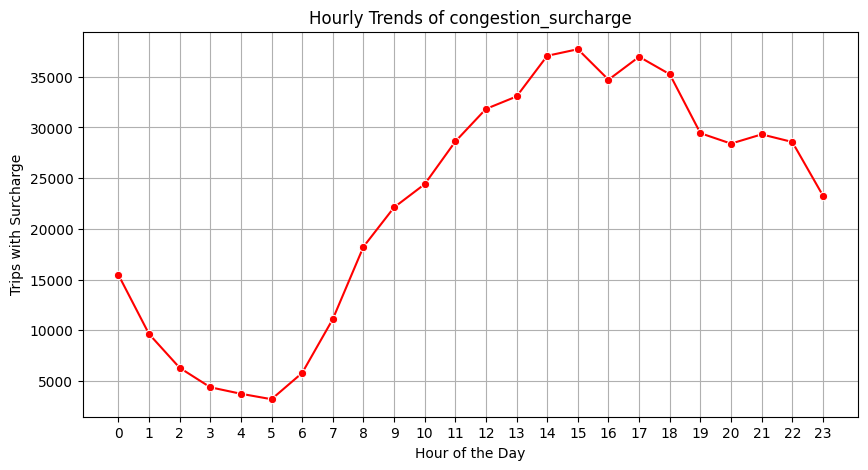

Plot saved to PDF!


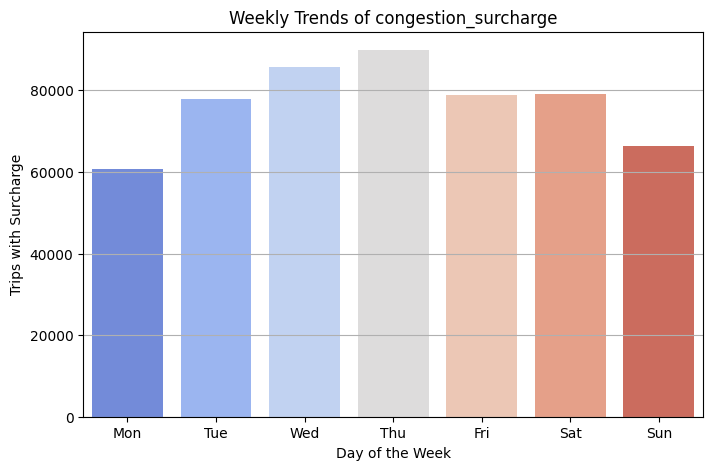

🔹 Analyzing: airport_fee 

Plot saved to PDF!


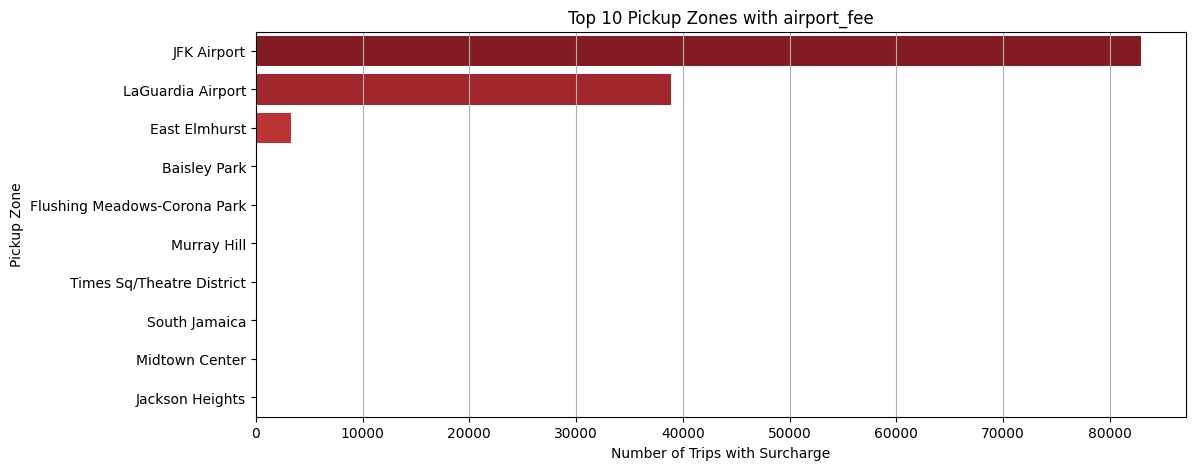

Plot saved to PDF!


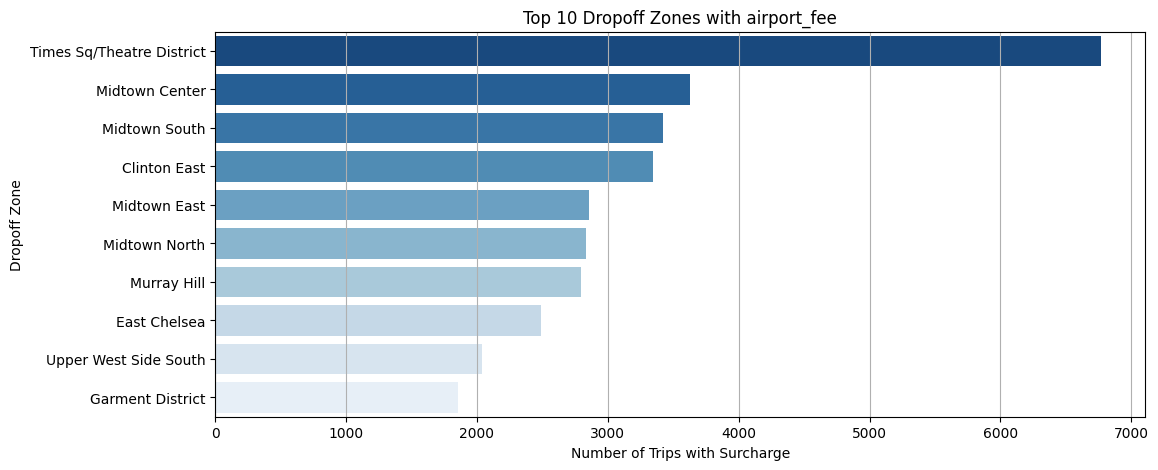

Plot saved to PDF!


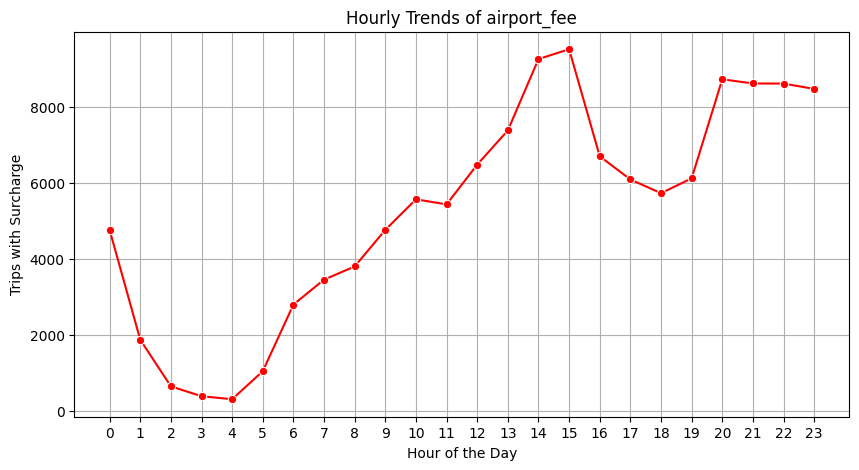

Plot saved to PDF!


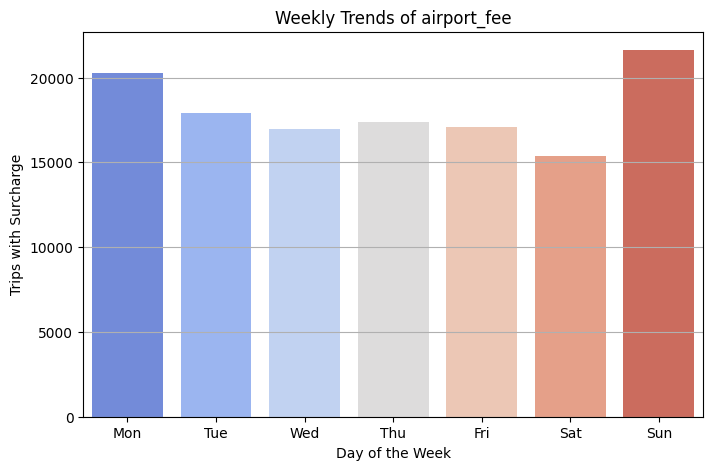

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of surcharge columns which are frequently applied
#surcharge_columns = ["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "airport_fee"]
surcharge_columns = ["extra", "congestion_surcharge", "airport_fee"]

def analyze_surcharges_individually(df, surcharge_columns):
    # Ensure datetime is in correct format
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
    df["pickup_dayofweek"] = df["tpep_pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6
    
    for surcharge in surcharge_columns:
        print(f"🔹 Analyzing: {surcharge} \n")

        # Filter trips where this specific surcharge was applied
        df_surcharge = df[df[surcharge] > 0].copy()

        ## ------------------ 1️⃣ Pickup & Dropoff Zones ------------------ ##
        pickup_counts = df_surcharge["pickup_zone"].value_counts().head(10)
        dropoff_counts = df_surcharge["dropoff_zone"].value_counts().head(10)

        plt.figure(figsize=(12, 5))
        sns.barplot(x=pickup_counts.values, y=pickup_counts.index, palette="Reds_r")
        plt.xlabel("Number of Trips with Surcharge")
        plt.ylabel("Pickup Zone")
        plt.title(f"Top 10 Pickup Zones with {surcharge}")
        plt.grid(axis="x")
        save_plot_to_pdf()
        plt.show()

        plt.figure(figsize=(12, 5))
        sns.barplot(x=dropoff_counts.values, y=dropoff_counts.index, palette="Blues_r")
        plt.xlabel("Number of Trips with Surcharge")
        plt.ylabel("Dropoff Zone")
        plt.title(f"Top 10 Dropoff Zones with {surcharge}")
        plt.grid(axis="x")
        save_plot_to_pdf()
        plt.show()

        ## ------------------ 2️⃣ Hourly Trends ------------------ ##
        hourly_counts = df_surcharge["pickup_hour"].value_counts().sort_index()

        plt.figure(figsize=(10, 5))
        sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o", color="red")
        plt.xlabel("Hour of the Day")
        plt.ylabel("Trips with Surcharge")
        plt.title(f"Hourly Trends of {surcharge}")
        plt.xticks(range(24))
        plt.grid()
        save_plot_to_pdf()
        plt.show()

        ## ------------------ 3️⃣ Day of the Week Trends ------------------ ##
        day_counts = df_surcharge["pickup_dayofweek"].value_counts().sort_index()

        plt.figure(figsize=(8, 5))
        sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y=day_counts.values, palette="coolwarm")
        plt.xlabel("Day of the Week")
        plt.ylabel("Trips with Surcharge")
        plt.title(f"Weekly Trends of {surcharge}")
        plt.grid(axis="y")
        save_plot_to_pdf()
        plt.show()

# Call function on df_merged
analyze_surcharges_individually(df_merged, surcharge_columns)


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Identify and Optimize Routes with High Demand
Insights from df_merged:
Analyze the busiest pickup/dropoff zones by hour, day, and season.
Identify peak demand locations (e.g., airports, entertainment districts, business hubs).
Optimization Strategy:
  Dynamic Routing System: Implement real-time route optimization to direct available cabs to high-demand zones.
  Pre-positioning Strategy: During peak hours, dispatch cabs ahead of demand to hot zones to reduce wait times.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def busiest_zones(df, top_n=10):
    pickup_counts = df["pickup_zone"].value_counts().head(top_n)
    dropoff_counts = df["dropoff_zone"].value_counts().head(top_n)

    print("\n📍 Top Pickup Zones:")
    print(pickup_counts)

    print("\n📍 Top Dropoff Zones:")
    print(dropoff_counts)

    # Visualizing the busiest zones
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.barplot(x=pickup_counts.values, y=pickup_counts.index, palette="Blues_r", ax=axes[0])
    axes[0].set_title("Top Pickup Zones")

    sns.barplot(x=dropoff_counts.values, y=dropoff_counts.index, palette="Reds_r", ax=axes[1])
    axes[1].set_title("Top Dropoff Zones")

    plt.tight_layout()

    save_plot_to_pdf()
    plt.show()

# Call function
busiest_zones(df_merged)


2. Reduce Idle Time by Identifying Low-Demand Areas
Insights from df_merged:
Identify zones with low trip frequency but high supply.
Detect times when cabs wait too long for trips in specific zones.
Optimization Strategy:
  Reallocate Vehicles Dynamically: Move cabs from low-demand to high-demand areas.
  Surge Pricing Awareness: If demand is low in an area, reduce prices or offer discounts to encourage trips.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def identify_slow_routes(df):
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

    # Avoid division by zero (remove trips with 0 trip_duration)
    df_filtered = df[df["trip_duration"] > 0]

    # Group by route (Pickup & Dropoff zone) and hour
    route_speed = df_filtered.groupby(["pickup_zone", "dropoff_zone", "pickup_hour"]).agg(
        avg_distance=("trip_distance", "mean"),
        avg_duration=("trip_duration", "mean")  # Average trip duration in minutes
    ).reset_index()

    # Calculate average speed (miles per hour)
    route_speed["avg_speed_mph"] = (route_speed["avg_distance"] / (route_speed["avg_duration"] / 60))

    # Identify slowest routes (Low speed areas)
    slowest_routes = route_speed.sort_values(by="avg_speed_mph", ascending=True).head(10)

    print("\n Slowest Routes (Low Speed Areas):")
    print(slowest_routes)

    # Plot slowest routes
    plt.figure(figsize=(12, 5))
    sns.barplot(data=slowest_routes, x="pickup_zone", y="avg_speed_mph", hue="dropoff_zone", palette="coolwarm")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Pickup Zones")
    plt.ylabel("Average Speed (mph)")
    plt.title("Top 10 Slowest Routes")
    plt.legend(title="Dropoff Zones")

    save_plot_to_pdf()
    plt.show()

    return slowest_routes

# Call function
slow_routes_df = identify_slow_routes(df_merged)



3. Optimize Dispatching for Night vs. Daytime Hours
Insights from df_merged:
Night hours (11 PM - 5 AM) may have fewer but longer trips (e.g., airport rides).
Daytime hours may have shorter, frequent rides (e.g., commuters).
Optimization Strategy:
  Adjust Fleet Size Based on Hourly Trends:

Night: Allocate more cars near airports, railway stations, or nightlife hubs.
Day: Focus on business districts and commuter-heavy zones.
  Offer Nighttime Incentives: Encourage drivers to operate during low-driver hours with incentives.

In [ ]:
def analyze_hourly_demand(df):
    hourly_trips = df.groupby("hour")["trip_distance"].count()
    
    busiest_hour = hourly_trips.idxmax()
    busiest_hour_trips = hourly_trips.max()

    print(f"\n⏰ Busiest Hour: {busiest_hour} with {busiest_hour_trips} trips")

    # Visualizing trip count per hour
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=hourly_trips.index, y=hourly_trips.values, marker="o", color="blue")
    plt.axvline(busiest_hour, color="red", linestyle="--", label=f"Busiest Hour: {busiest_hour}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Trips")
    plt.title("Hourly Demand Analysis")
    plt.legend()

    save_plot_to_pdf()
    plt.show()

# Call function
analyze_hourly_demand(df_merged)


4. Improve Route Efficiency for Slow Routes
Insights from df_merged:
Calculate average speed per route and hour to find slow zones.
Identify roads with frequent congestion or delays.
Optimization Strategy:
  Navigation & Traffic Data Integration:

Use real-time traffic data to reroute cabs away from slow zones.
Implement AI-based predictive routing based on historical traffic trends.
  Special Routing for Airports & Event Centers:

Have predefined fastest routes for key destinations.
Use geofencing to monitor congestion near major hubs.

#### create a new column avg_speed_mph in df_merged

In [ ]:
import pandas as pd

# Ensure trip_duration is greater than 0 to avoid division by zero
df_filtered = df_merged[df_merged["trip_duration"] > 0].copy()

# Group by pickup_zone, dropoff_zone, and pickup_hour to calculate mean trip distance & duration
route_speed = df_filtered.groupby(["pickup_zone", "dropoff_zone", "pickup_hour"], as_index=False).agg(
    avg_distance=("trip_distance", "mean"),
    avg_duration=("trip_duration", "mean")  # Average trip duration in minutes
)

# Calculate average speed (miles per hour)
route_speed["avg_speed_mph"] = route_speed["avg_distance"] / (route_speed["avg_duration"] / 60)

# Merge back with df_merged to add avg_speed_mph
df_merged = df_merged.merge(route_speed[["pickup_zone", "dropoff_zone", "pickup_hour", "avg_speed_mph"]], 
                            on=["pickup_zone", "dropoff_zone", "pickup_hour"], how="left")

# Check if avg_speed_mph is added
print(df_merged[["pickup_zone", "dropoff_zone", "pickup_hour", "avg_speed_mph"]].head())

# Verify if any rows have missing avg_speed_mph
missing_speed = df_merged["avg_speed_mph"].isna().sum()
print(f"Missing avg_speed_mph values: {missing_speed}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_slow_routes(df, top_n=10):

    # Ensure trip_duration > 0 to avoid division errors
    df_filtered = df[df["trip_duration"] > 0].copy()

    # Group by route (Pickup Zone → Dropoff Zone) and Hour
    route_analysis = df_filtered.groupby(["pickup_zone", "dropoff_zone", "pickup_hour"]).agg(
        avg_speed_mph=("avg_speed_mph", "mean"),  # Using correct speed column
        avg_duration=("trip_duration", "mean")   # Average trip duration in minutes
    ).reset_index()

    # **Find Slowest Routes by Avg Speed (excluding NaN values)**
    slowest_routes = route_analysis.dropna(subset=["avg_speed_mph"]).sort_values(
        by="avg_speed_mph", ascending=True).head(top_n)

    # **Find Routes with Frequent Congestion (Longest Duration)**
    congested_routes = route_analysis.sort_values(by="avg_duration", ascending=False).head(top_n)

    # **Plot 1: Slowest Routes (Lowest Avg Speed)**
    plt.figure(figsize=(12, 6))
    sns.barplot(data=slowest_routes, y="pickup_zone", x="avg_speed_mph", hue="dropoff_zone", palette="Reds_r")
    plt.ylabel("Pickup Zones")
    plt.xlabel("Average Speed (mph)")
    plt.title(f"Top {top_n} Slowest Routes (Low Speed)")
    plt.legend(title="Dropoff Zones", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

    # **Plot 2: Routes with Frequent Congestion (Longest Trip Duration)**
    plt.figure(figsize=(12, 6))
    sns.barplot(data=congested_routes, y="pickup_zone", x="avg_duration", hue="dropoff_zone", palette="Blues_r")
    plt.ylabel("Pickup Zones")
    plt.xlabel("Average Trip Duration (minutes)")
    plt.title(f"Top {top_n} Congested Routes (Long Travel Time)")
    plt.legend(title="Dropoff Zones", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

    return slowest_routes, congested_routes

# **Run the function with updated df_merged**
slow_routes, congestion_hotspots = analyze_slow_routes(df_merged, top_n=15)


5. Increase Revenue Per Trip by Optimizing Fare & Tip Collection
Insights from df_merged:
Long-distance trips → Lower fare per mile.
Short trips → Higher fare per mile, but more frequent.
Tips depend on passenger count, trip distance, and pickup time.
Optimization Strategy:
  Dynamic Pricing Based on Demand:

Lower fares in high-competition areas.
Increase fares for peak hours and low-supply areas.
  Encourage Shared Rides in High-Traffic Routes:

Promote carpooling where demand is high but supply is limited.
Reduce empty return trips by allowing drivers to pick up passengers on return routes.

In [ ]:
def fare_per_mile_analysis(df):
    df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]
    df = df[df["trip_distance"] > 0]  # Avoid divide by zero
    
    fare_analysis = df.groupby("vendorid")["fare_per_mile"].mean()

    print("\n Average Fare Per Mile by Vendor:")
    print(fare_analysis)

    # Visualizing fare comparison
    plt.figure(figsize=(8, 5))
    sns.barplot(x=fare_analysis.index, y=fare_analysis.values, palette="coolwarm")
    plt.xlabel("Vendor ID")
    plt.ylabel("Average Fare Per Mile (USD)")
    plt.title("Fare Per Mile Comparison by Vendor")

    save_plot_to_pdf()
    plt.show()

# Call function
fare_per_mile_analysis(df_merged)


6. Balance Supply and Demand to Reduce Empty Trips
Insights from df_merged:
Identify times and areas where drop-offs happen, but pickups are low → leads to empty trips.
Zones with many outgoing trips but fewer incoming trips cause revenue loss.
Optimization Strategy:
  Backhaul Optimization: Encourage drivers to pick up passengers from low-demand return zones.
  Predictive Demand Balancing: Use machine learning to predict demand spikes and adjust vehicle allocation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_trip_imbalances(df, top_n):

    # Count pickups and drop-offs per zone
    zone_trip_counts = df.groupby("pickup_zone").size().reset_index(name="num_pickups")
    zone_dropoff_counts = df.groupby("dropoff_zone").size().reset_index(name="num_dropoffs")

    # Merge both counts to compare
    zone_analysis = zone_trip_counts.merge(zone_dropoff_counts, 
                                           left_on="pickup_zone", 
                                           right_on="dropoff_zone", 
                                           how="outer").fillna(0)

    # Rename columns for clarity
    zone_analysis.rename(columns={"pickup_zone": "zone"}, inplace=True)
    zone_analysis.drop(columns=["dropoff_zone"], inplace=True)  # Remove duplicate column

    # Calculate imbalances
    zone_analysis["dropoff_excess"] = zone_analysis["num_dropoffs"] - zone_analysis["num_pickups"]
    zone_analysis["outgoing_excess"] = zone_analysis["num_pickups"] - zone_analysis["num_dropoffs"]

    # 1️ **Zones with high drop-off excess → Empty return trips**
    empty_trip_zones = zone_analysis.sort_values(by="dropoff_excess", ascending=False).head(top_n)

    # 2️ **Zones with high outgoing excess → Revenue loss areas**
    revenue_loss_zones = zone_analysis.sort_values(by="outgoing_excess", ascending=False).head(top_n)

    #  **Plot 1: Zones where drop-offs > pickups (empty return trips)**
    plt.figure(figsize=(12, 6))
    sns.barplot(data=empty_trip_zones, x="dropoff_excess", y="zone", palette="Reds_r")
    plt.xlabel("Excess Drop-offs (Indicating Empty Return Trips)")
    plt.ylabel("Zone")
    plt.title(f" Top {top_n} Zones with Empty Return Trips")

    save_plot_to_pdf()
    plt.show()

    #  **Plot 2: Zones where pickups > drop-offs (outgoing > incoming)**
    plt.figure(figsize=(12, 6))
    sns.barplot(data=revenue_loss_zones, x="outgoing_excess", y="zone", palette="Blues_r")
    plt.xlabel("Excess Pickups (Indicating Revenue Loss)")
    plt.ylabel("Zone")
    plt.title(f" Top {top_n} Revenue Loss Zones (More Pickups than Drop-offs)")

    save_plot_to_pdf()
    plt.show()

    return empty_trip_zones, revenue_loss_zones

# Call function with df_merged and get results
empty_trips, revenue_loss = analyze_trip_imbalances(df_merged, top_n=15)


Compare nigh vs Day time Revenue share

In [ ]:
def revenue_share_by_time(df):
    df["time_category"] = df["hour"].apply(lambda x: "Night" if 23 <= x or x < 5 else "Day")
    
    revenue_by_time = df.groupby("time_category")["total_amount"].sum()
    
    print("\n Revenue Share (Day vs Night):")
    print(revenue_by_time)

    # Visualizing revenue share
    plt.figure(figsize=(6, 6))
    revenue_by_time.plot(kind="pie", autopct="%1.1f%%", colors=["orange", "blue"], startangle=90)
    plt.title("Revenue Share: Night vs Day")
    plt.ylabel("")

    save_plot_to_pdf()
    plt.show()

# Call function
revenue_share_by_time(df_merged)


#### Find Routes with High Congestion

In [ ]:
def congestion_analysis(df):
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
    
    # Calculate speed (Avoid division by zero)
    df["speed_mph"] = df["trip_distance"] / (df["trip_duration"] / 60)
    congestion_zones = df[df["speed_mph"] < 10].groupby(["pickup_zone", "dropoff_zone", "pickup_hour"]).size().reset_index(name="congestion_count")

    # Find peak congestion hours
    peak_congestion = congestion_zones.sort_values(by="congestion_count", ascending=False).head(20)

    print("\n Most Congested Routes:")
    print(peak_congestion)

    # Plot congestion trends
    plt.figure(figsize=(12, 5))
    sns.barplot(data=peak_congestion, x="pickup_zone", y="congestion_count", hue="dropoff_zone", palette="Reds")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Pickup Zones")
    plt.ylabel("Number of Congested Trips")
    plt.title("Top 20 Most Congested Routes")
    plt.legend(title="Dropoff Zones")

    save_plot_to_pdf()
    plt.show()

    return peak_congestion

# Call function
congestion_zones_df = congestion_analysis(df_merged)


#### Optimize Dispatching & Routing

In [ ]:
def optimize_routes(df):
    slow_routes = identify_slow_routes(df)
    congested_routes = congestion_analysis(df)

    # Merge slow and congested routes
    problem_routes = pd.merge(slow_routes, congested_routes, on=["pickup_zone", "dropoff_zone", "pickup_hour"], how="inner")

    print("\n Routes Needing Optimization:")
    print(problem_routes)

    # Suggest alternate routes
    problem_routes["recommendation"] = "Use alternate roads, avoid peak hours, monitor real-time traffic."

    # Plot speed vs congestion
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=problem_routes, x="avg_speed_mph", y="congestion_count", hue="pickup_zone", size="dropoff_zone", palette="viridis", sizes=(40, 200))
    plt.xlabel("Average Speed (mph)")
    plt.ylabel("Number of Congested Trips")
    plt.title("Speed vs Congestion for Problematic Routes")
    plt.legend(title="Pickup Zones")

    save_plot_to_pdf()
    plt.show()

    return problem_routes

# Call function
optimized_routes = optimize_routes(df_merged)


#### Special Routing for Airports & Event Centers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define major hubs (e.g., airports, event centers)
major_hubs = ["JFK Airport", "LGA Airport", "Times Square", "Madison Square Garden"]

def airport_event_routing(df, top_n):
    # Filter trips involving major hubs as either pickup or dropoff
    df_filtered = df[(df["pickup_zone"].isin(major_hubs)) | (df["dropoff_zone"].isin(major_hubs))]

    # Compute average trip speed and duration for each route (pickup → dropoff)
    hub_analysis = df_filtered.groupby(["pickup_zone", "dropoff_zone"]).agg(
        avg_speed=("speed_mph", "mean"),
        avg_duration=("trip_duration", "mean")
    ).reset_index()

    # Sort by highest speed and take top N fastest routes
    top_fastest_routes = hub_analysis.sort_values(by="avg_speed", ascending=False).head(top_n)

    print(f"\n Top {top_n} Fastest Routes Near Major Hubs:")
    print(top_fastest_routes)

    # ------- Visualization --------

    ##  1. Bar Plot: Avg Trip Speed per Route
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_fastest_routes, x="avg_speed", y="pickup_zone", hue="dropoff_zone", palette="coolwarm")
    plt.xlabel("Average Speed (mph)")
    plt.ylabel("Pickup Zones")
    plt.title(f" Top {top_n} Fastest Routes Near Major Hubs")
    plt.legend(title="Dropoff Zone")

    save_plot_to_pdf()
    plt.show()
    '''
    ##  2. Scatter Plot: Trip Duration vs Speed (for fastest routes)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=top_fastest_routes, x="trip_duration", y="avg_speed", hue="pickup_zone", palette="tab10", alpha=0.7)
    plt.xlabel("Trip Duration (minutes)")
    plt.ylabel("Speed (mph)")
    plt.title(f" Speed vs Trip Duration for Top {top_n} Fastest Routes")
    plt.legend(title="Pickup Zone")

    save_plot_to_pdf()
    plt.show()
    '''
    return top_fastest_routes

# Call function with df_merged, returning top 15 fastest routes
top_fast_routes = airport_event_routing(df_merged, top_n=15)


In [ ]:
#### Visualizing Slow Route Speeds

In [ ]:
def plot_slow_route_speeds(df):
    plt.figure(figsize=(12, 5))
    sns.histplot(df["avg_speed_mph"], bins=30, kde=True, color="red")
    plt.axvline(x=10, color="black", linestyle="--", label="Slow Speed Threshold (10 mph)")
    plt.xlabel("Average Speed (mph)")
    plt.ylabel("Number of Trips")
    plt.title("Distribution of Speeds in Different Zones")
    plt.legend()

    save_plot_to_pdf()
    plt.show()

# Call function
plot_slow_route_speeds(slow_routes_df)


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

By analyzing trip data across time, days, and months, we can strategically position cabs to maximize revenue and minimize empty trips.

1 Busiest Zones & Peak Demand → Deploy more cabs where demand is high.
2️ Imbalanced Zones (High Drop-offs, Low Pickups) → Prevent empty trips by repositioning cabs.
3️ Time-Based Demand Shifts → Allocate cabs dynamically for weekday vs. weekend, daytime vs. night.
4️ Event Hotspots (Airports, Stadiums, Business Hubs) → Ensure cabs are pre-positioned before peak demand.

#### 1. Heatmap: Busiest Pickup Zones Over Time

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pickup_heatmap(df):
    # Aggregate trip count per zone and hour
    pickup_trends = df.groupby(["pickup_zone", "pickup_hour"]).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))
    sns.heatmap(pickup_trends, cmap="Reds", linewidths=0.5)
    plt.xlabel("Hour of Day")
    plt.ylabel("Pickup Zones")
    plt.title(" Heatmap of Busiest Pickup Zones by Hour")

    save_plot_to_pdf()
    plt.show()

# Call function
plot_pickup_heatmap(df_merged)


#### 2.Bar Chart: Zones with Many Drop-offs But Few Pickups

In [ ]:
def plot_imbalanced_zones(df, top_n=15):
    # Count trips in each zone for pickups and dropoffs
    pickup_counts = df["pickup_zone"].value_counts()
    dropoff_counts = df["dropoff_zone"].value_counts()
    
    # Compute imbalance (dropoffs - pickups)
    imbalance_df = pd.DataFrame({
        "zone": dropoff_counts.index,
        "dropoff_count": dropoff_counts.values,
        "pickup_count": pickup_counts.reindex(dropoff_counts.index, fill_value=0).values
    })
    imbalance_df["imbalance"] = imbalance_df["dropoff_count"] - imbalance_df["pickup_count"]
    
    # Select top imbalanced zones
    top_imbalanced = imbalance_df.nlargest(top_n, "imbalance")

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_imbalanced, x="imbalance", y="zone", palette="Blues_r")
    plt.xlabel("Dropoff - Pickup Count Difference")
    plt.ylabel("Zones")
    plt.title(f" Zones with High Drop-offs but Low Pickups (Top {top_n})")

    save_plot_to_pdf()
    plt.show()

# Call function
plot_imbalanced_zones(df_merged)


#### 3.Weekend vs. Weekday Demand Distribution

In [ ]:
def compare_weekday_weekend(df):
    df["is_weekend"] = df["pickup_dayofweek"].isin([5, 6])  # 5 = Saturday, 6 = Sunday
    
    # Count trips for weekends vs weekdays
    weekday_trips = df[~df["is_weekend"]]["pickup_hour"].value_counts().sort_index()
    weekend_trips = df[df["is_weekend"]]["pickup_hour"].value_counts().sort_index()
    
    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=weekday_trips.index, y=weekday_trips.values, label="Weekday", marker="o")
    sns.lineplot(x=weekend_trips.index, y=weekend_trips.values, label="Weekend", marker="o")
    
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Trips")
    plt.title(" Weekday vs. Weekend Hourly Traffic Patterns")
    plt.legend()
    plt.grid()

    save_plot_to_pdf()
    plt.show()

# Call function
compare_weekday_weekend(df_merged)


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

To optimize pricing while staying competitive, we analyze fare trends, demand patterns, and vendor competition
1 Demand-Based Surge Pricing: Adjust fares based on peak vs. off-peak hours.
2️ Distance-Based Tiered Pricing: Optimize fare per mile based on trip length.
3️ Competitive Vendor Pricing: Compare fares across vendors to adjust pricing dynamically.
4️ Time-Based Discounts: Offer discounts during low-demand hours to attract riders.

#### 1. Identify peak demand hours where higher fares can be applied

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_peak_pricing(df):
    # Group by hour to find avg fare per mile
    df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]
    fare_trends = df.groupby("hour")["fare_per_mile"].mean()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=fare_trends.index, y=fare_trends.values, marker="o", label="Fare per Mile")
    plt.axvspan(7, 9, color='red', alpha=0.2, label="Morning Peak")
    plt.axvspan(17, 20, color='orange', alpha=0.2, label="Evening Peak")

    plt.xlabel("Hour of the Day")
    plt.ylabel("Avg Fare per Mile (USD)")
    plt.title(" Dynamic Pricing Strategy: Peak vs. Off-Peak Hours")
    plt.legend()
    plt.grid()

    save_plot_to_pdf()
    plt.show()

# Call function
analyze_peak_pricing(df_merged)


#### 2. Distance-Based Tiered Pricing Strategy

        Adjust fares based on trip length:
        Short trips (<2 miles) → Slightly higher fare per mile.
        Mid-range trips (2-5 miles) → Standard fare per mile.
        Long trips (>5 miles) → Lower fare per mile to encourage longer rides.

In [ ]:
def analyze_distance_tiered_pricing(df):
    distance_bins = [0, 2, 5, float("inf")]
    distance_labels = ["Short (0-2 mi)", "Medium (2-5 mi)", "Long (>5 mi)"]
    
    df["distance_category"] = pd.cut(df["trip_distance"], bins=distance_bins, labels=distance_labels)
    
    avg_fare_per_mile = df.groupby("distance_category")["fare_per_mile"].mean()

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=avg_fare_per_mile.index, y=avg_fare_per_mile.values, palette="coolwarm")
    plt.xlabel("Trip Distance Category")
    plt.ylabel("Avg Fare per Mile (USD)")
    plt.title(" Tiered Pricing: Fare per Mile by Distance Category")

    save_plot_to_pdf()
    plt.show()

# Call function
analyze_distance_tiered_pricing(df_merged)


#### 3. Compare fare per mile for different vendors and adjust pricing to stay competitive
        Justification → Adjust pricing dynamically to match or slightly undercut competitors while maintaining profitability.

In [ ]:
def compare_vendor_pricing(df):
    avg_fare_per_vendor = df.groupby("vendorid")["fare_per_mile"].mean()

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_fare_per_vendor.index, y=avg_fare_per_vendor.values, palette="viridis")
    plt.xlabel("Vendor ID")
    plt.ylabel("Avg Fare per Mile (USD)")
    plt.title(" Vendor Pricing Strategy: Competitive Analysis")

    save_plot_to_pdf()
    plt.show()

# Call function
compare_vendor_pricing(df_merged)


#### 4. Time-Based Discounts for Off-Peak Hours
        Offer discounts between 10 PM - 5 AM to boost nighttime rides.
        Justification → Offering lower fares during nighttime fills empty rides and improves overall revenue.

In [ ]:
def analyze_off_peak_discount(df):
    df["time_category"] = df["hour"].apply(lambda x: "Off-Peak" if x < 6 or x >= 22 else "Peak")
    
    avg_fare_off_peak = df.groupby("time_category")["fare_per_mile"].mean()

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_fare_off_peak.index, y=avg_fare_off_peak.values, palette="coolwarm")
    plt.xlabel("Time of Day")
    plt.ylabel("Avg Fare per Mile (USD)")
    plt.title(" Off-Peak Pricing Strategy: Discounts for Low-Demand Hours")

    save_plot_to_pdf()
    plt.show()

# Call function
analyze_off_peak_discount(df_merged)


In [ ]:
finalize_pdf()